In [1]:
!pwd

/media/samir/data/SDC3/SDC3_testdata/Codes


In [2]:
!ls


 bins_kpar.txt		   __pycache__
 bins_kper.txt		   SKData_fits_file.ipynb
 cl-dnu.py		   TestDatasetTRUTH_166MHz-181MHz.data
 combined_allchannel.uvf   XX_cl_dnu_py.npy
'#Lofar_modules_pk.py#'    XX_PK_kpara.npy
 Lofar_modules_pk.py	   XX_PK_kper.npy
 pk.ipynb		   XX_PK_pk.npy


In [1]:
# %load read_fits_new.py
# By Dr. Akash Patwa, PhD, 007akashpatwa@gmail.com

#Construction of exported visibility file (using exportuvfits) is in AIPS standard FITS format, Random group form (look in attached pdf by AIPS, AIPSMEM117.pdf).
#Note: Indexing starts from 0 in any array or column

from astropy.table import Table
from astropy.io import fits
import numpy as np
from matplotlib.colors import LogNorm
import os
import pandas
#import datashader
# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#filename = "/lfs/usrhome/msc/ph22c040/scratch/ZW3n_IFRQ_0000_split.uvf"
filename = "/media/guest/Expansion/SDC3/sDC3_testdata_new/1st_0_150_band.uvf"

In [3]:
#wl = 1.945  # wavelength
#time_chunk = 11  # no. of integrations in each file

#If we don't want to see header and other details of FITS file, we can directly get data as :
#data = fits.getdata(filename)
#dataT = Table(data) 				#to covert in Table form

'''
dataT['UU'] = dataT['UU']*3.e8/wl	   # to convert in meters, works either in array form or Table form
dataT['VV'] = dataT['VV']*3.e8/wl      # to convert in meters, works either in array form or Table form
dataT['WW'] = dataT['WW']*3.e8/wl      # to convert in meters, works either in array form or Table form
'''

#bl = len(dataT['UU'])/time_chunk

"\ndataT['UU'] = dataT['UU']*3.e8/wl\t   # to convert in meters, works either in array form or Table form\ndataT['VV'] = dataT['VV']*3.e8/wl      # to convert in meters, works either in array form or Table form\ndataT['WW'] = dataT['WW']*3.e8/wl      # to convert in meters, works either in array form or Table form\n"

In [5]:
fits.info('1st_0_150_band.uvf')
# fits.info('ZW3_IFRQ_0145.uvf')

Filename: 1st_0_150_band.uvf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 GroupsHDU       94   (3, 1, 151, 1, 1, 1)   float32   4668308 Groups  11 Parameters
  1  AIPS FQ       1 BinTableHDU     28   1R x 5C   [1J, 1D, 1E, 1E, 1J]   
  2  AIPS AN       1 BinTableHDU     62   512R x 13C   [8A, 3D, 0D, 1J, 1J, 1E, 1A, 1E, 1E, 1A, 1E, 1E, 1E]   
  3  AIPS SU       1 BinTableHDU     69   1R x 19C   [1J, 20A, 1J, 4A, 1E, 1E, 1E, 1E, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   


In [6]:
hdulist = fits.open(filename)
print(len(hdulist))
print(hdulist)

# fits.info('combined_allchannel.uvf') 				#to check different headers
# print(hdulist[0].header) 			# Primary: to check info of primary header which has the desired data
# print(hdulist[1].header)				#AIPS FQ: contains info about frequency channels, central frequency, bandwidth etc.
print(hdulist[2].header)				#AIPS AN: contains info about antenna names, telescope name etc
# print(hdulist[3].header)
# data = hdulist[2].data 				#to save visibilities in data
# dataT = Table(data)     			#to convert data from array form to table form, readable
#hdulist.close()

#dataT[0] #to access first row of the table, e.g. output
#    UU           VV           WW          DATE       _DATE     BASELINE FREQSEL  SOURCE  INTTIM   DATA [1,1,1,48,4,3]
#  float32      float32      float32      float32     float32   float32  float32 float32 float32       float32
#------------ ------------ ------------ ----------- ----------- -------- ------- ------- ------- ------------------
#    0.0          0.0          0.0     2.45663e+06   0.000520833  257.0     1.0     1.0     10.0        0.0 .. -11.4706

#units and meaning of each column names are given in the attached pdf file, AIPSMEM117.pdf.
#print dataT['UU']  					#to print UU data (in light seconds), can be done for any other column
#dataT['UU'] = dataT['UU']*3.e8	      #to convert in meters, works either in array form or Table form

# We can do manipulations of columns either in Table form or in array form, as done above. Manipulations done directly on array or column is faster than using loops.
#Visibility data is usually stored in last column of hdulist[0].data or dataT. Visibility column is of dimansion (1x1x1x48x4x3), where
#48 corresponds to number of channels available,
#4 corresponds to different polarizations XX, YY, XY, and YX,
#3 corresponds to (of XX, YY, XY, or YX) first; real part of visibility, 2nd; imaginary part of visibility, and 3rd: corresponding weighting

#Note: Visibilities, XX, YY, XY, YX are not in polar form but in (a+ib) form.

4
[<astropy.io.fits.hdu.groups.GroupsHDU object at 0x7fc3e5f51840>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc42656ab00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc3e5f51f00>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7fc3e5f52530>]
XTENSION= 'BINTABLE'           /Binary Table Extension                          BITPIX  =                    8 /Character Information                           NAXIS   =                    2 /Two-dimensional table                           NAXIS1  =                   66 /Number of bytes per row                         NAXIS2  =                  512 /Number of rows                                  PCOUNT  =                    0 /No random parameters                            GCOUNT  =                    1 /Only one group                                  TFIELDS =                   13 /Number of columns                                                                                                                             

In [7]:
print(hdulist[2].header)

XTENSION= 'BINTABLE'           /Binary Table Extension                          BITPIX  =                    8 /Character Information                           NAXIS   =                    2 /Two-dimensional table                           NAXIS1  =                   66 /Number of bytes per row                         NAXIS2  =                  512 /Number of rows                                  PCOUNT  =                    0 /No random parameters                            GCOUNT  =                    1 /Only one group                                  TFIELDS =                   13 /Number of columns                                                                                                                                                                                               EXTNAME = 'AIPS AN '                                                            EXTVER  =                    1                                                  ARRAYX  =                    0          

In [8]:
# #data2[0][1]
data = hdulist[0].data
data1 = hdulist[1].data
data2 = hdulist[2].data
# data3 = hdulist[3].data
# data2[1][0]

In [9]:
type(data2)

astropy.io.fits.fitsrec.FITS_rec

In [10]:
cols=hdulist[2].columns
cols.info()

name:
    ['ANNAME', 'STABXYZ', 'ORBPARM', 'NOSTA', 'MNTSTA', 'STAXOF', 'POLTYA', 'POLAA', 'POLCALA', 'POLTYB', 'POLAB', 'POLCALB', 'DIAMETER']
format:
    ['8A', '3D', '0D', '1J', '1J', '1E', '1A', '1E', '1E', '1A', '1E', '1E', '1E']
unit:
    ['', 'METERS', '', '', '', 'METERS', '', 'DEGREES', '', '', 'DEGREES', '', '']
null:
    ['', '', '', '', '', '', '', '', '', '', '', '', '']
bscale:
    ['', '', '', '', '', '', '', '', '', '', '', '', '']
bzero:
    ['', '', '', '', '', '', '', '', '', '', '', '', '']
disp:
    ['', '', '', '', '', '', '', '', '', '', '', '', '']
start:
    ['', '', '', '', '', '', '', '', '', '', '', '', '']
dim:
    ['', '', '', '', '', '', '', '', '', '', '', '', '']
coord_type:
    ['', '', '', '', '', '', '', '', '', '', '', '', '']
coord_unit:
    ['', '', '', '', '', '', '', '', '', '', '', '', '']
coord_ref_point:
    ['', '', '', '', '', '', '', '', '', '', '', '', '']
coord_ref_value:
    ['', '', '', '', '', '', '', '', '', '', '', '', '']
coord_inc

In [11]:
#  print(data2)
data2.field(1)

array([[-2564976.05653377,  5085352.7292609 , -2861040.11633764],
       [-2564848.56192944,  5085557.93305701, -2860791.33394729],
       [-2564950.86422344,  5085422.02647639, -2860940.20013171],
       ...,
       [-2562844.95603037,  5104728.88399797, -2828477.05749327],
       [-2562762.13698765,  5104773.67079294, -2828471.30637765],
       [-2562805.24297569,  5104761.32233059, -2828454.64795087]])

In [12]:
coordinates=data2.field(1)
b=Table(coordinates)
# coordinates[1].Table

In [78]:
b

<Table length=512>
        col0               col1                col2       
      float64            float64             float64      
------------------- ------------------ -------------------
-2564976.0565337683  5085352.729260901 -2861040.1163376356
-2564848.5619294387  5085557.933057009  -2860791.333947291
-2564950.8642234444  5085422.026476391  -2860940.200131711
 -2564766.955762143  5085510.603671092 -2860947.5755673535
 -2564917.972830599  5085474.479504211 -2860876.8769075433
-2564909.9800671623 5085567.4364201855 -2860719.8556454186
                ...                ...                 ...
-2563297.5673336866  5099672.217663915 -2837116.9638381484
-2562772.0481426837 5104730.0869743265 -2828540.5179136507
-2562846.3289446076 5104706.7334107375  -2828515.530421281
-2562793.1429992034    5104744.5531886   -2828495.59987214
-2562844.9560303725  5104728.883997971 -2828477.0574932666
 -2562762.136987646  5104773.670792943  -2828471.306377646
-2562805.2429756946  5104761.322330586  -2828454.647950866

In [79]:
x_co=b['col0']
y_co=b['col1']
z_co=b['col2']

In [80]:
#data2[1][1]
data2[0][0]
data2[1][0]

's0001'

In [16]:
data02=[]
for i in range (0,512):
    data02.append(data2[i][1])
data02[511]
data02


data01=[]
for i in range (0,512):
    data01.append(data2[i][0])
#data01    
    

In [17]:
x_coordinates=[]
y_coordinates=[]
z_coordinates=[]
for i in range(0,512):
    x_coordinates.append(data02[i][0])
    y_coordinates.append(data02[i][1])
    z_coordinates.append(data02[i][2])



In [18]:
y_coordinates

[5085352.729260901,
 5085557.933057009,
 5085422.026476391,
 5085510.603671092,
 5085474.479504211,
 5085567.4364201855,
 5085511.084722024,
 5085448.139393866,
 5085449.332688265,
 5085578.074467958,
 5085554.231154993,
 5085457.029998419,
 5085431.105884032,
 5085419.3278060835,
 5085497.578152244,
 5085570.779016354,
 5085477.145982844,
 5085431.3764174,
 5085464.0893372,
 5085449.5918478975,
 5085404.40919866,
 5085362.443815461,
 5085383.0832925355,
 5085563.355713842,
 5085482.054426825,
 5085589.541706459,
 5085541.380414422,
 5085385.569690683,
 5085447.637642221,
 5085498.849503854,
 5085387.990967041,
 5085533.610585352,
 5085434.240174818,
 5085409.911573914,
 5085481.885602655,
 5085489.315746306,
 5085444.049451256,
 5085529.55710446,
 5085363.629453475,
 5085602.970241166,
 5085525.003653584,
 5085388.500398807,
 5085541.094317662,
 5085462.051373196,
 5085418.415485479,
 5085597.498817984,
 5085345.880634449,
 5085543.830132866,
 5085555.62182036,
 5085338.911900586,
 50

In [37]:
"""x_coordinate=[]
y_coordinate=[]
z_coordinate=[]

for i in range(0,512):
    
   x_coordinate.append(x_coordinates[i]/min(x_coordinates))


   y_coordinate.append(y_coordinates[i]/min(y_coordinates))

   z_coordinate.append(z_coordinates[i]/min(z_coordinates))  """ 
   


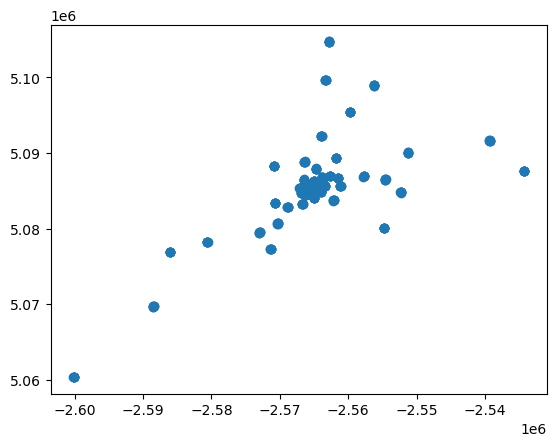

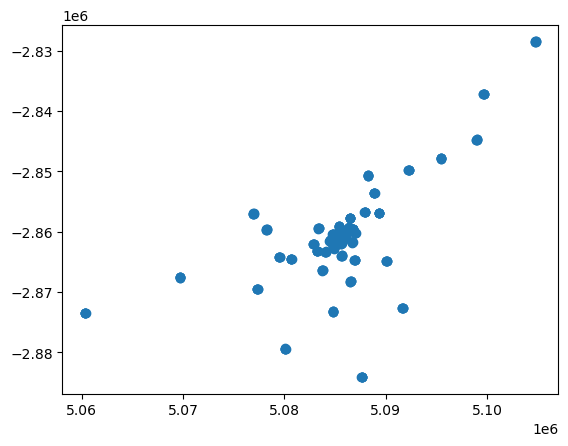

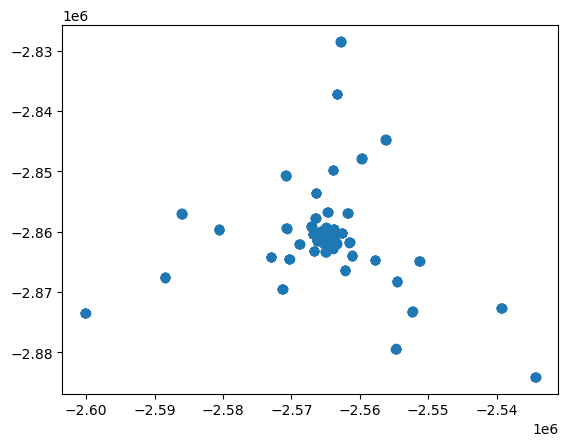

In [81]:
ran=512

plt.scatter(x_co[0:ran],y_co[0:ran])
plt.show()

plt.scatter(y_co[0:ran],z_co[0:ran])
plt.show()

plt.scatter(x_co[0:ran],z_co[0:ran])
plt.show()

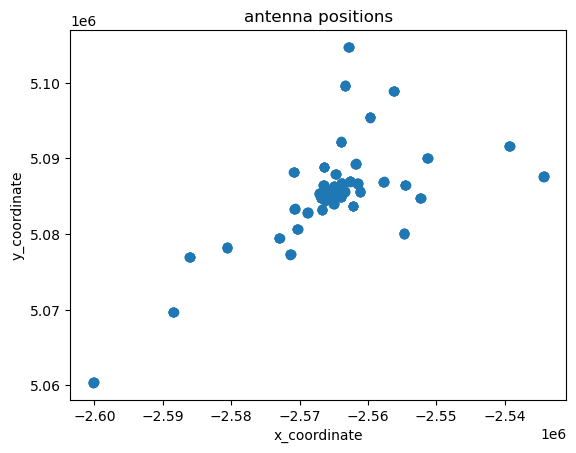

In [53]:
ran=512

plt.scatter(x_co[0:ran],y_co[0:ran])
plt.xlabel('x_coordinate')
plt.ylabel('y_coordinate')
plt.title('antenna positions')
plt.show()


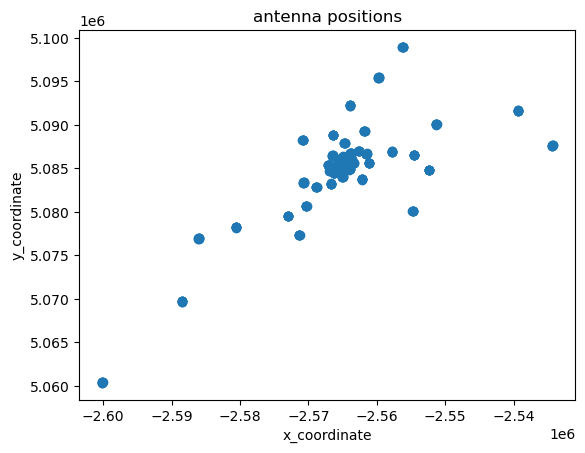

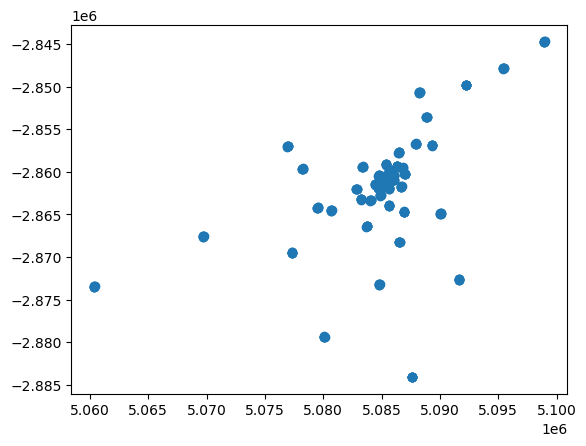

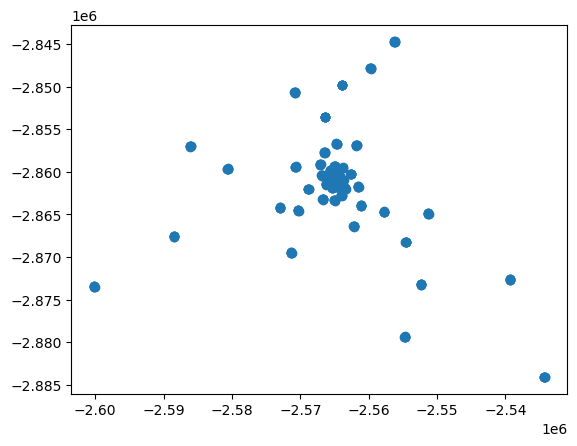

In [54]:
ran=500

plt.scatter(x_co[0:ran],y_co[0:ran])
plt.xlabel('x_coordinate')
plt.ylabel('y_coordinate')
plt.title('antenna positions')
plt.show()

plt.scatter(y_co[0:ran],z_co[0:ran])
plt.show()

plt.scatter(x_co[0:ran],z_co[0:ran])
plt.show()

Text(0.5, 1.0, 'station positions')

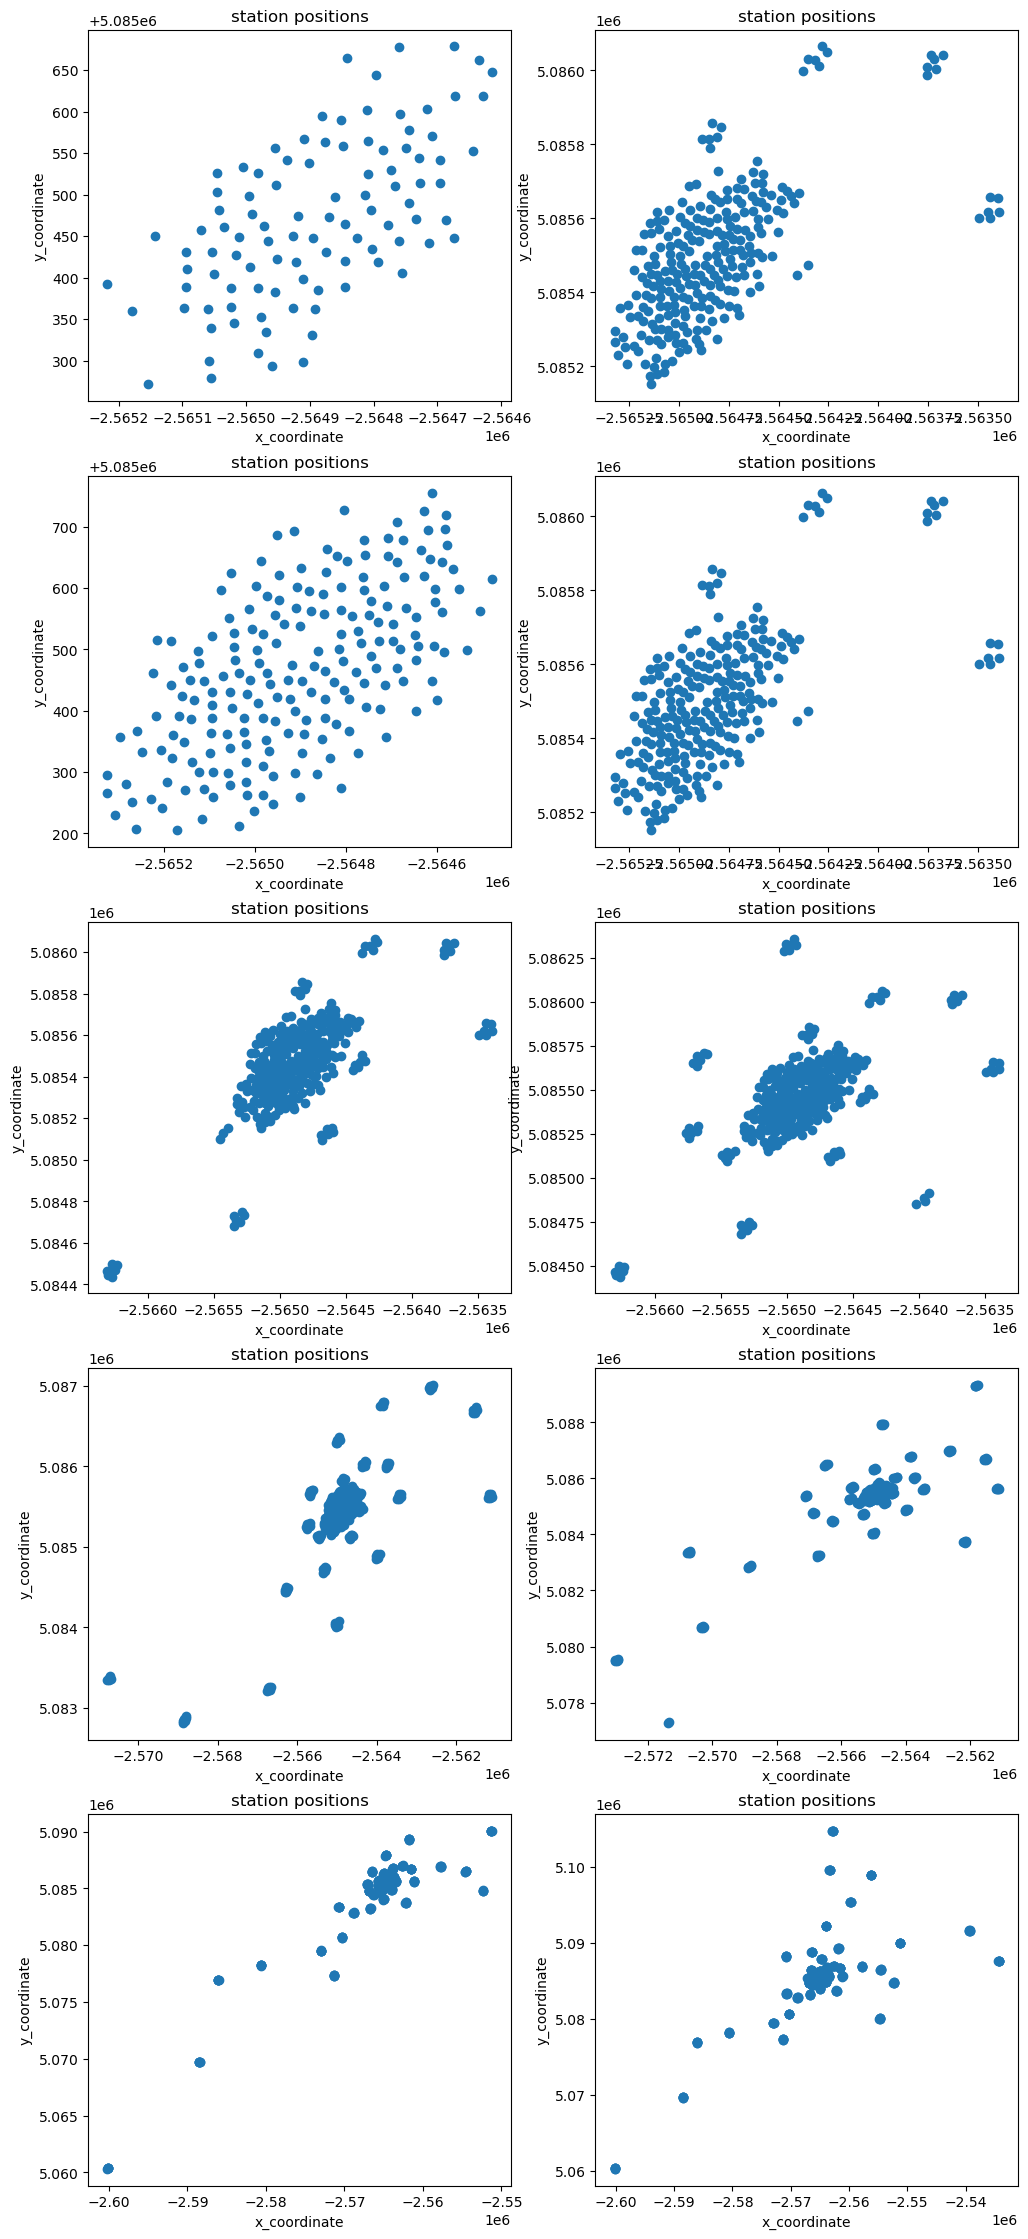

In [55]:
fig, axes = plt.subplots(5,2, figsize=(12,28))
axes[0,0].scatter(x_co[0:100],y_co[0:100])
axes[0,0].set_xlabel('x_coordinate')
axes[0,0].set_ylabel('y_coordinate')
axes[0,0].set_title('station positions')

axes[0,1].scatter(x_co[0:250],y_co[0:250])
axes[0,1].set_xlabel('x_coordinate')
axes[0,1].set_ylabel('y_coordinate')
axes[0,1].set_title('station positions')

axes[1,0].scatter(x_co[0:200],y_co[0:200])
axes[1,0].set_xlabel('x_coordinate')
axes[1,0].set_ylabel('y_coordinate')
axes[1,0].set_title('station positions')

axes[1,1].scatter(x_co[0:250],y_co[0:250])
axes[1,1].set_xlabel('x_coordinate')
axes[1,1].set_ylabel('y_coordinate')
axes[1,1].set_title('station positions')

axes[2,0].scatter(x_co[0:275],y_co[0:275])
axes[2,0].set_xlabel('x_coordinate')
axes[2,0].set_ylabel('y_coordinate')
axes[2,0].set_title('station positions')

axes[2,1].scatter(x_co[0:300],y_co[0:300])
axes[2,1].set_xlabel('x_coordinate')
axes[2,1].set_ylabel('y_coordinate')
axes[2,1].set_title('station positions')

axes[3,0].scatter(x_co[0:350],y_co[0:350])
axes[3,0].set_xlabel('x_coordinate')
axes[3,0].set_ylabel('y_coordinate')
axes[3,0].set_title('station positions')


axes[3,1].scatter(x_co[0:400],y_co[0:400])
axes[3,1].set_xlabel('x_coordinate')
axes[3,1].set_ylabel('y_coordinate')
axes[3,1].set_title('station positions')

axes[4,0].scatter(x_co[0:450],y_co[0:450])
axes[4,0].set_xlabel('x_coordinate')
axes[4,0].set_ylabel('y_coordinate')
axes[4,0].set_title('station positions')

axes[4,1].scatter(x_co[0:512],y_co[0:512])
axes[4,1].set_xlabel('x_coordinate')
axes[4,1].set_ylabel('y_coordinate')
axes[4,1].set_title('station positions')




In [ ]:

plt.scatter(x_co[0:50],y_co[0:50])
plt.xlabel('x_coordinate')
plt.ylabel('y_coordinate')
plt.title('antenna positions')

plt.scatter(x_co[0:100],y_co[0:100])
plt.xlabel('x_coordinate')
plt.ylabel('y_coordinate')
plt.title('antenna positions')

axes[1,0].scatter(x_co[0:150],y_co[0:150])
axes[1,0].set_xlabel('x_coordinate')
axes[1,0].set_ylabel('y_coordinate')
axes[1,0].set_title('antenna positions')

axes[1,1].scatter(x_co[0:200],y_co[0:200])
axes[1,1].set_xlabel('x_coordinate')
axes[1,1].set_ylabel('y_coordinate')
axes[1,1].set_title('antenna positions')

axes[2,0].scatter(x_co[0:250],y_co[0:250])
axes[2,0].set_xlabel('x_coordinate')
axes[2,0].set_ylabel('y_coordinate')
axes[2,0].set_title('antenna positions')

axes[2,1].scatter(x_co[0:300],y_co[0:300])
axes[2,1].set_xlabel('x_coordinate')
axes[2,1].set_ylabel('y_coordinate')
axes[2,1].set_title('antenna positions')

axes[3,0].scatter(x_co[0:350],y_co[0:350])
axes[3,0].set_xlabel('x_coordinate')
axes[3,0].set_ylabel('y_coordinate')
axes[3,0].set_title('antenna positions')


axes[3,1].scatter(x_co[0:400],y_co[0:400])
axes[3,1].set_xlabel('x_coordinate')
axes[3,1].set_ylabel('y_coordinate')
axes[3,1].set_title('antenna positions')

axes[4,0].scatter(x_co[0:450],y_co[0:450])
axes[4,0].set_xlabel('x_coordinate')
axes[4,0].set_ylabel('y_coordinate')
axes[4,0].set_title('antenna positions')

axes[4,1].scatter(x_co[0:512],y_co[0:512])
axes[4,1].set_xlabel('x_coordinate')
axes[4,1].set_ylabel('y_coordinate')
axes[4,1].set_title('antenna positions')




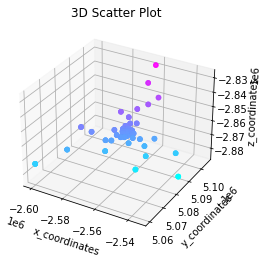

In [21]:
from mpl_toolkits import mplot3d

# Sample data
#x = UU[:100]
#y = VV[:100]
#z = WW[:100]

# Create 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot the points
ax.scatter3D(x_co, y_co, z_co, c=z_co, cmap='cool')

# Add labels and title
ax.set_xlabel('x_coordinates')
ax.set_ylabel('y_coordinates')
ax.set_zlabel('z_coordinates')
plt.title('3D Scatter Plot')

# Display the plot
plt.show()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
points=300

# Plot the points
ax.scatter3D(x_coordinates[:points], y_coordinates[:points], z_coordinates[:points], c=z_coordinates[:points], cmap='cool')

# Add labels and title
ax.set_xlabel('x_coordinates')
ax.set_ylabel('x_coordinates')
ax.set_zlabel('x_coordinates')
plt.title('3D Scatter Plot')

# Display the plot
plt.show()

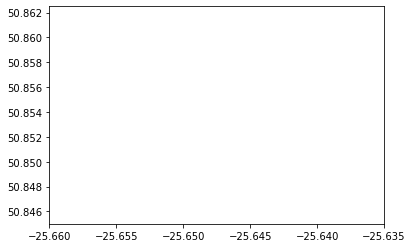

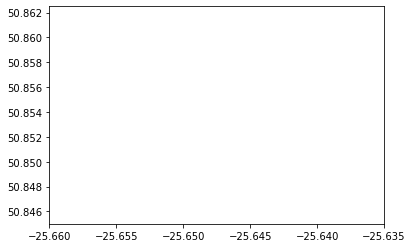

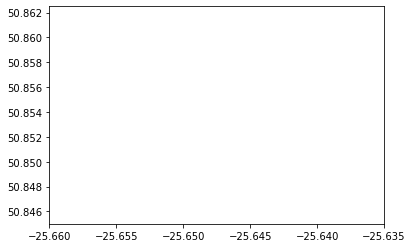

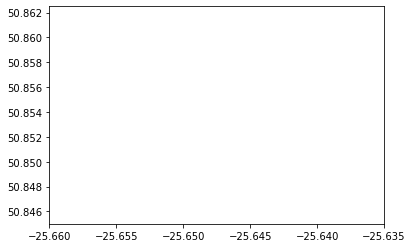

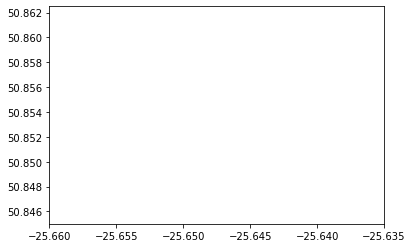

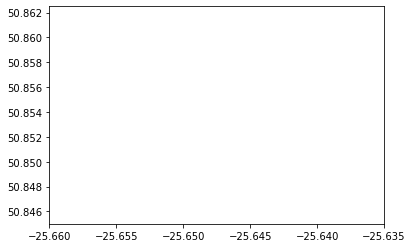

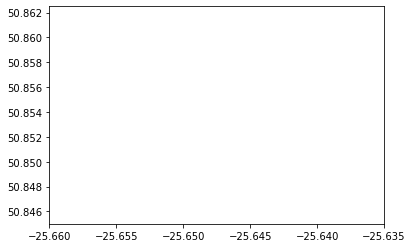

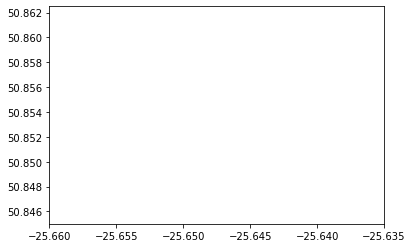

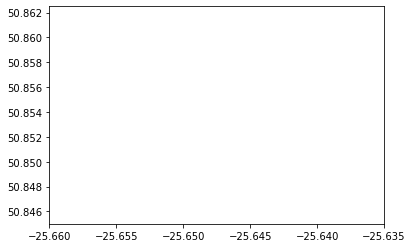

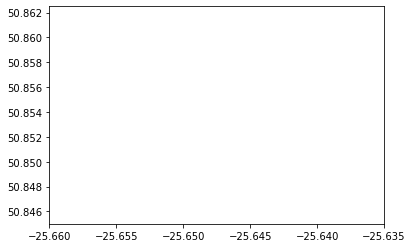

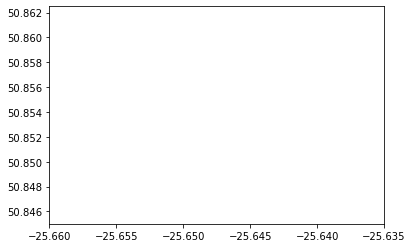

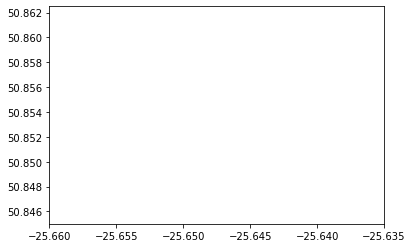

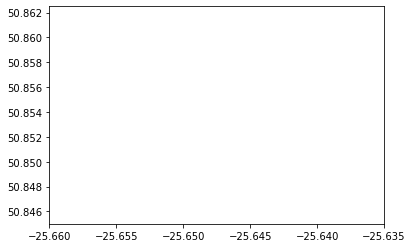

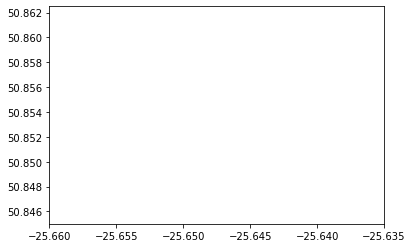

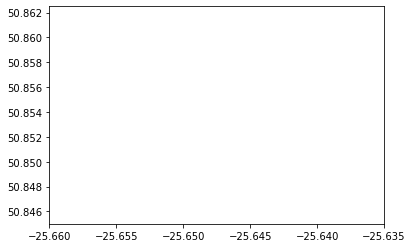

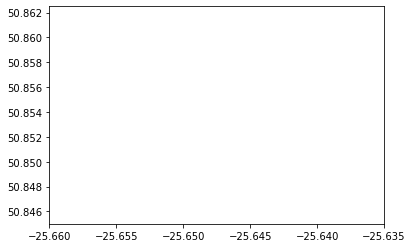

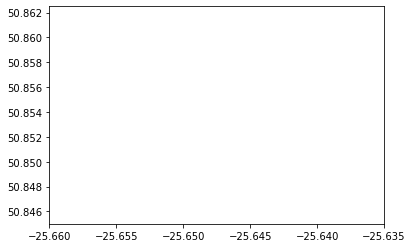

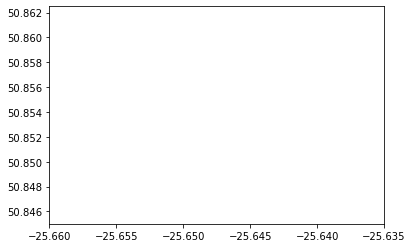

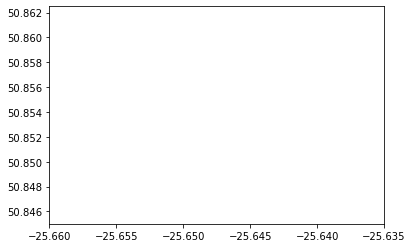

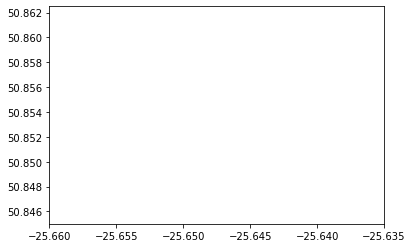

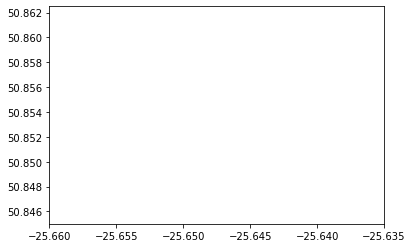

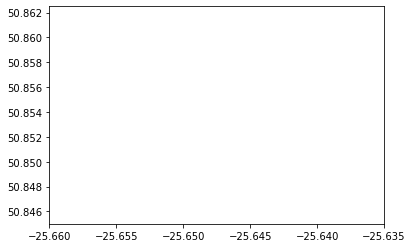

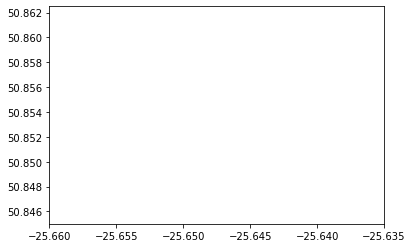

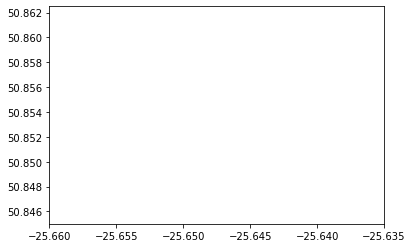

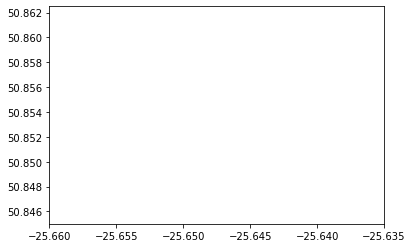

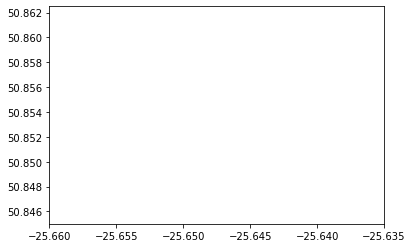

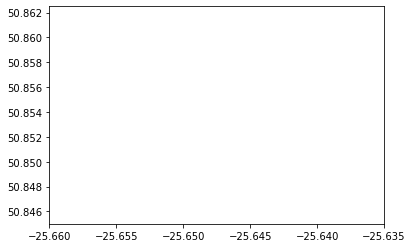

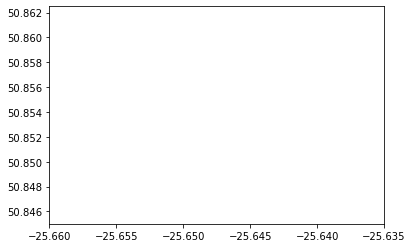

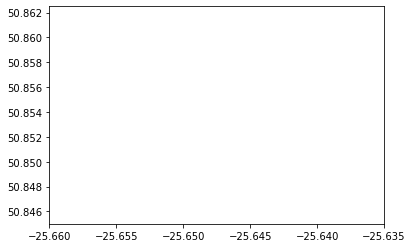

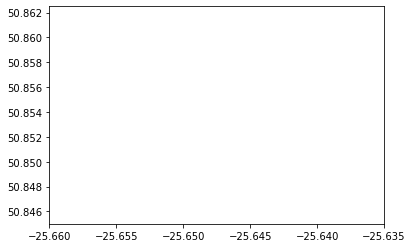

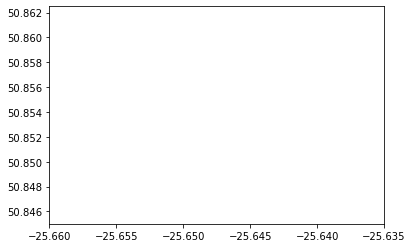

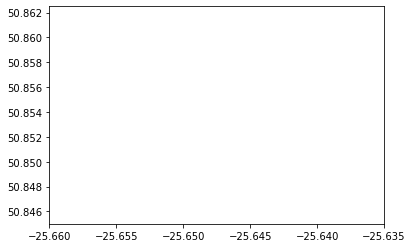

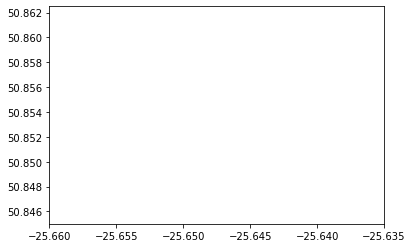

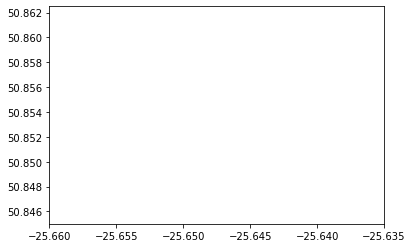

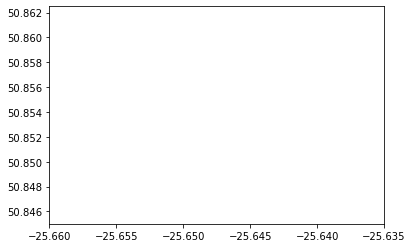

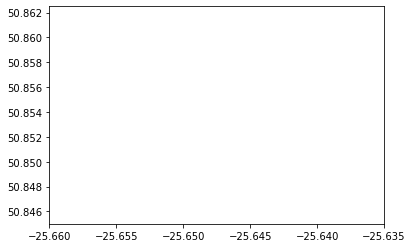

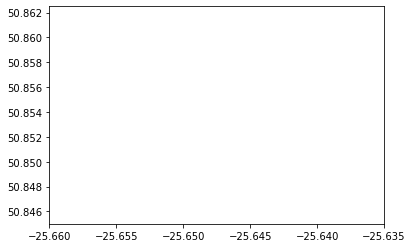

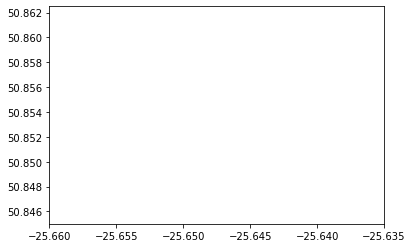

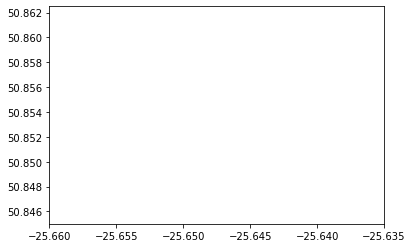

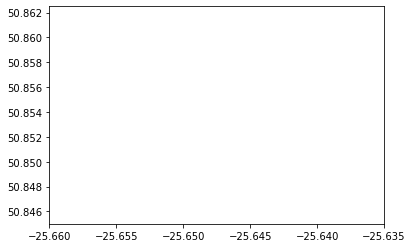

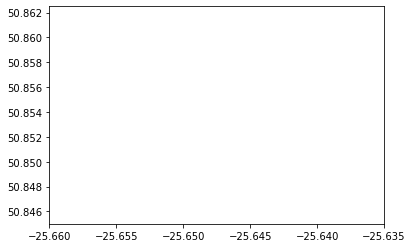

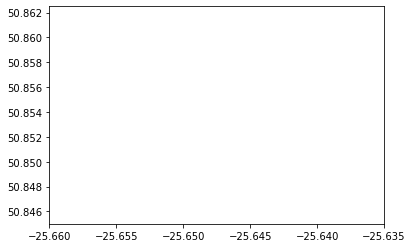

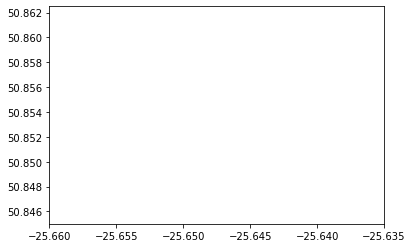

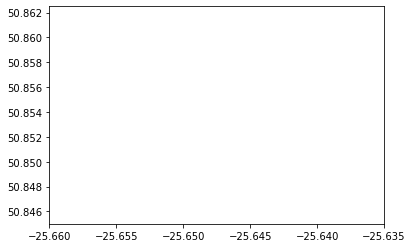

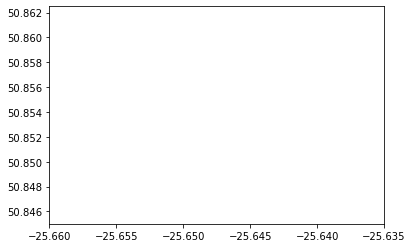

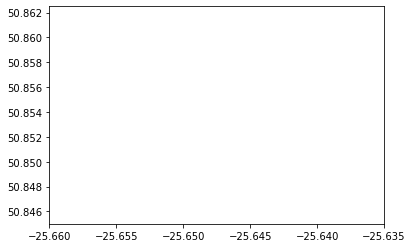

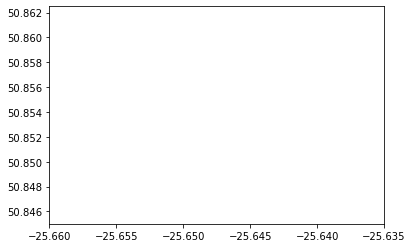

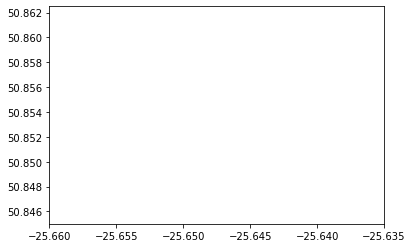

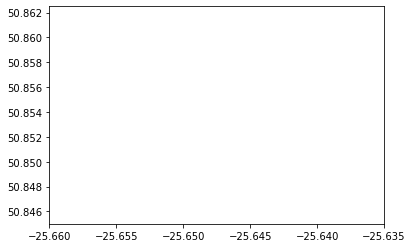

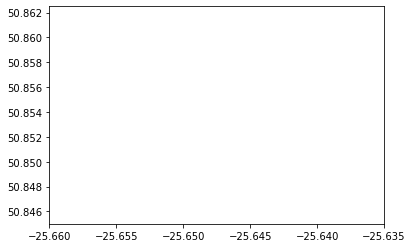

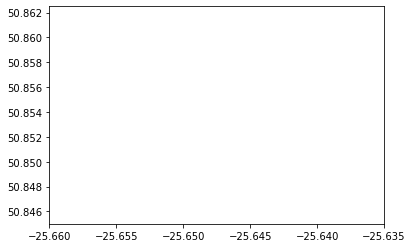

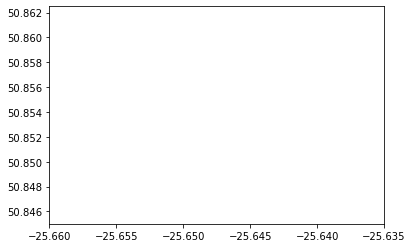

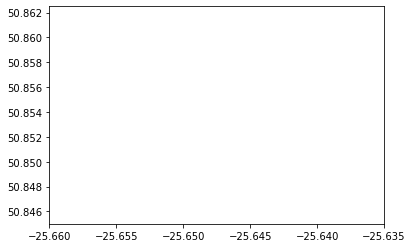

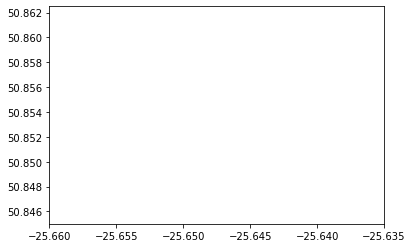

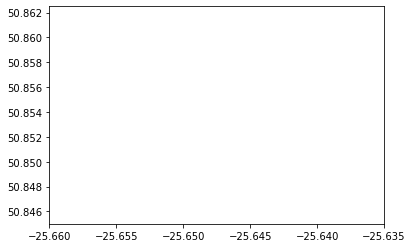

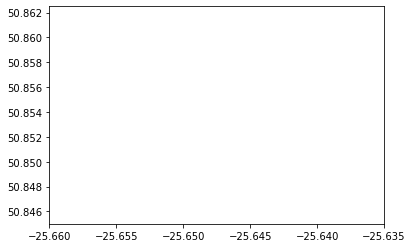

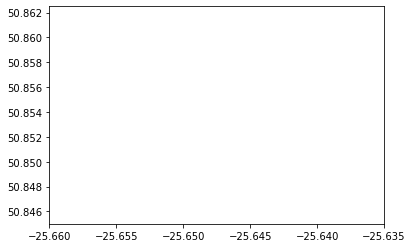

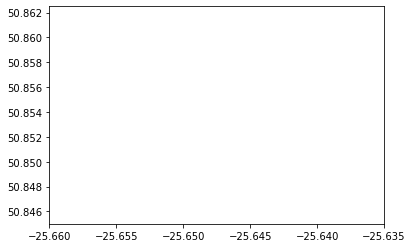

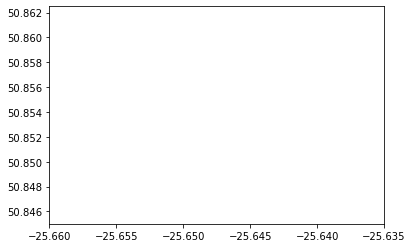

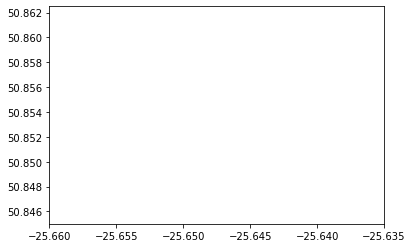

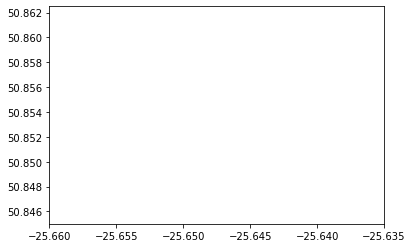

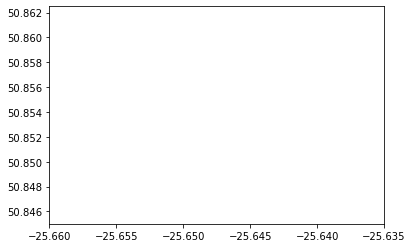

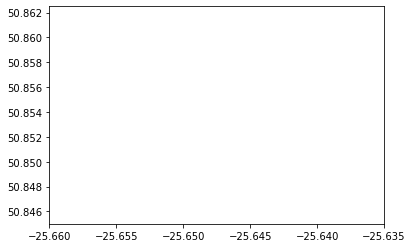

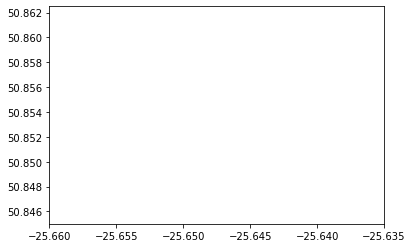

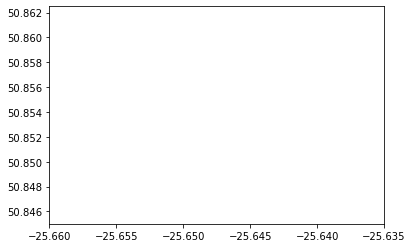

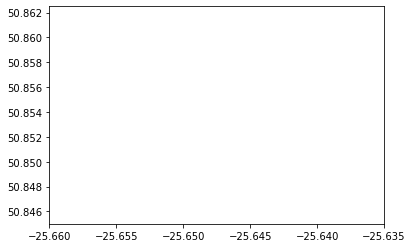

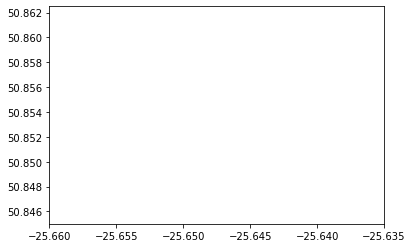

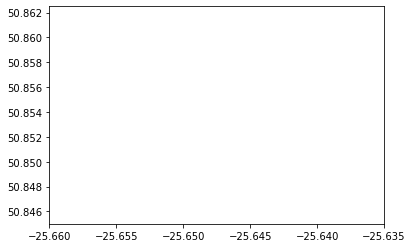

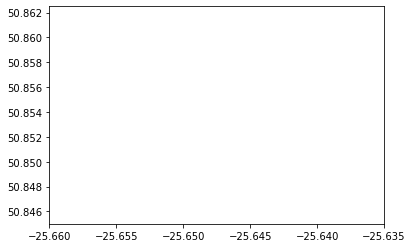

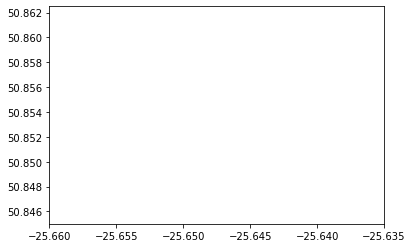

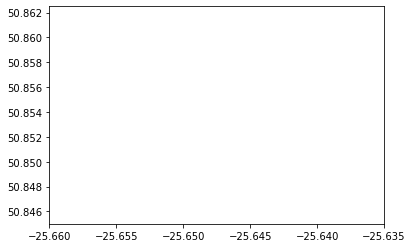

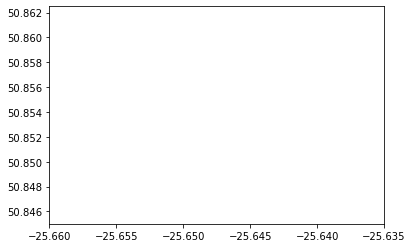

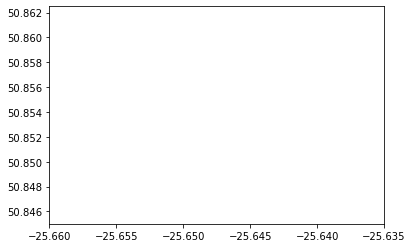

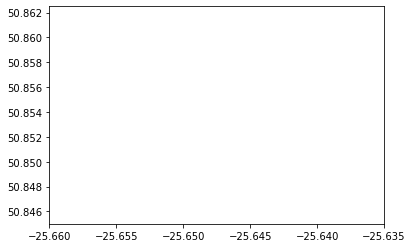

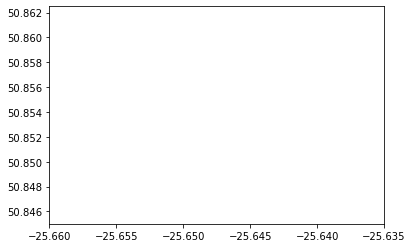

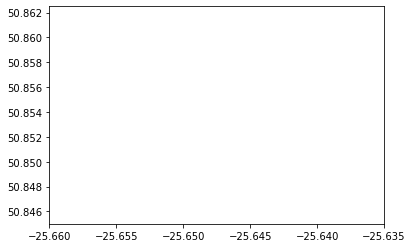

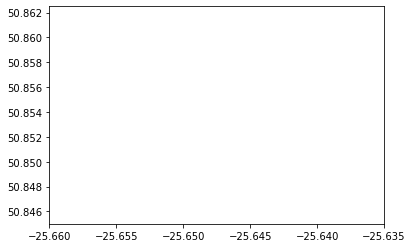

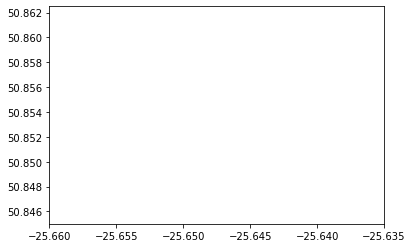

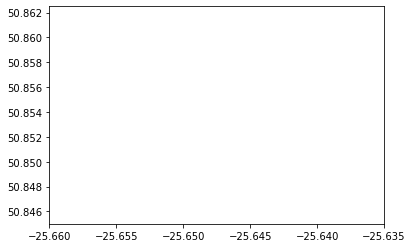

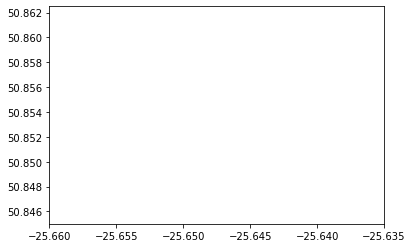

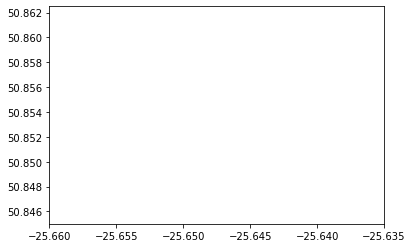

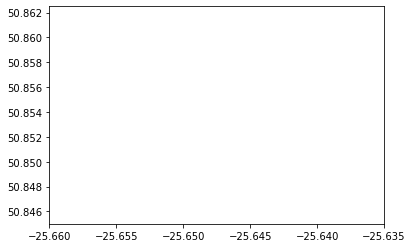

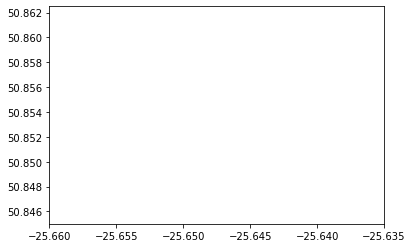

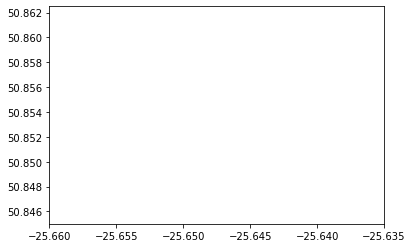

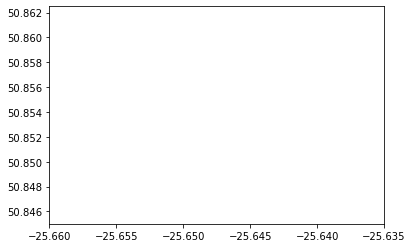

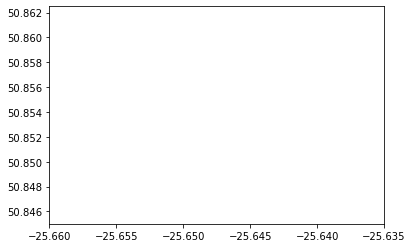

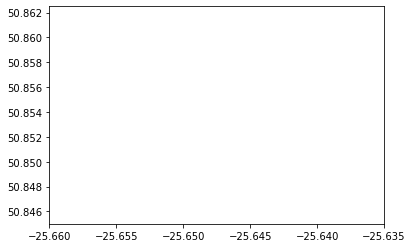

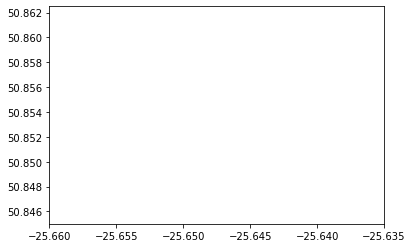

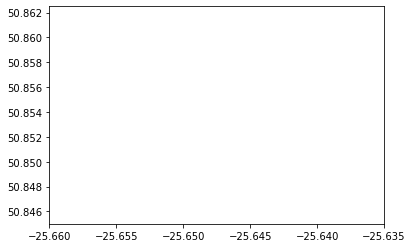

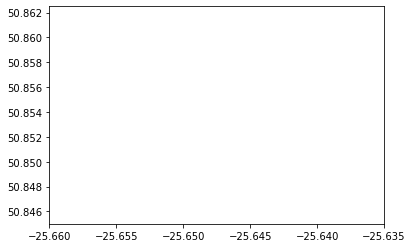

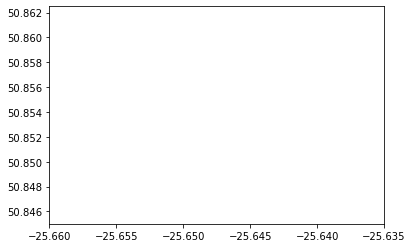

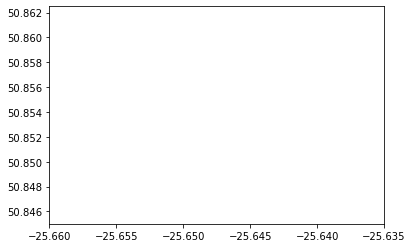

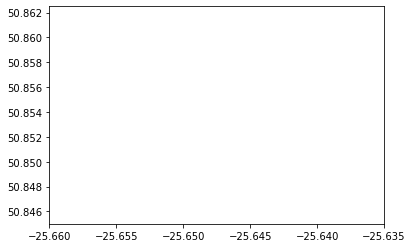

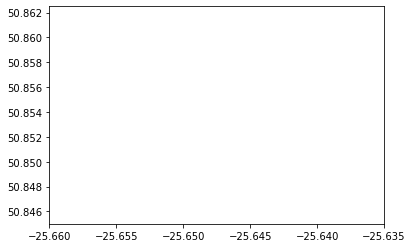

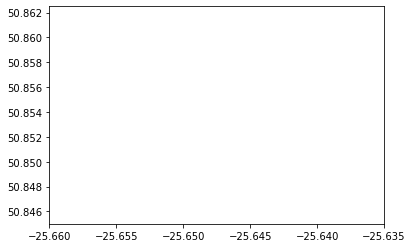

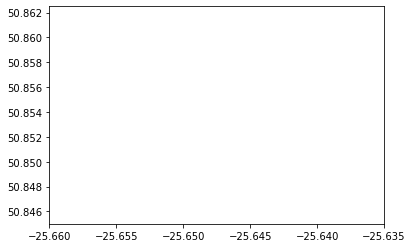

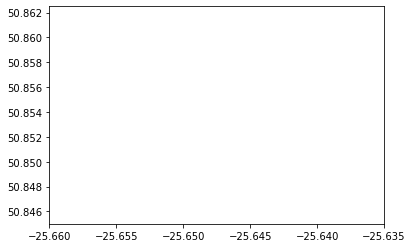

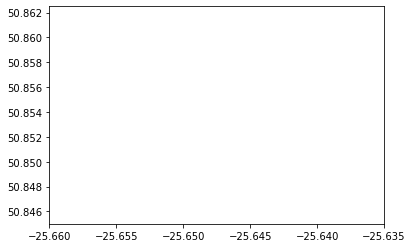

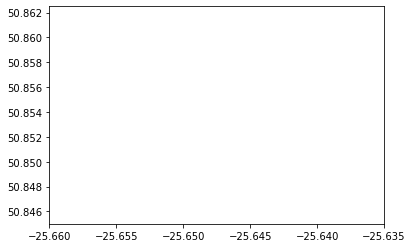

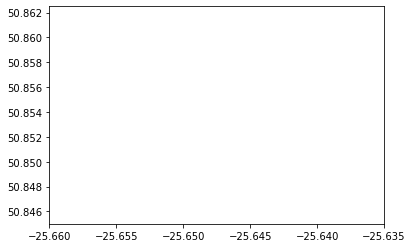

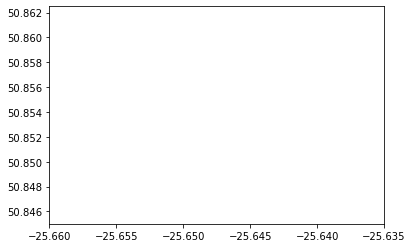

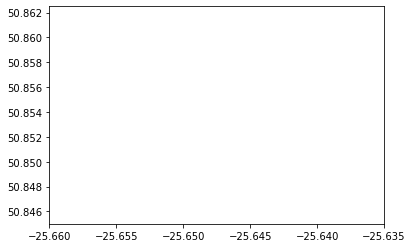

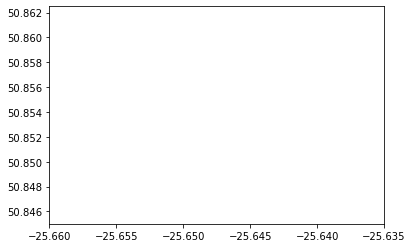

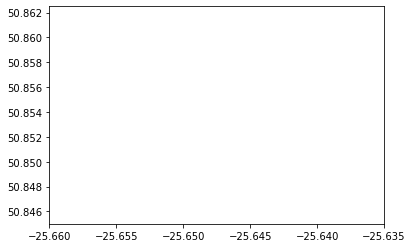

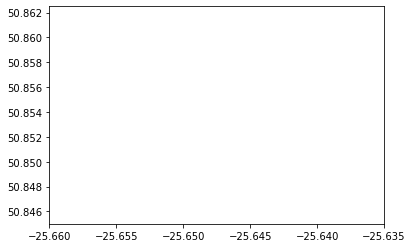

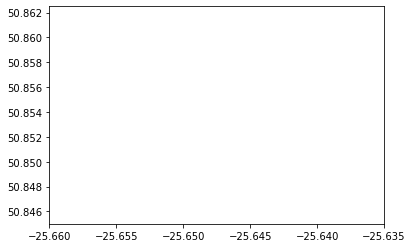

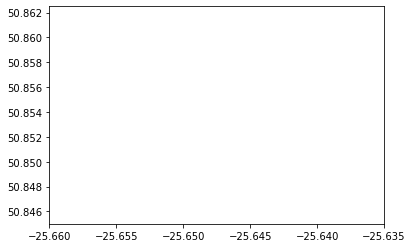

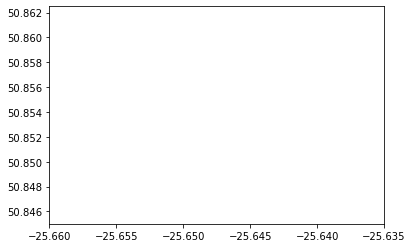

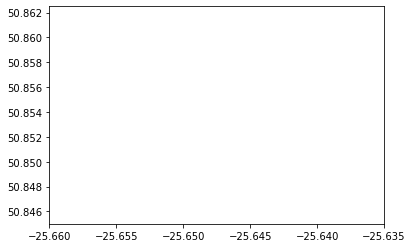

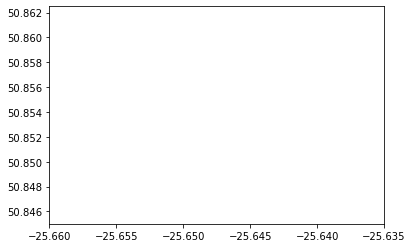

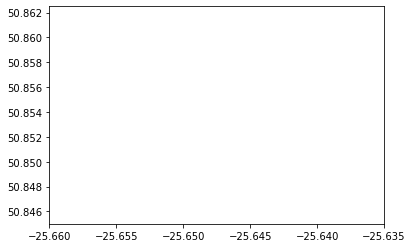

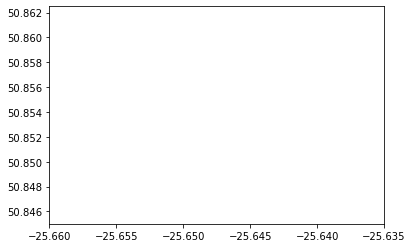

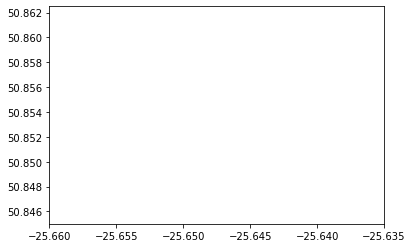

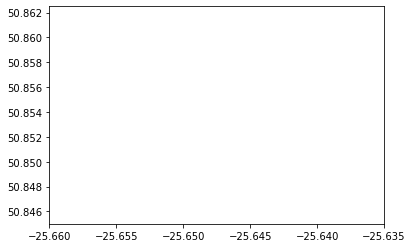

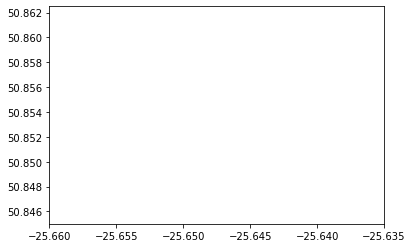

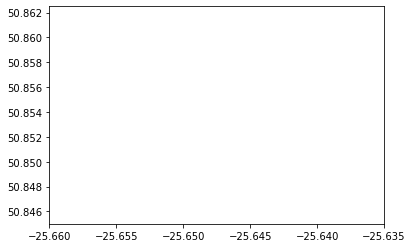

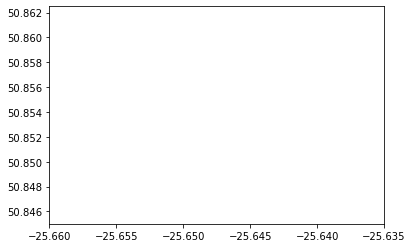

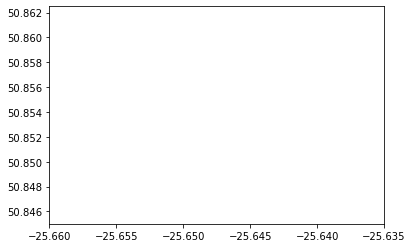

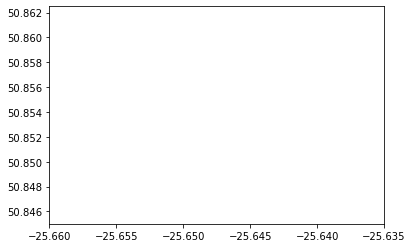

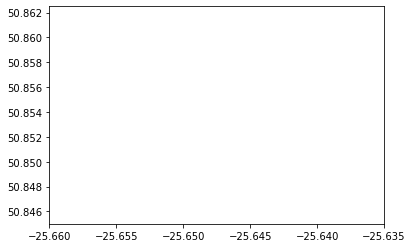

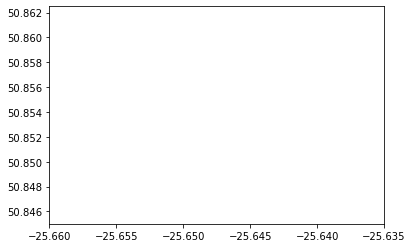

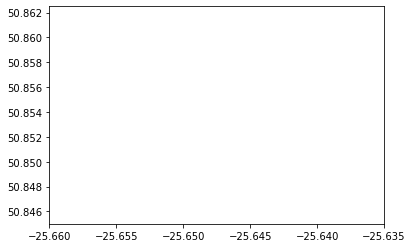

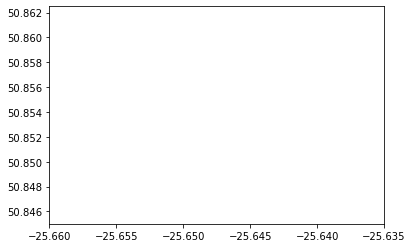

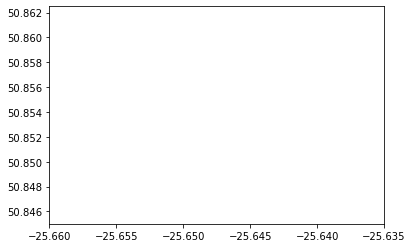

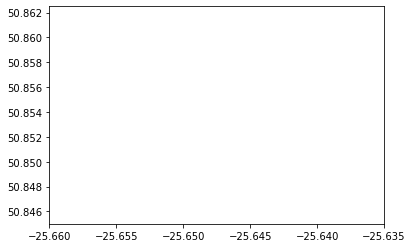

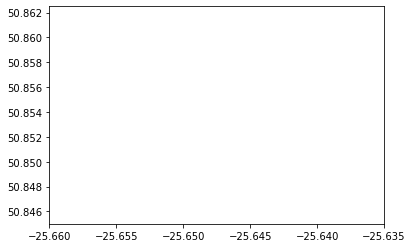

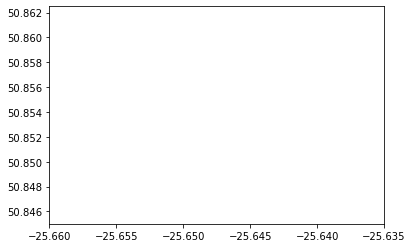

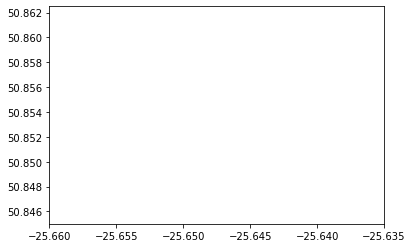

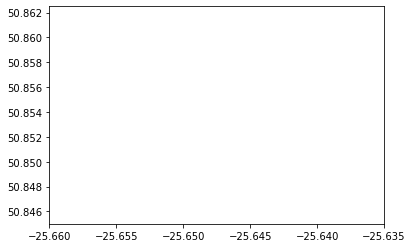

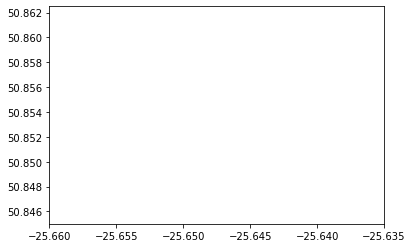

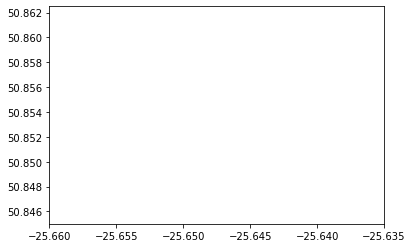

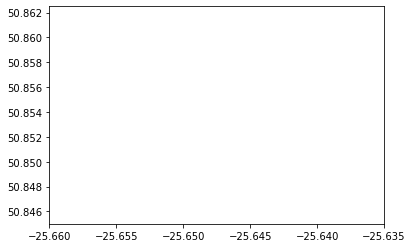

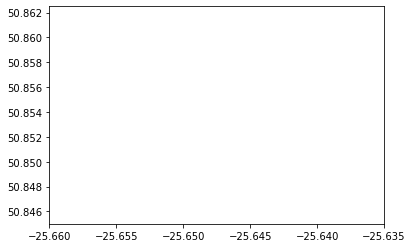

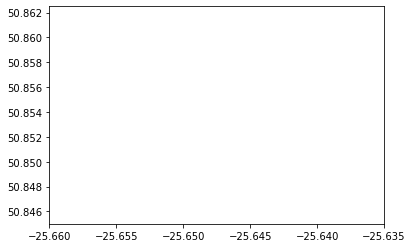

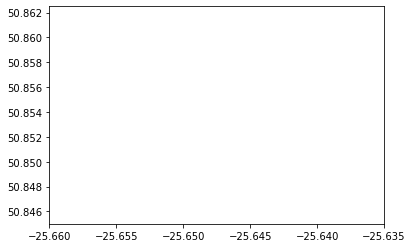

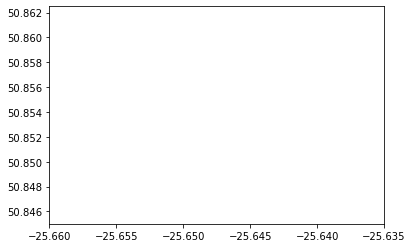

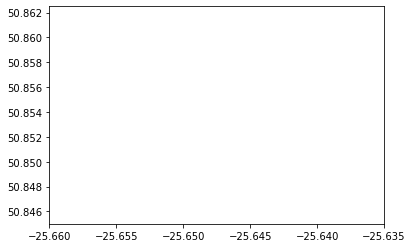

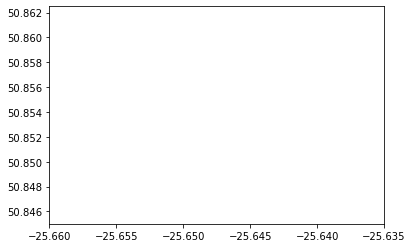

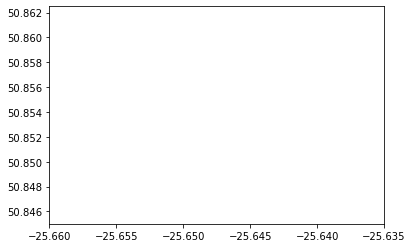

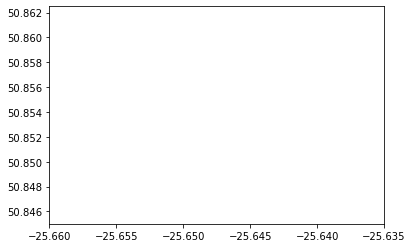

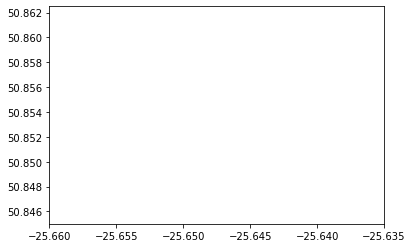

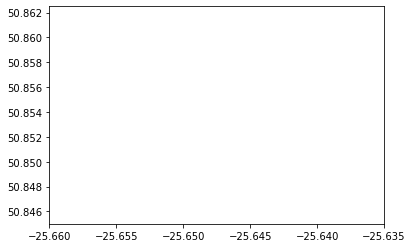

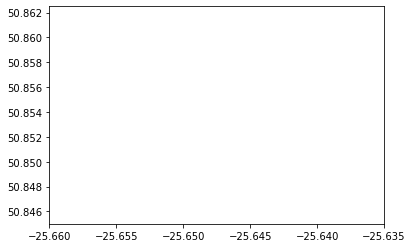

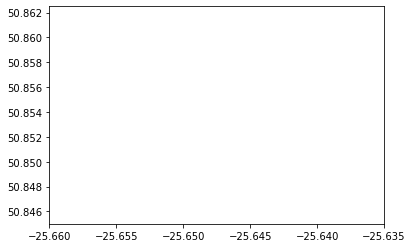

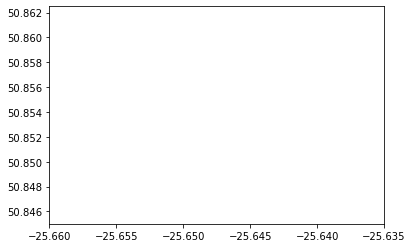

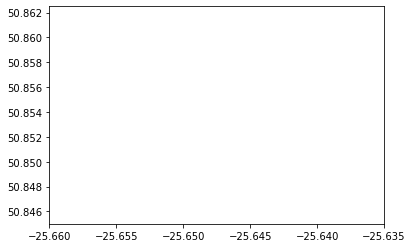

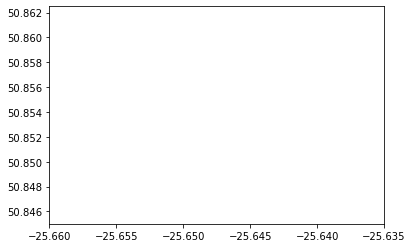

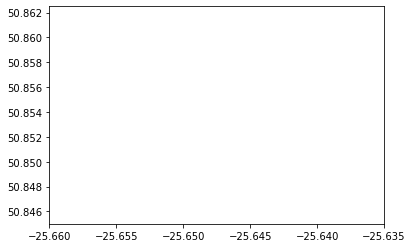

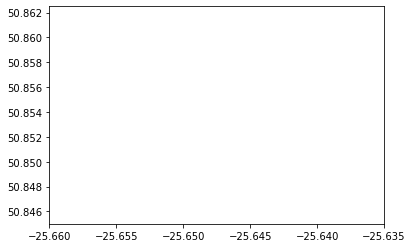

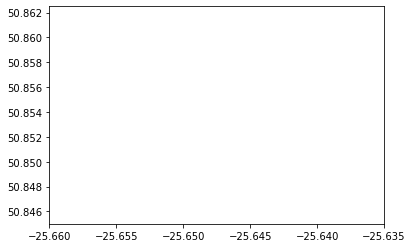

In [48]:
import matplotlib.pyplot as plt
#import random

x_val = []
y_val = []

for i in range(0,150):
    x_val.append(x_coordinates[i])
    y_val.append(y_coordinates[i])

    plt.xlim(-25.660,-25.635)
    plt.ylim(50.8450, 50.8625)
    plt.scatter(x_val, y_val)
    plt.pause(.0001)
plt.show()

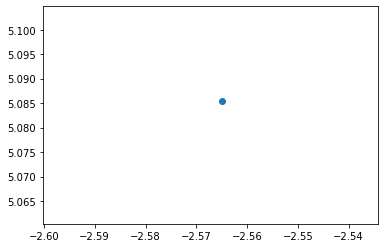

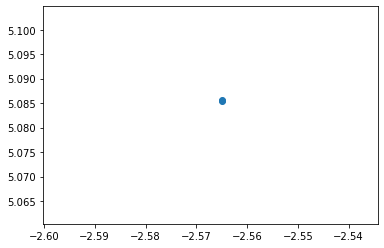

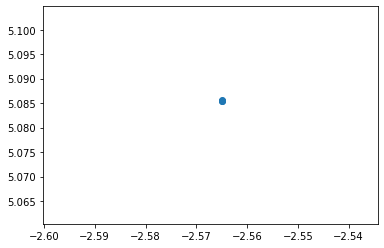

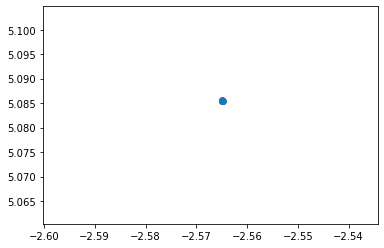

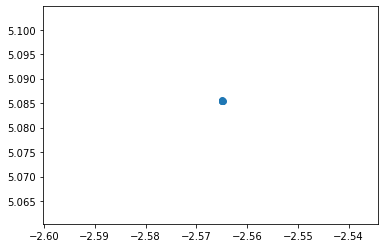

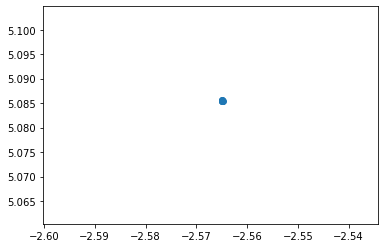

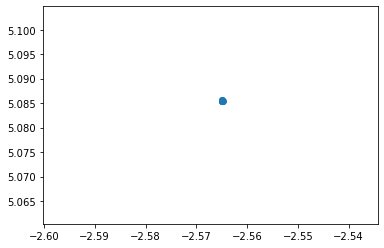

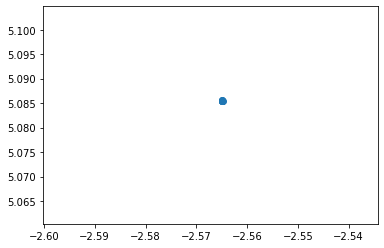

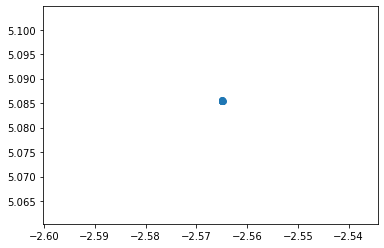

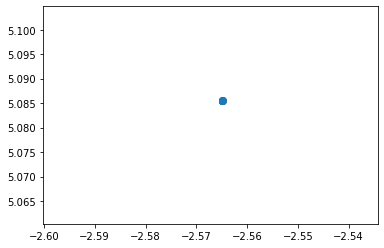

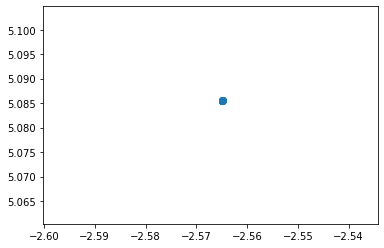

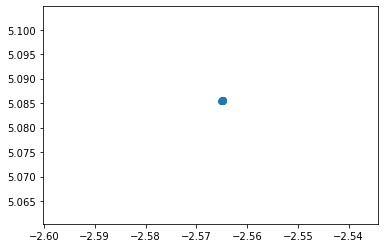

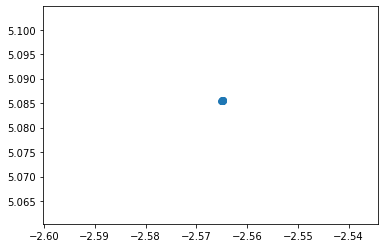

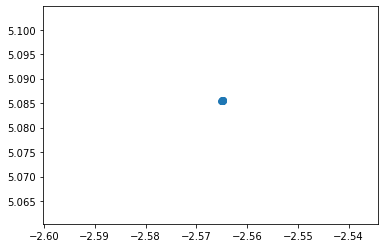

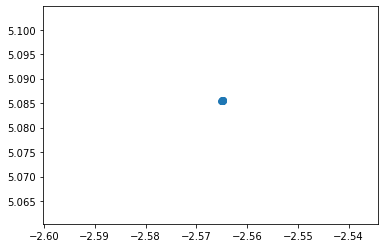

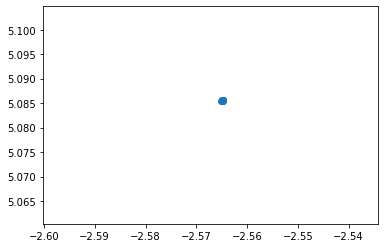

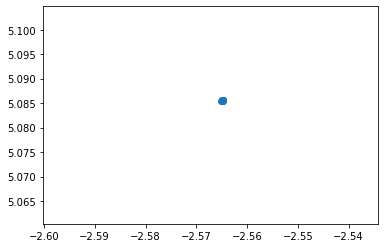

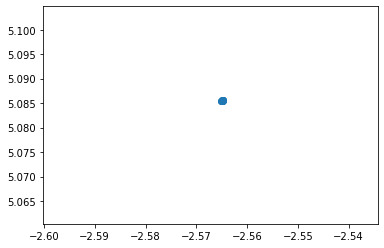

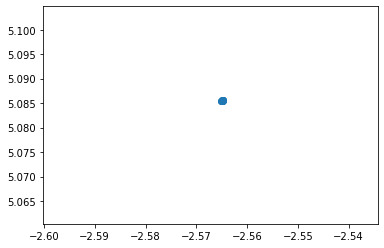

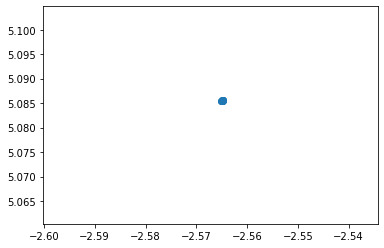

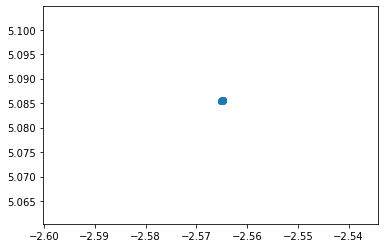

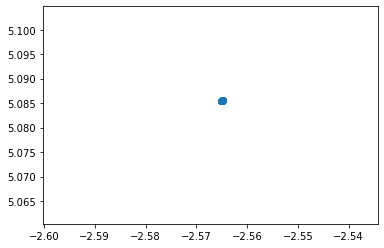

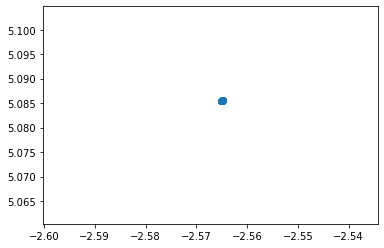

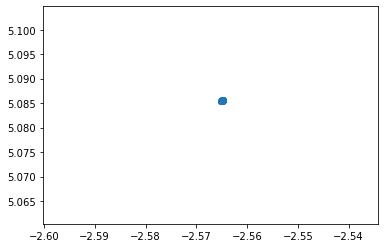

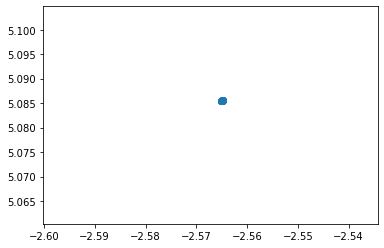

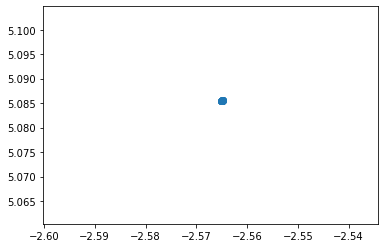

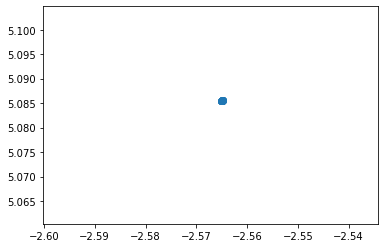

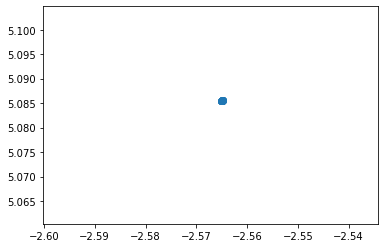

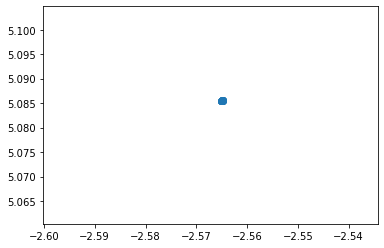

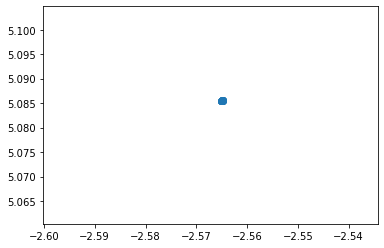

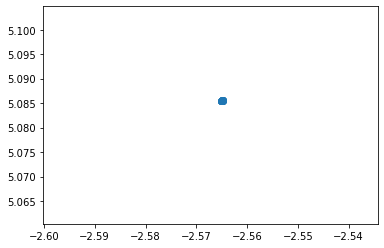

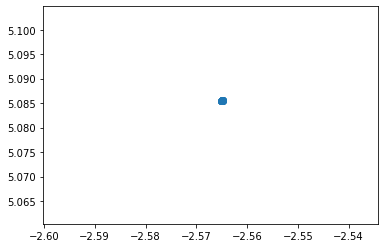

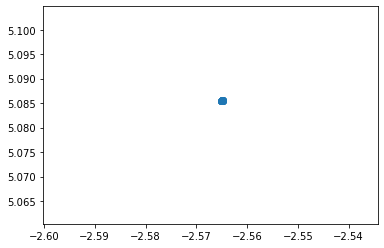

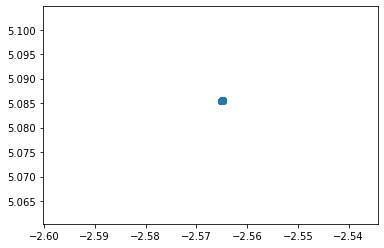

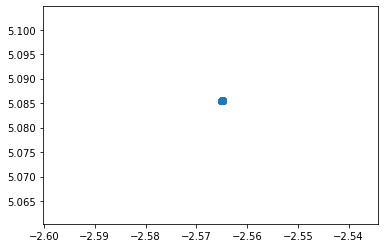

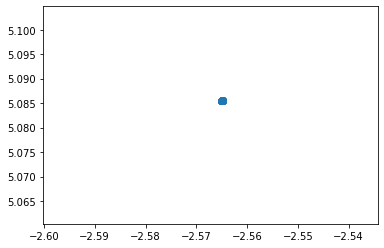

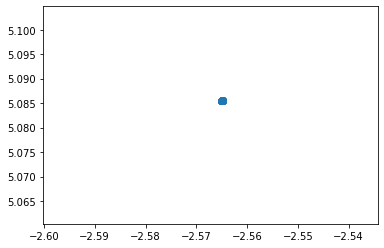

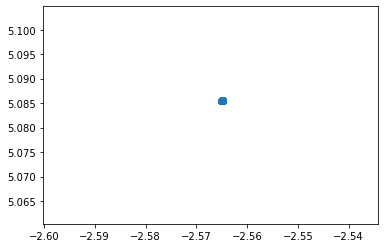

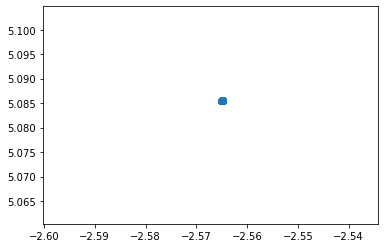

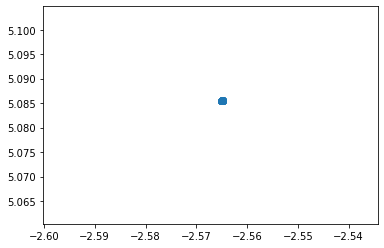

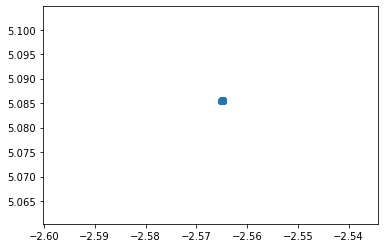

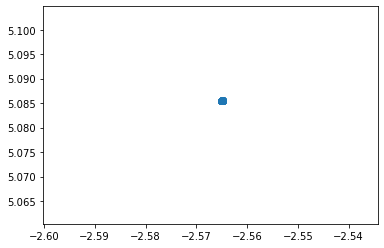

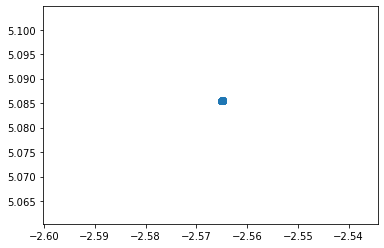

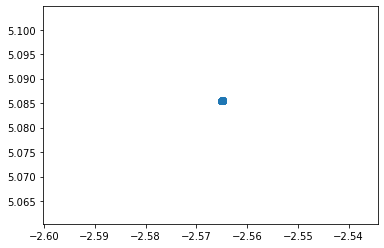

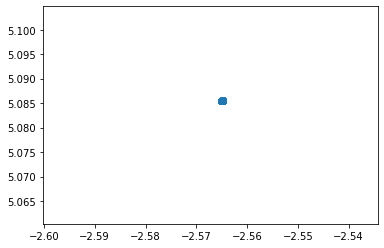

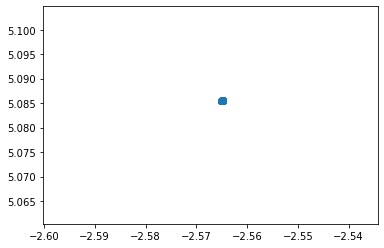

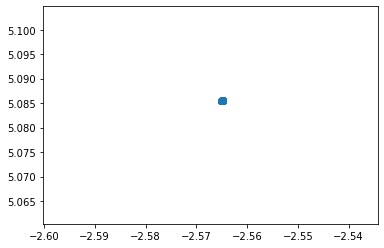

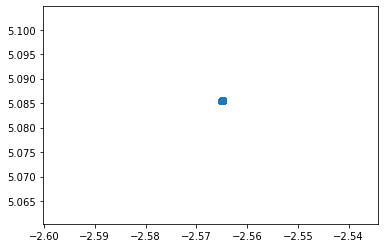

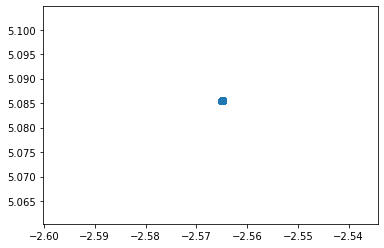

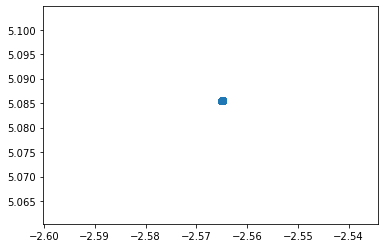

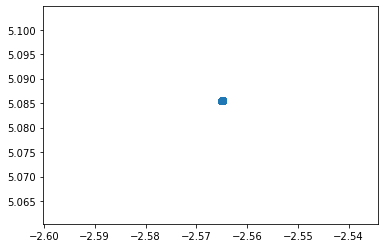

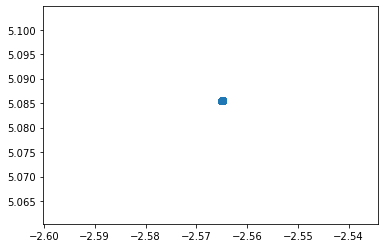

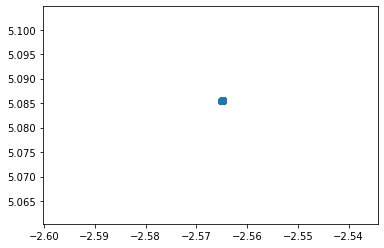

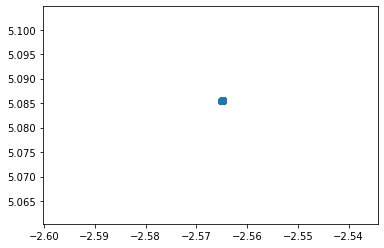

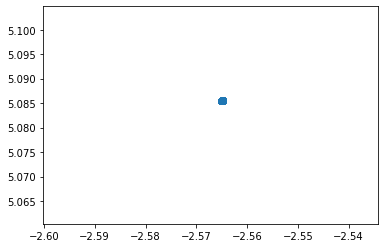

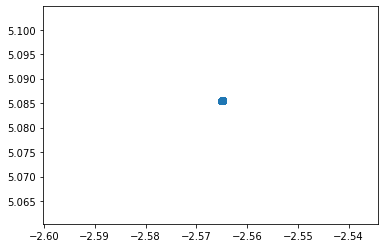

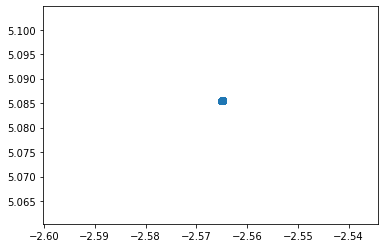

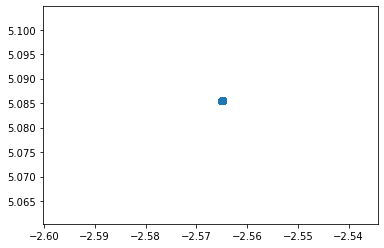

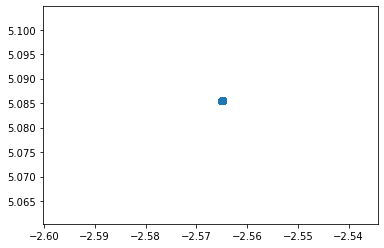

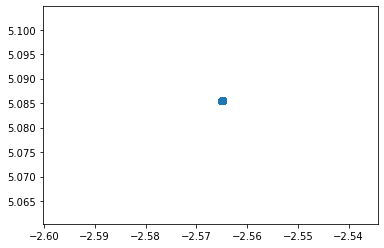

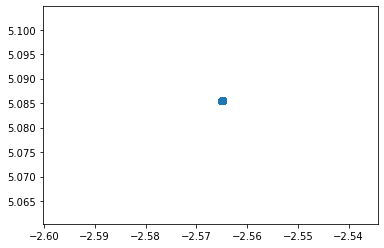

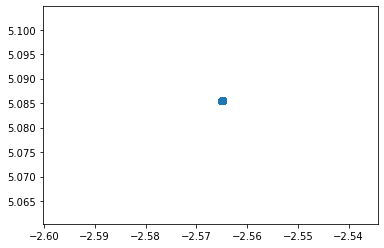

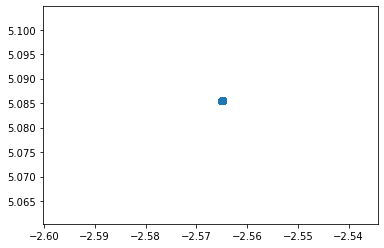

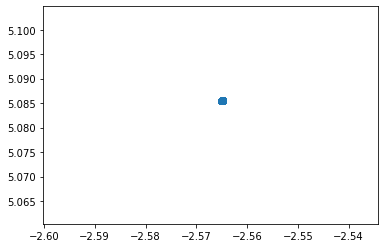

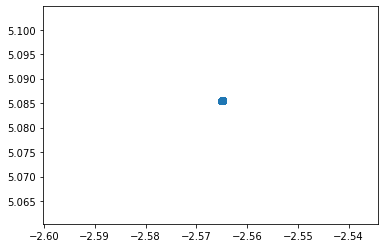

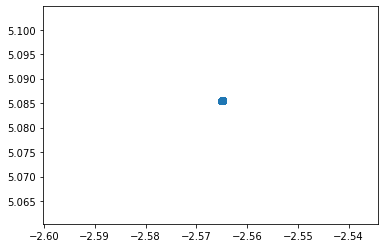

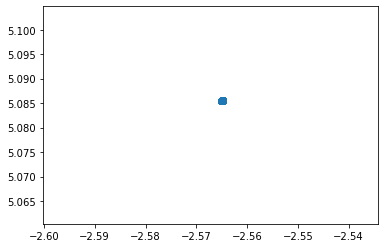

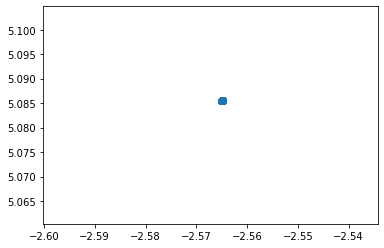

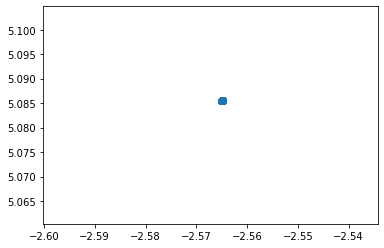

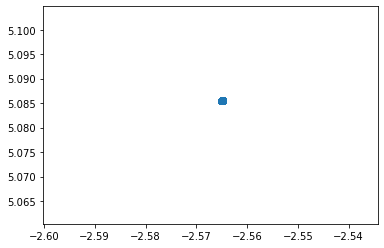

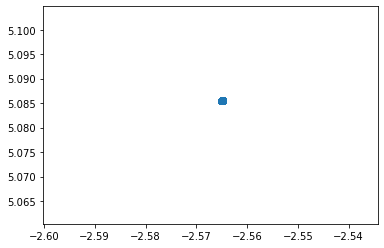

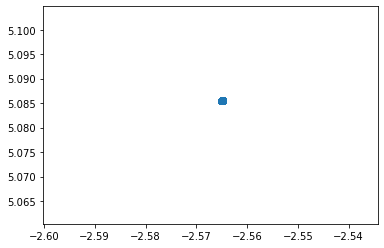

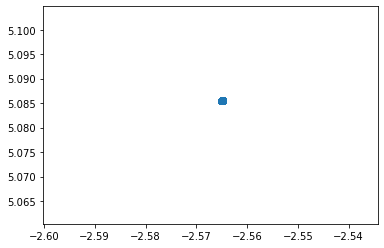

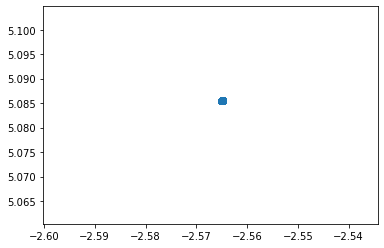

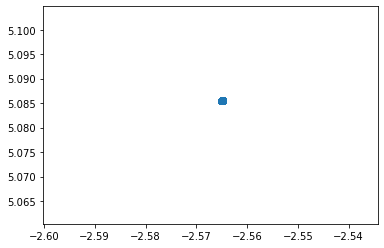

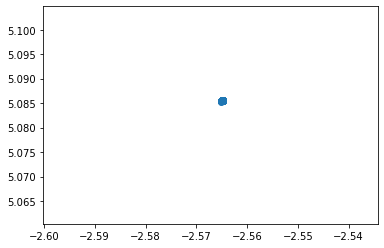

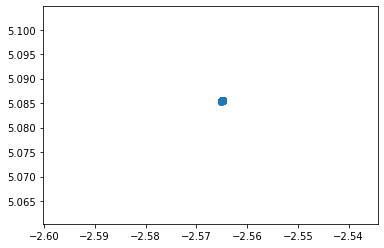

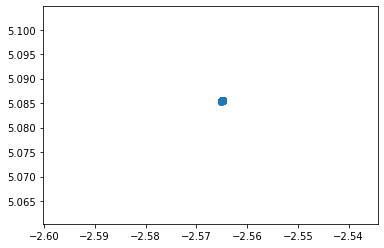

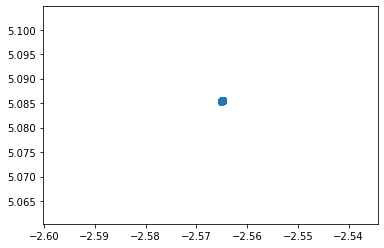

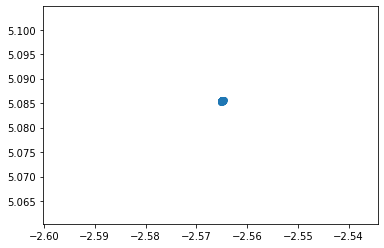

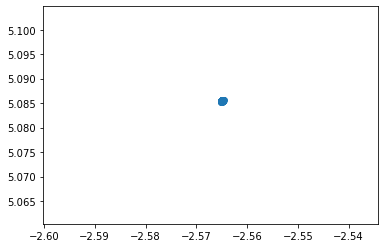

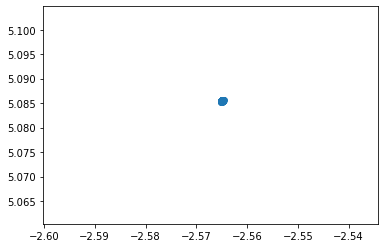

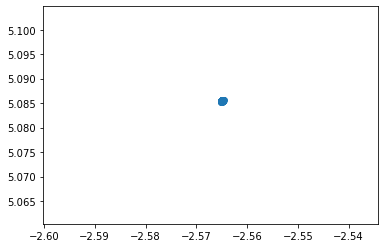

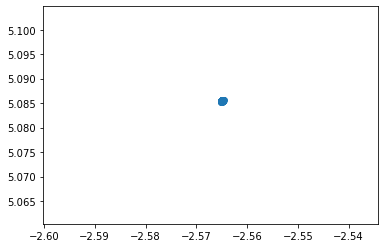

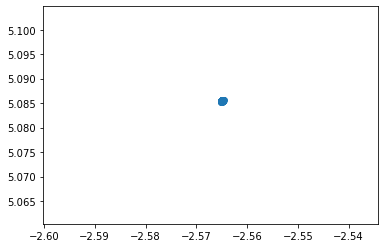

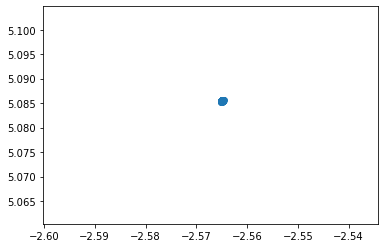

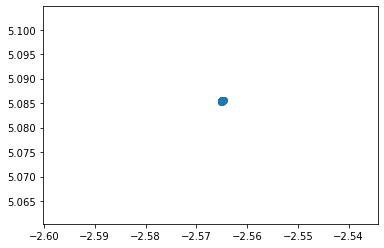

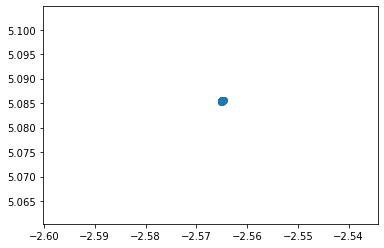

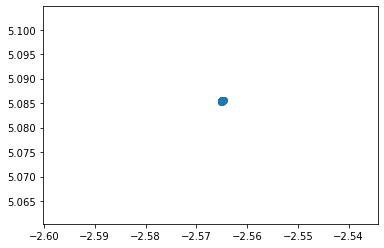

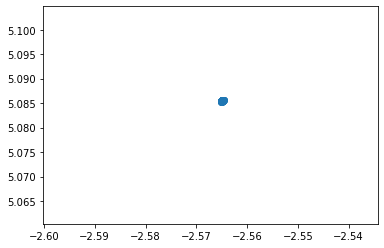

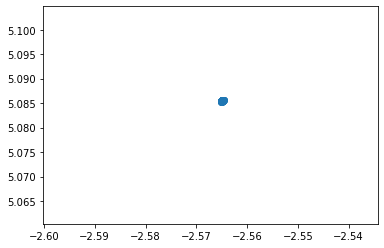

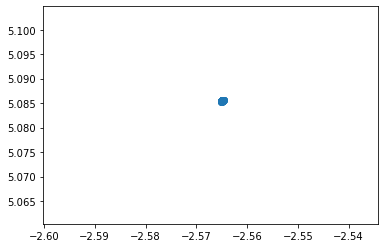

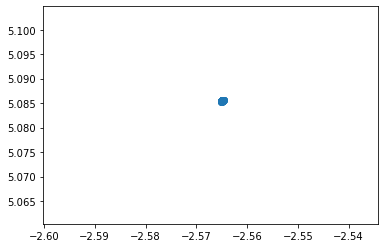

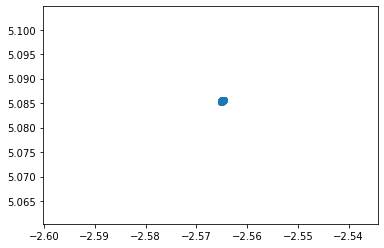

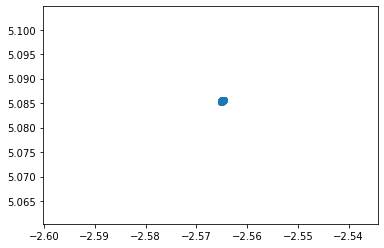

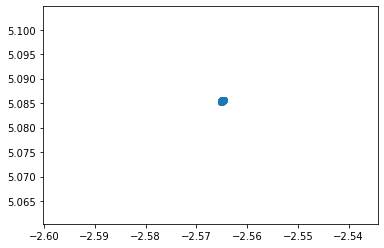

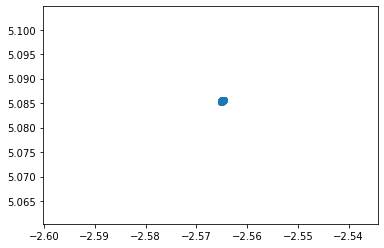

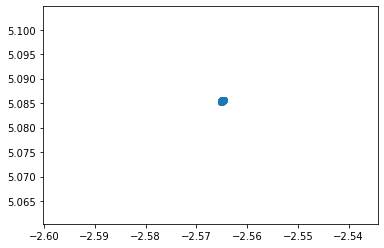

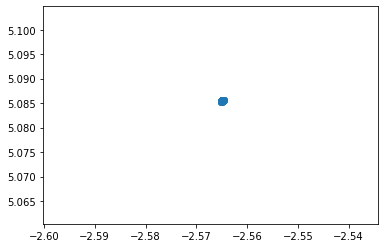

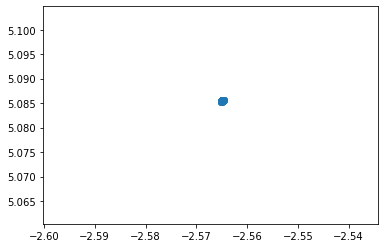

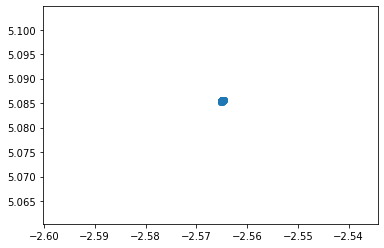

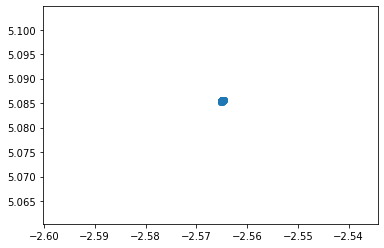

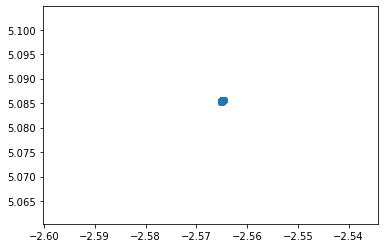

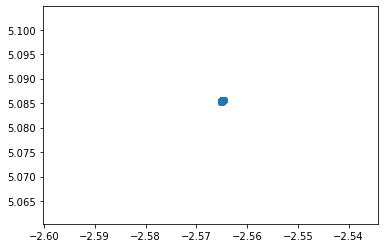

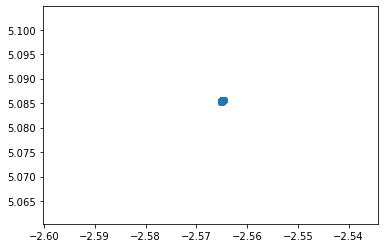

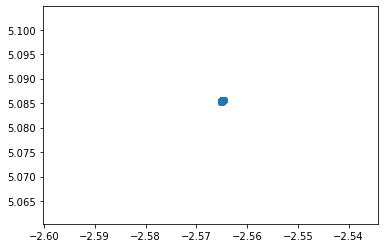

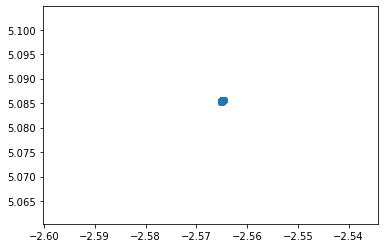

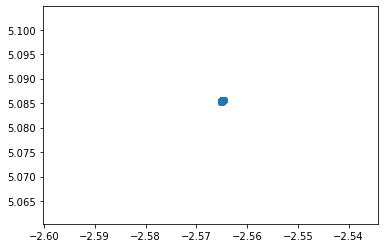

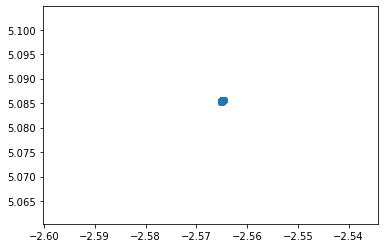

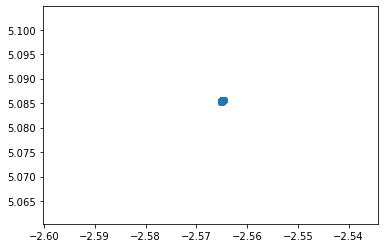

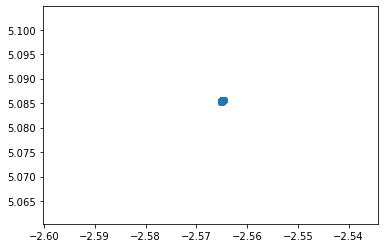

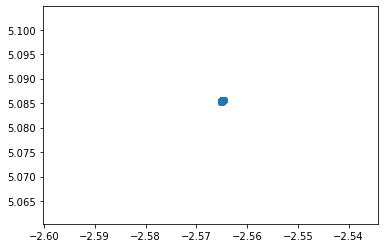

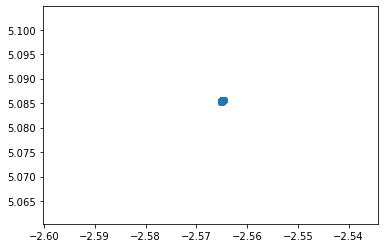

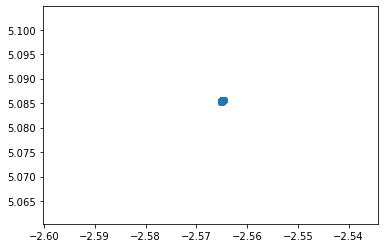

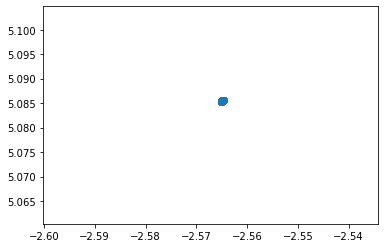

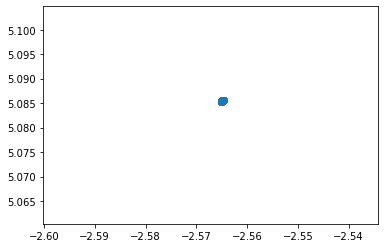

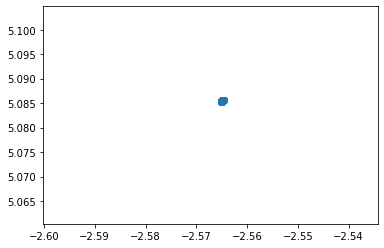

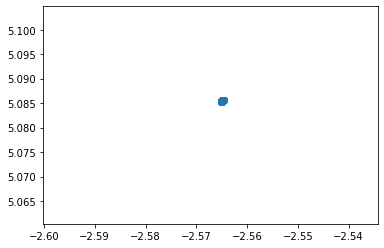

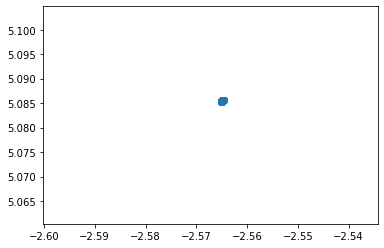

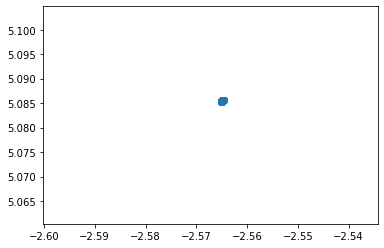

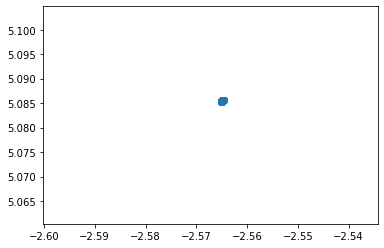

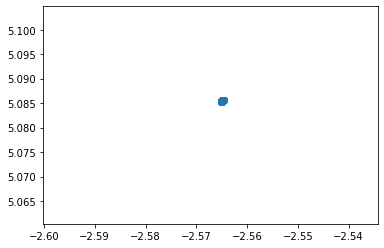

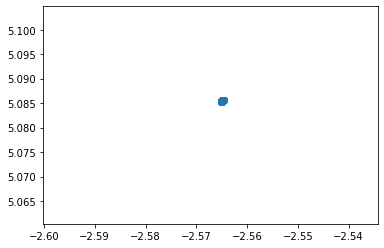

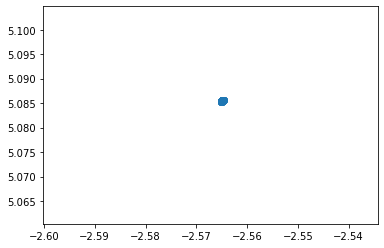

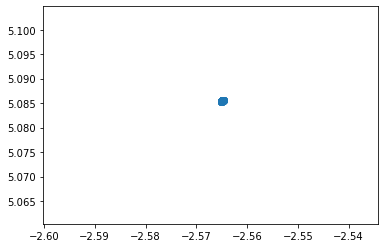

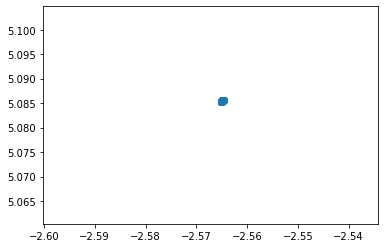

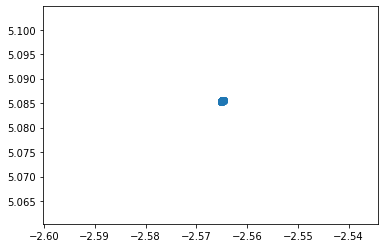

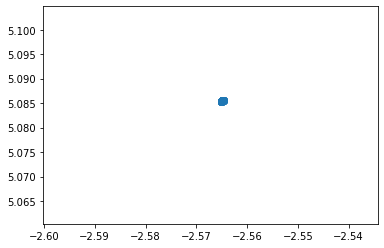

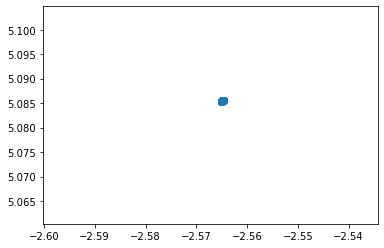

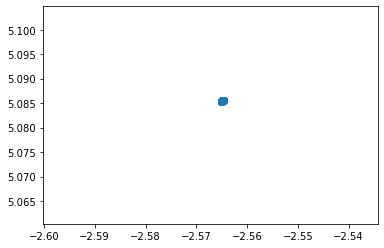

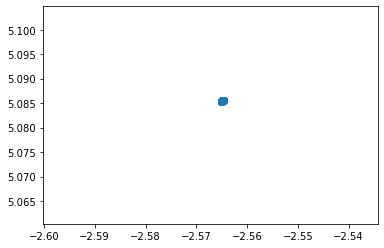

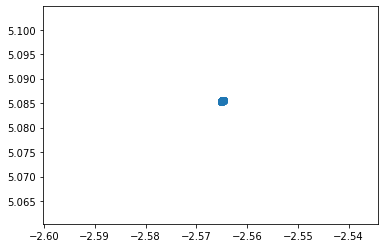

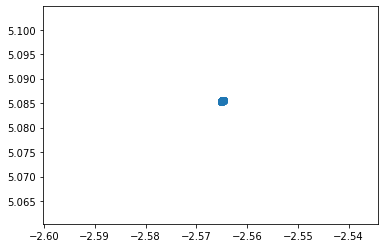

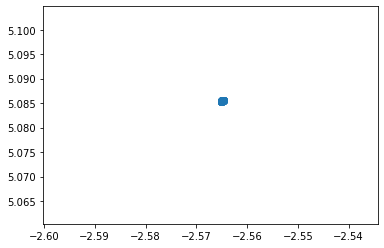

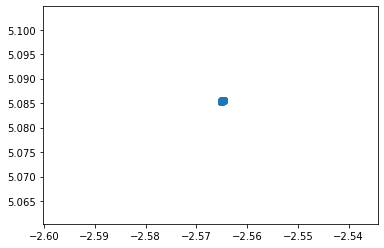

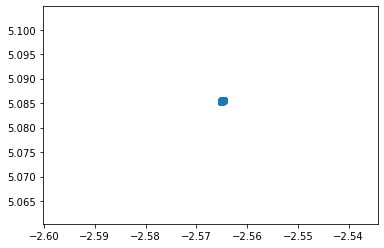

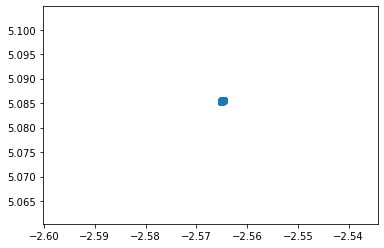

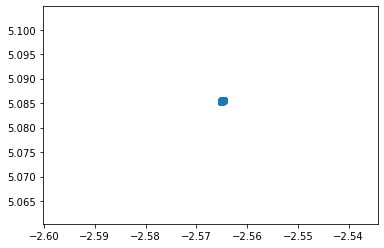

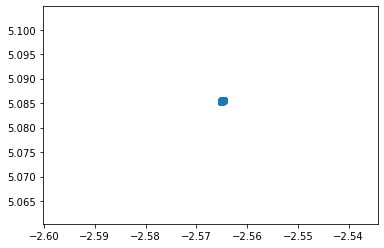

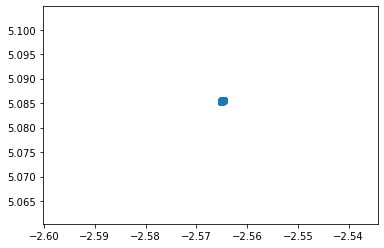

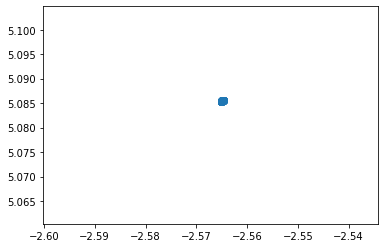

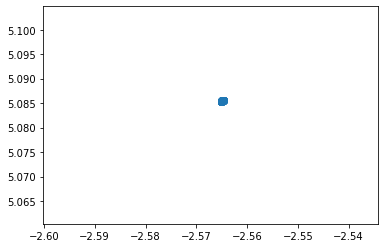

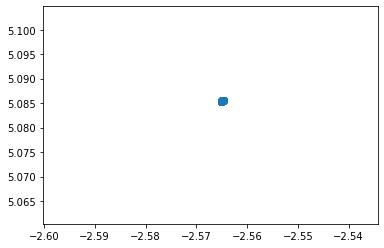

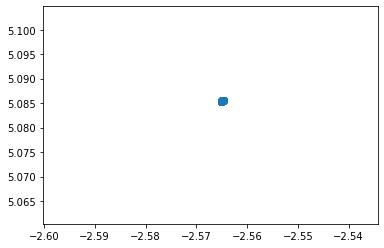

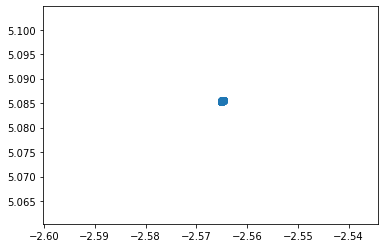

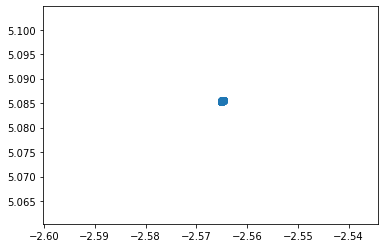

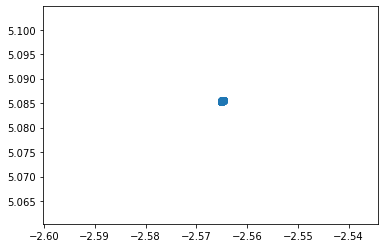

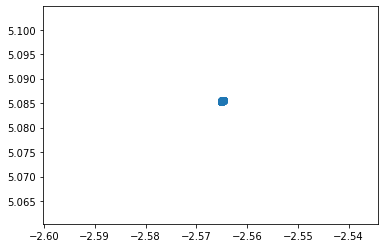

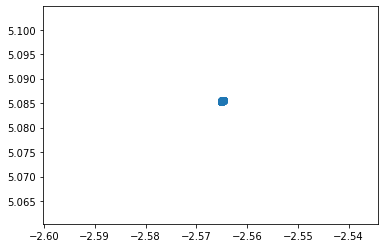

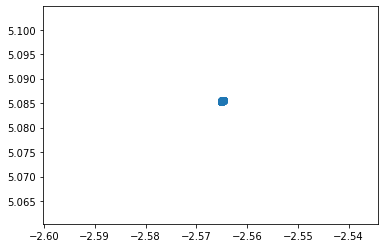

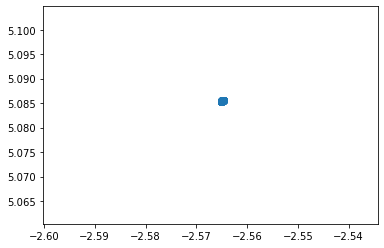

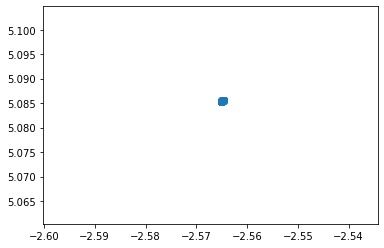

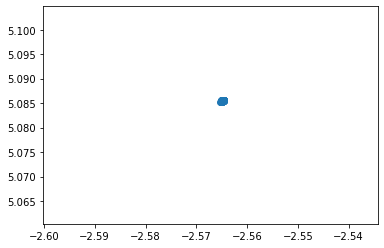

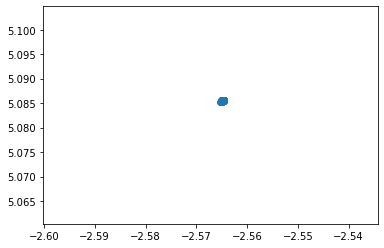

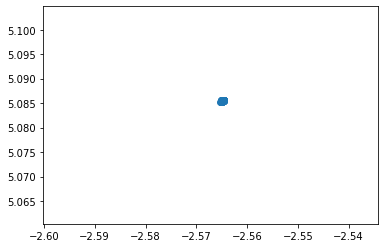

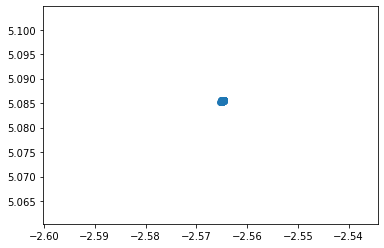

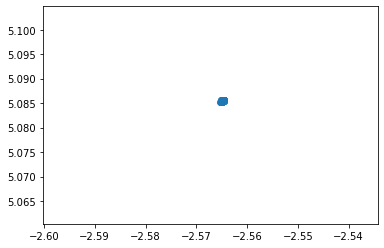

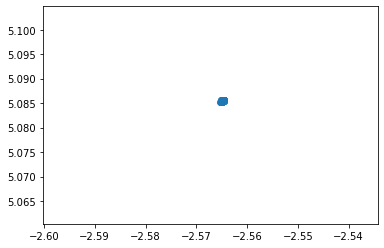

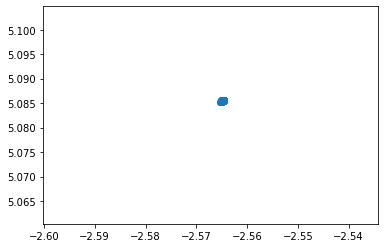

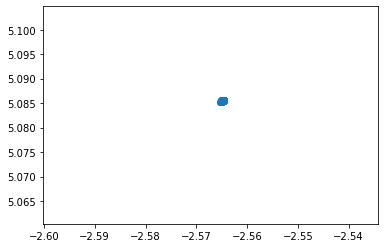

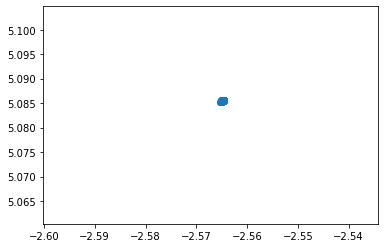

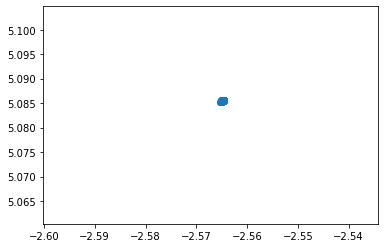

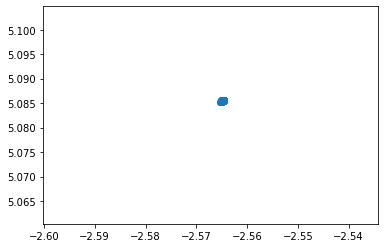

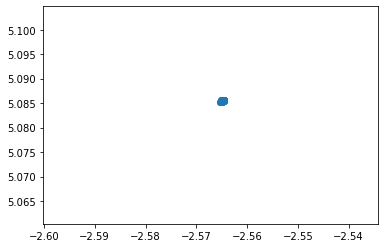

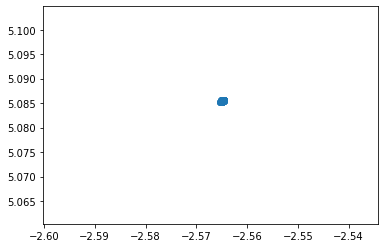

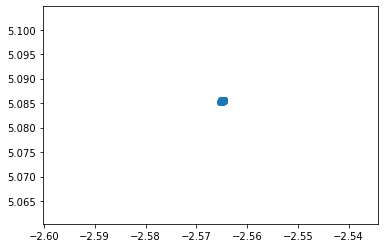

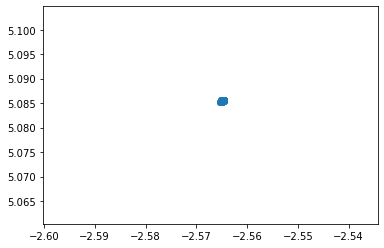

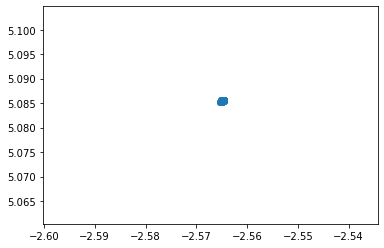

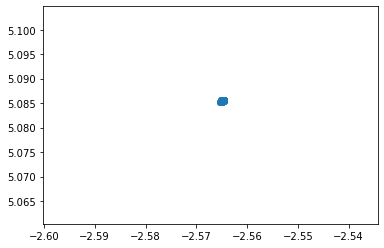

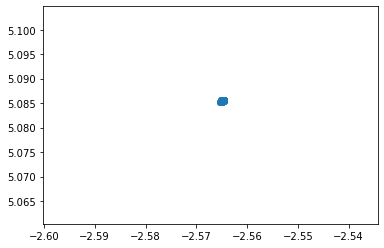

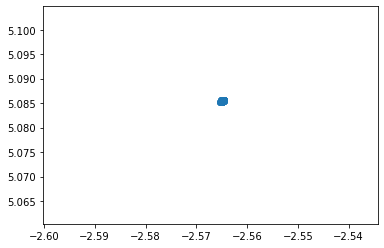

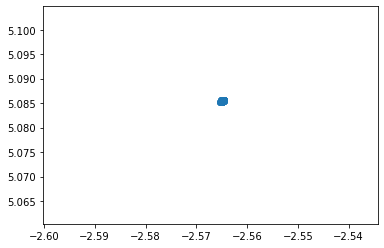

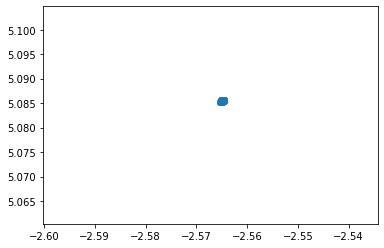

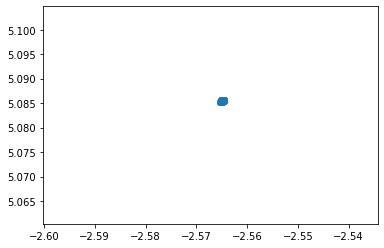

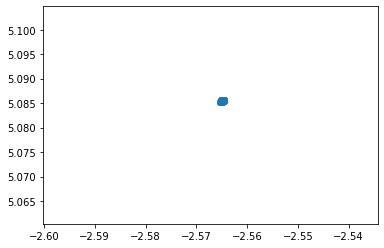

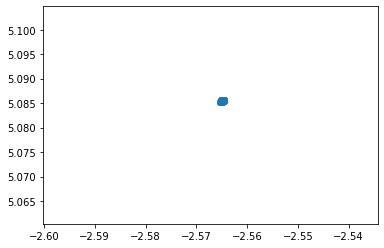

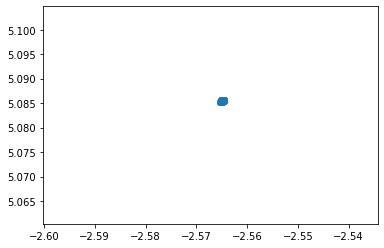

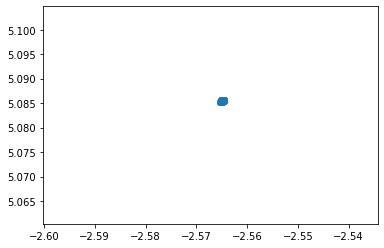

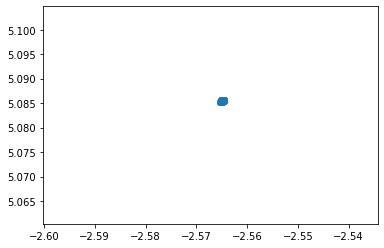

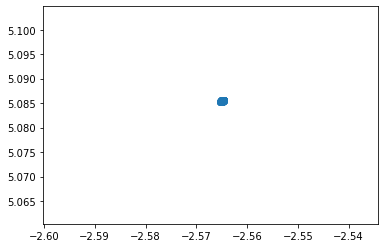

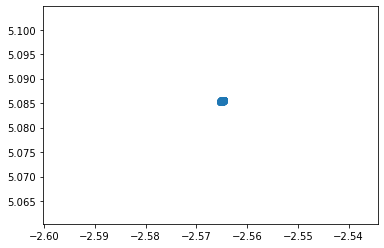

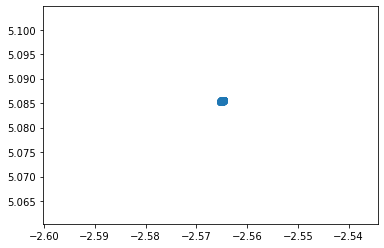

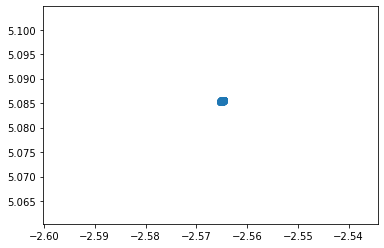

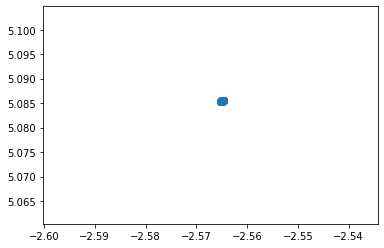

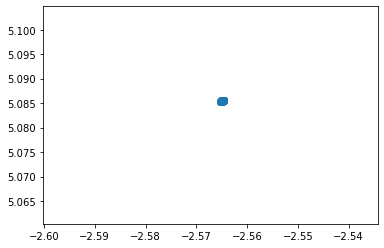

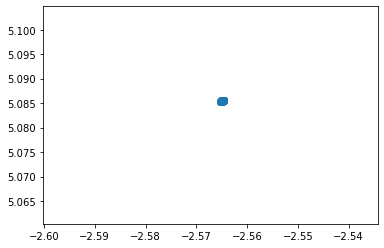

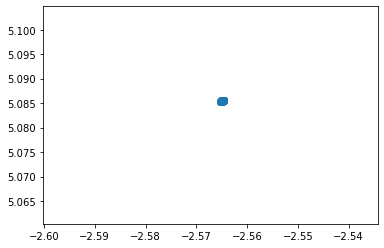

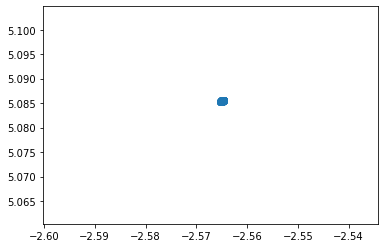

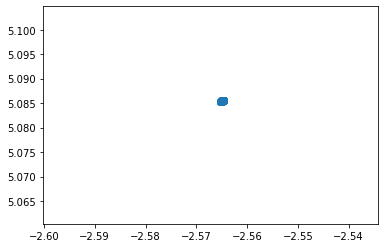

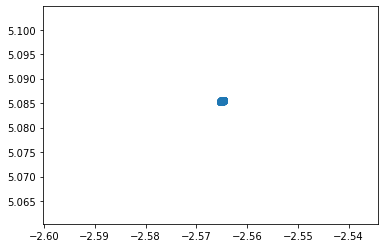

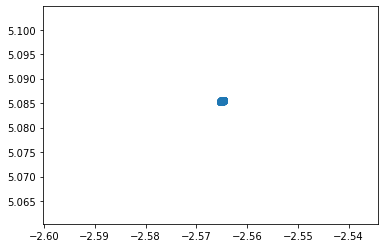

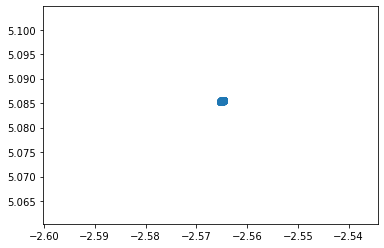

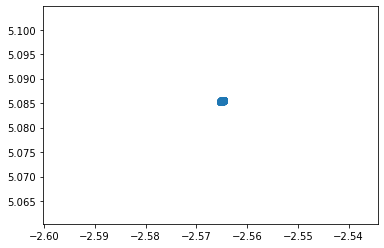

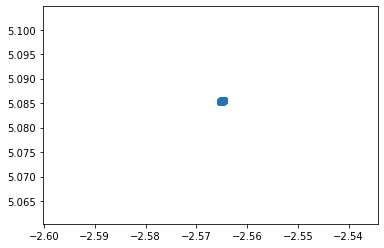

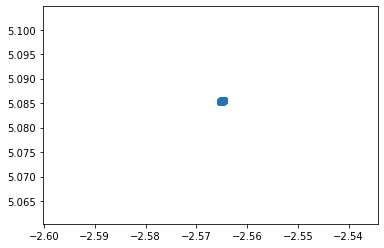

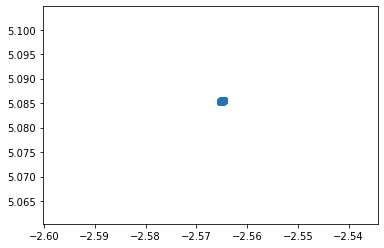

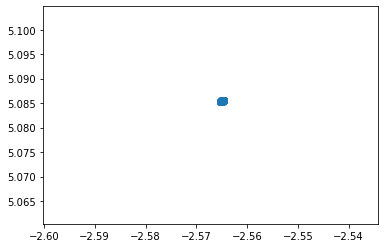

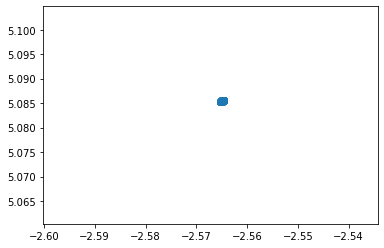

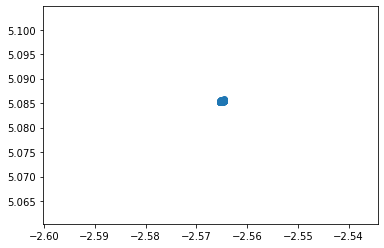

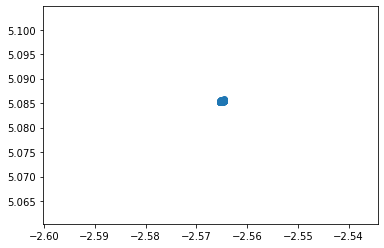

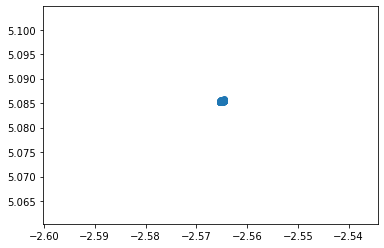

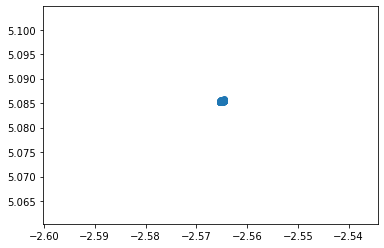

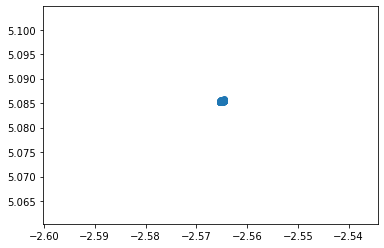

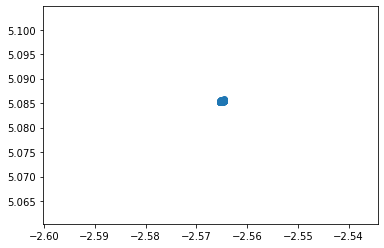

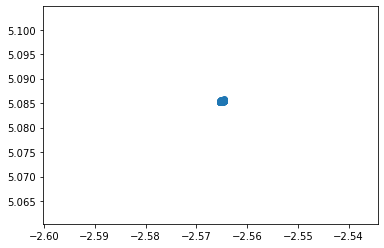

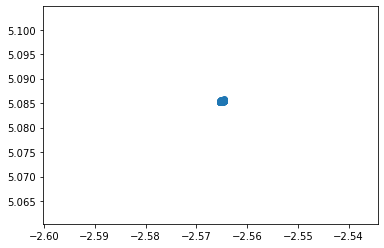

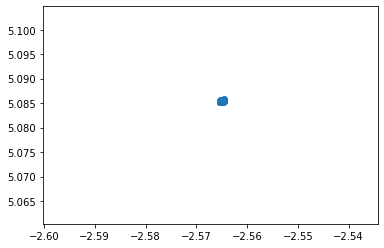

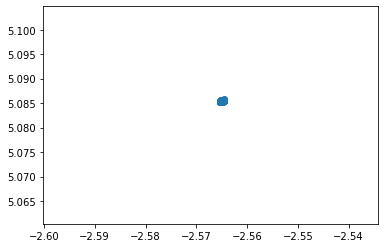

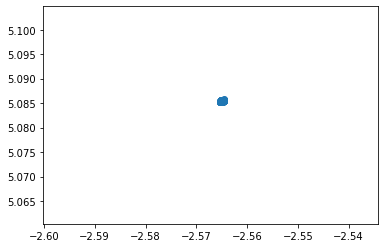

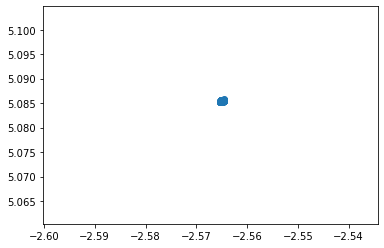

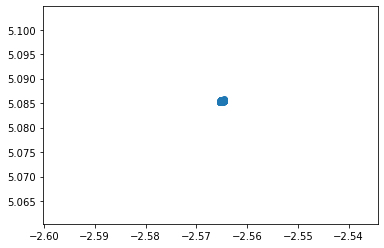

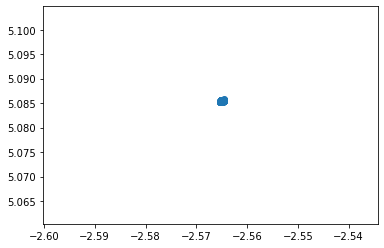

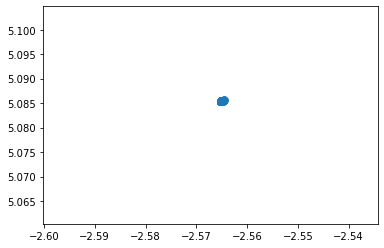

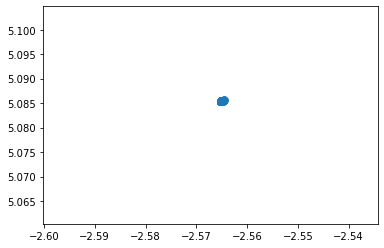

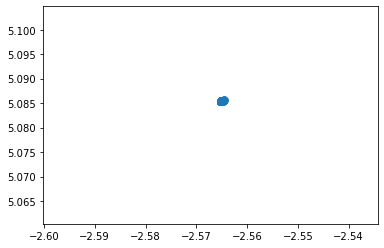

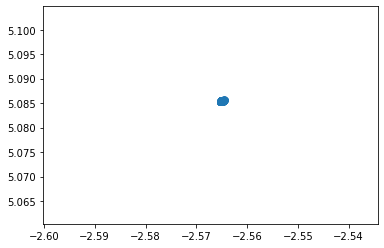

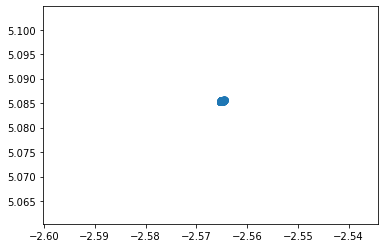

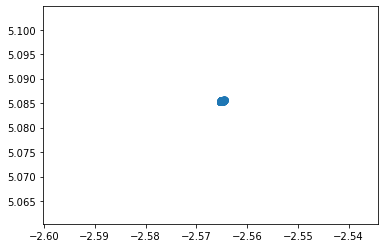

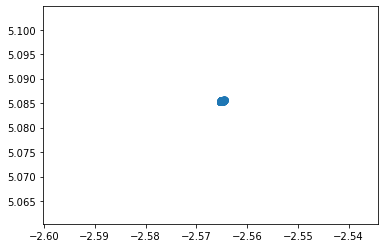

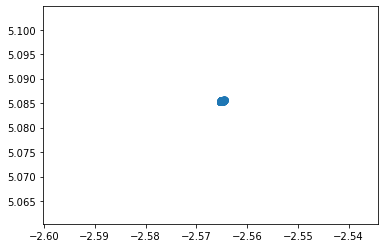

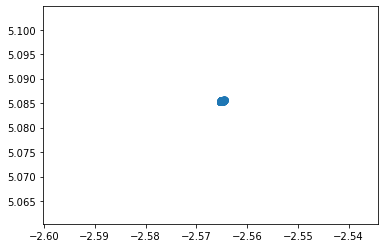

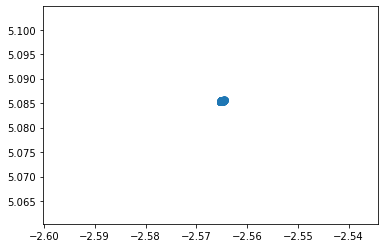

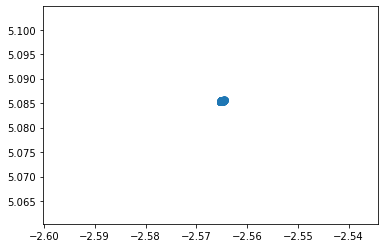

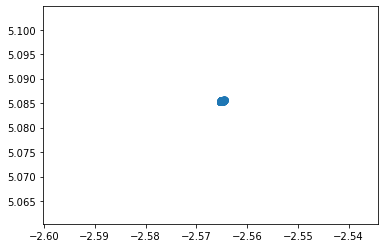

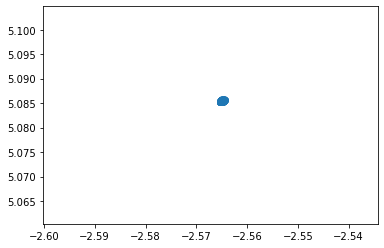

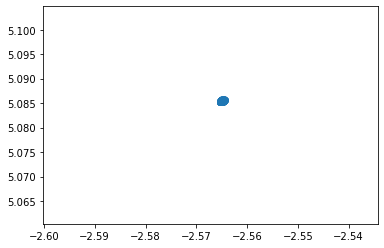

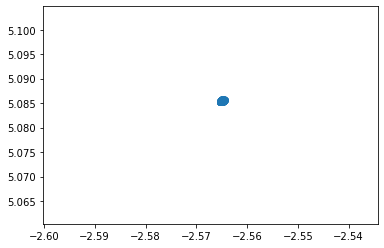

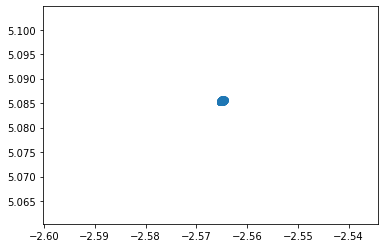

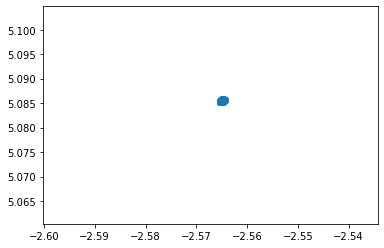

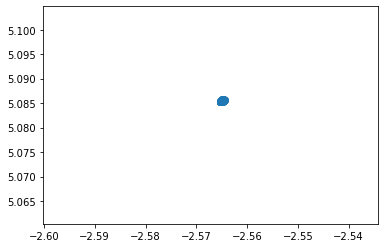

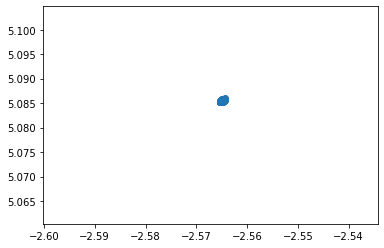

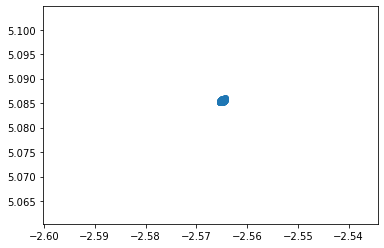

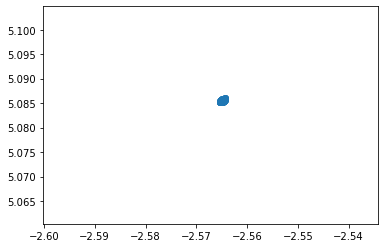

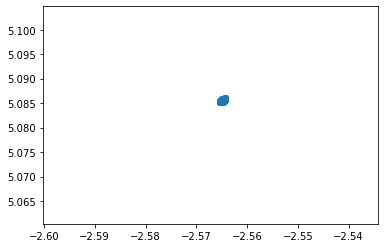

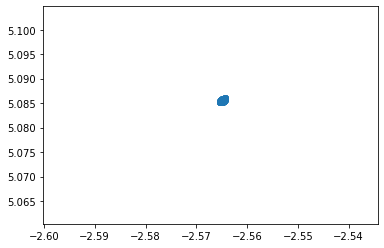

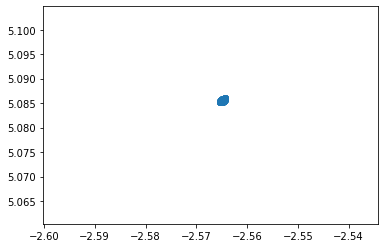

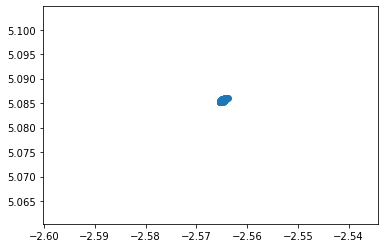

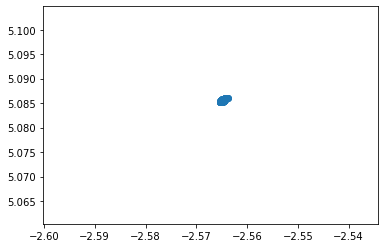

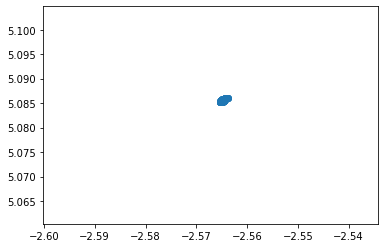

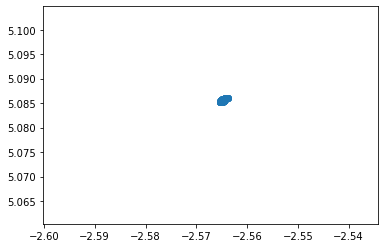

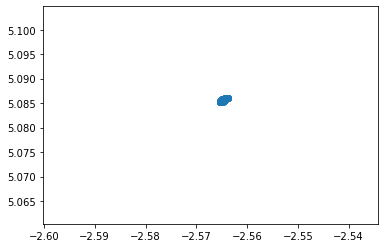

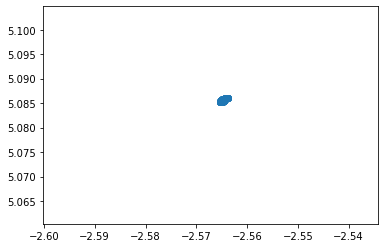

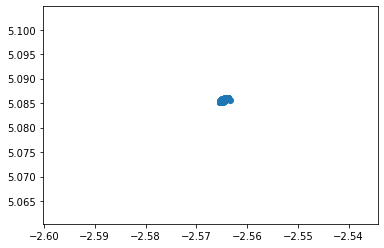

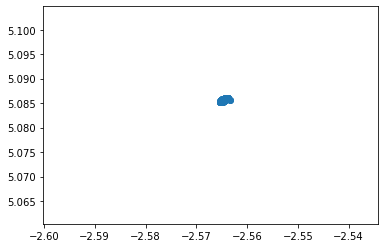

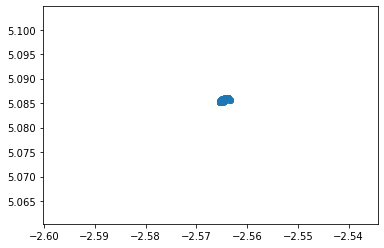

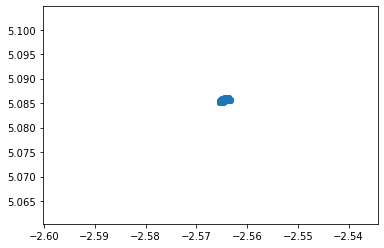

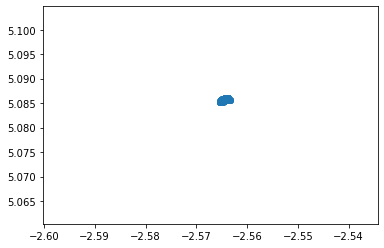

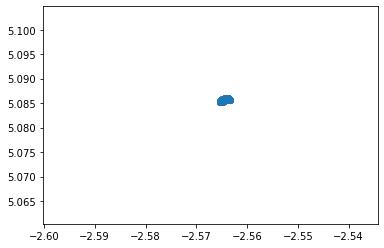

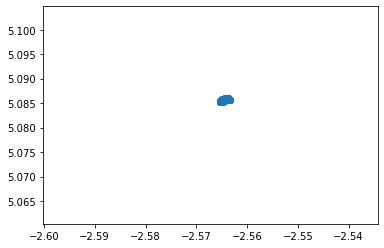

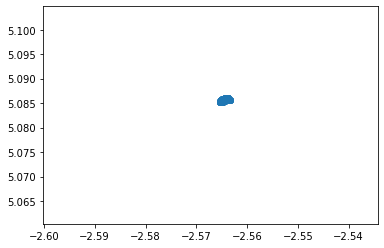

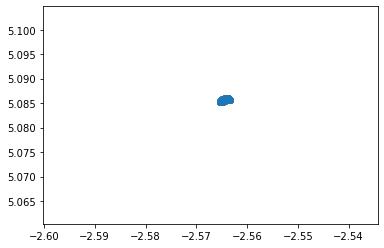

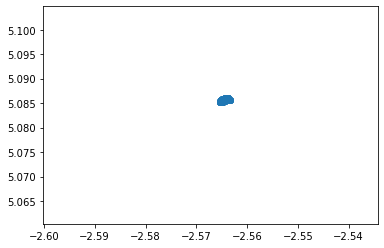

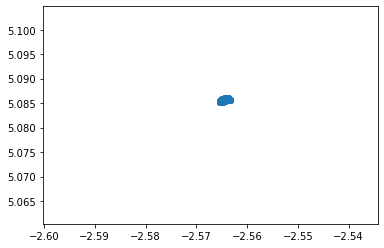

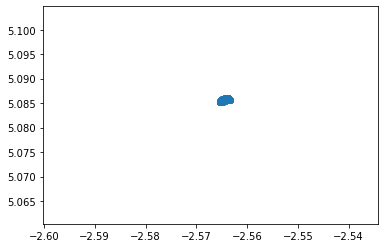

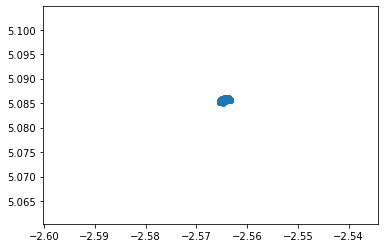

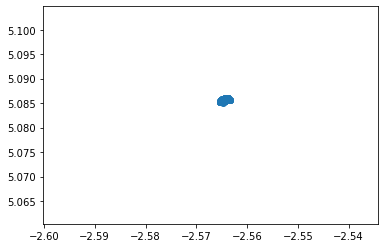

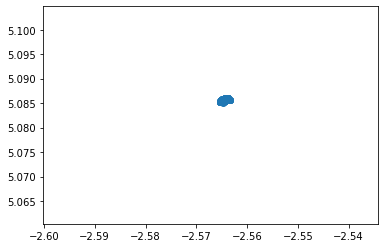

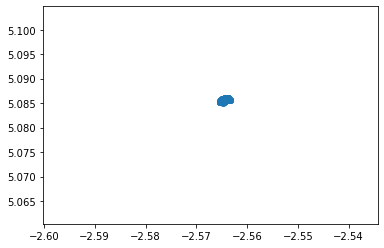

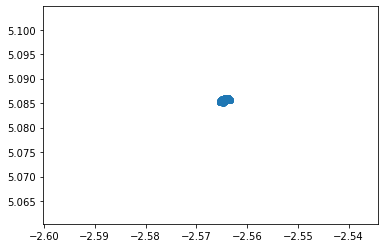

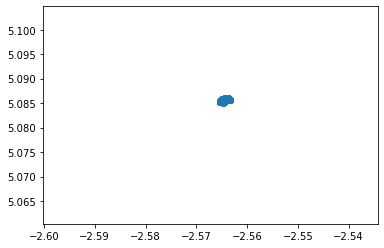

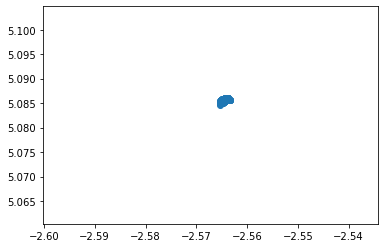

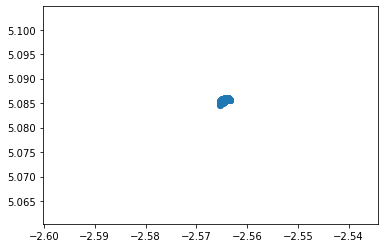

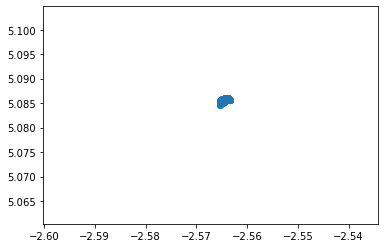

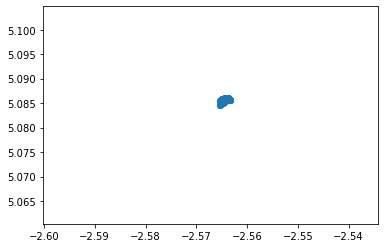

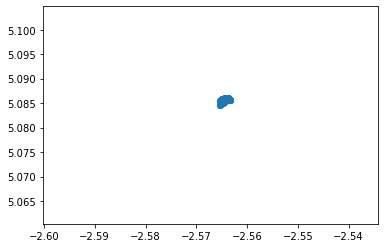

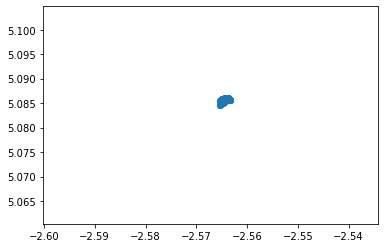

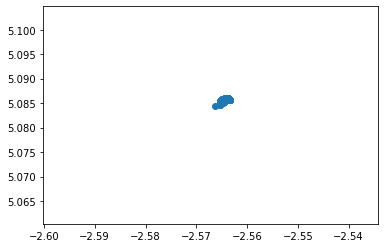

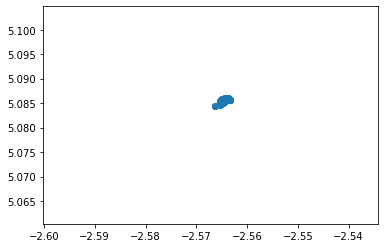

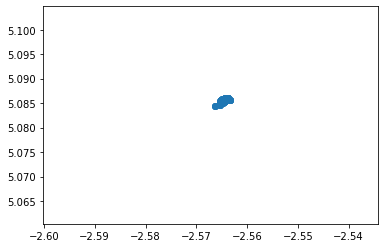

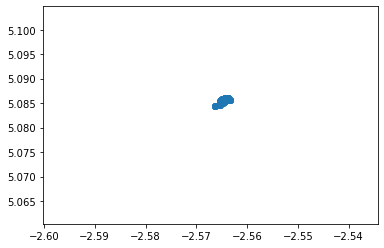

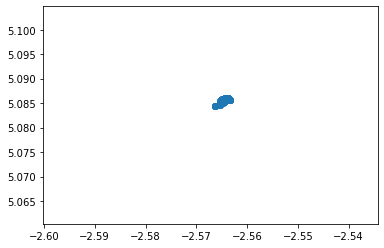

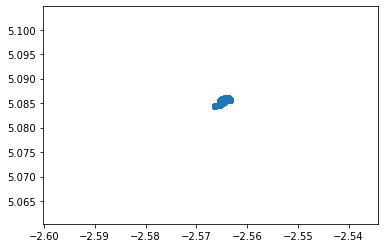

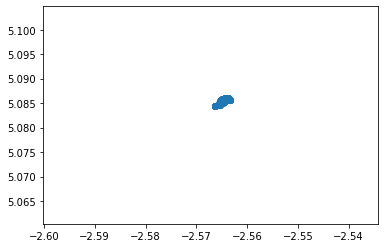

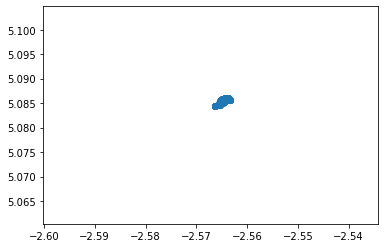

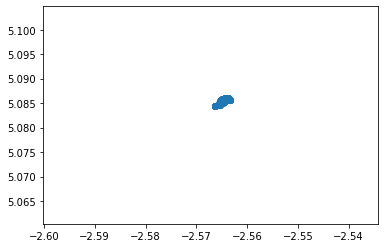

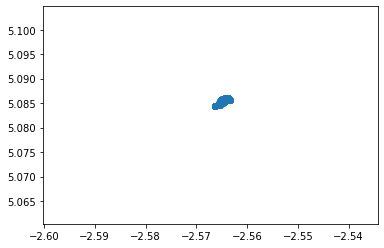

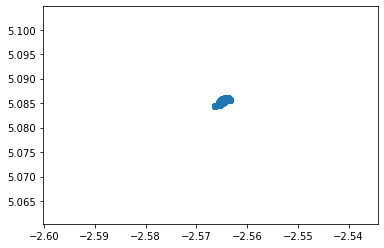

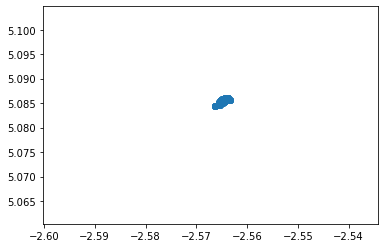

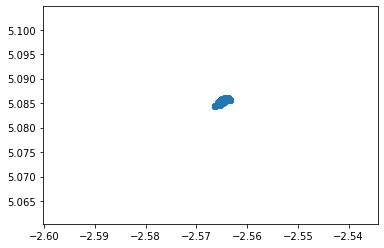

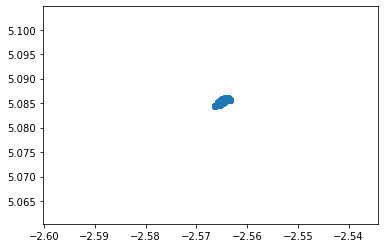

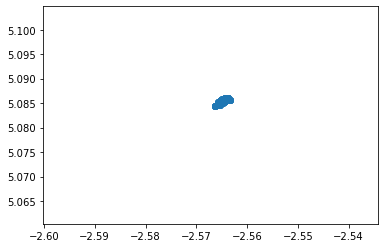

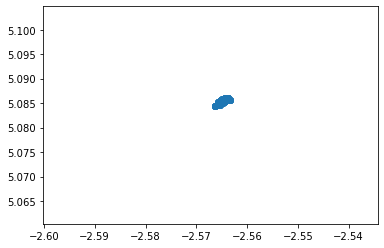

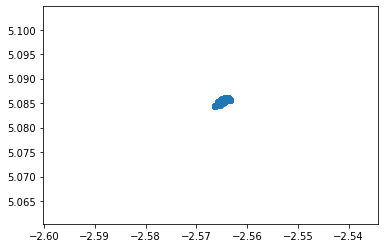

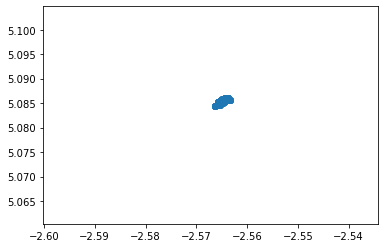

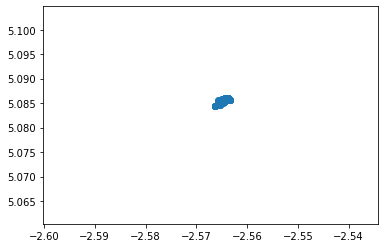

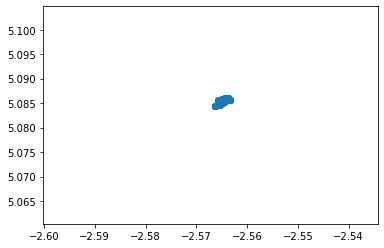

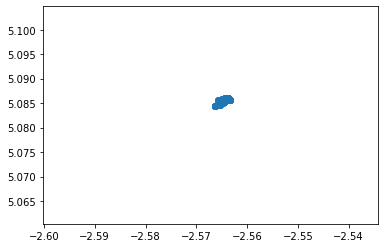

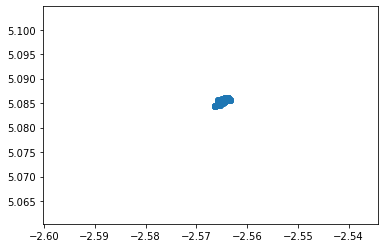

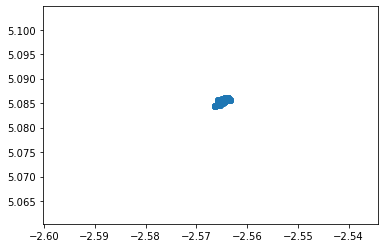

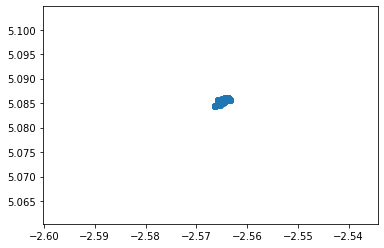

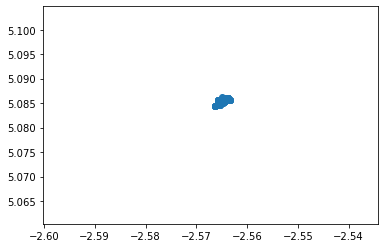

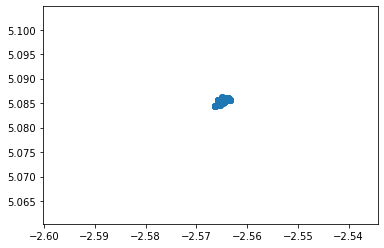

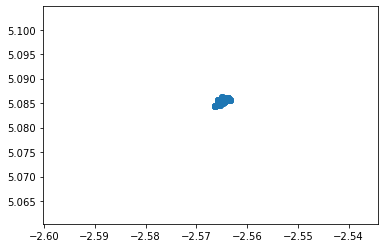

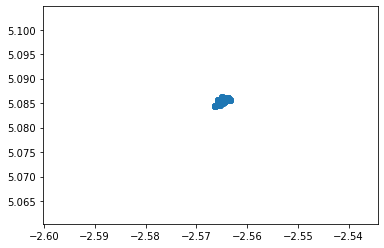

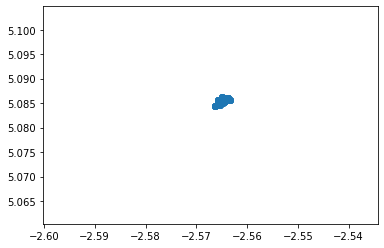

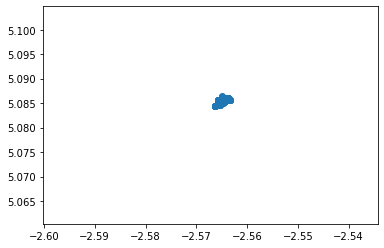

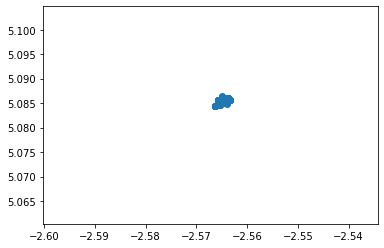

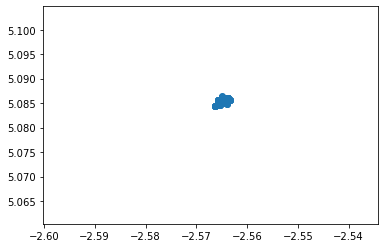

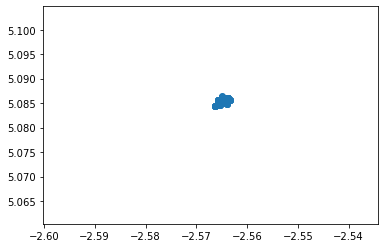

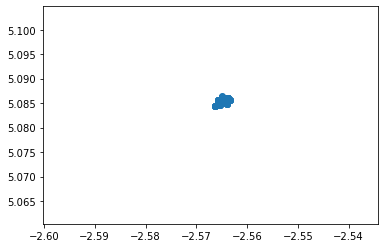

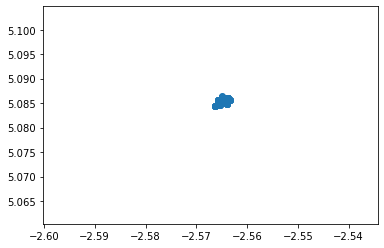

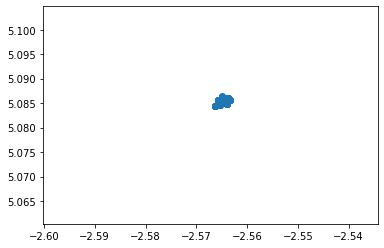

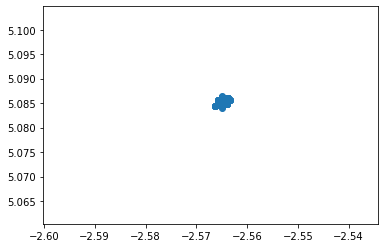

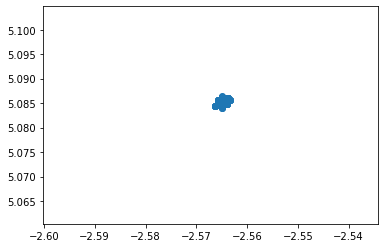

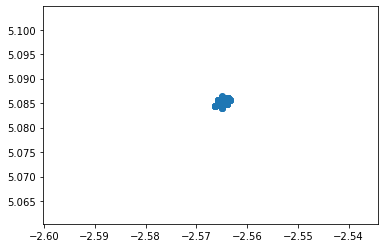

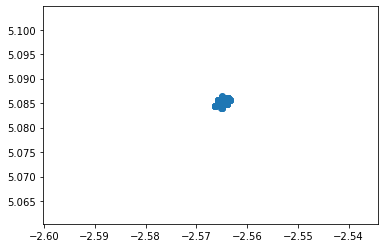

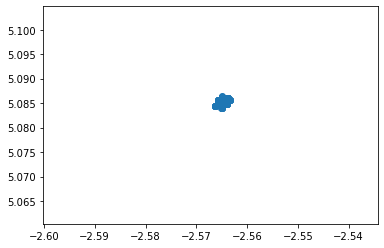

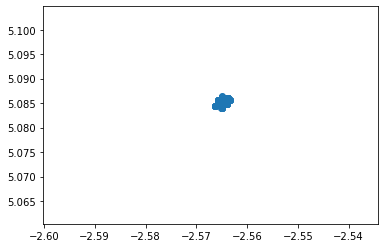

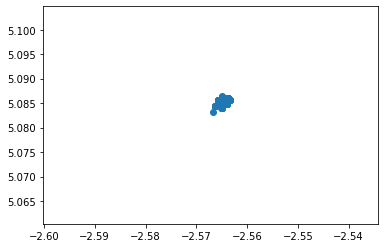

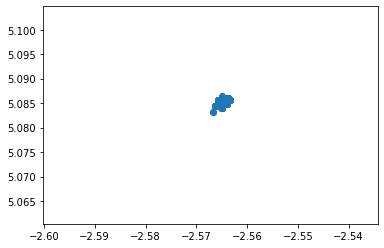

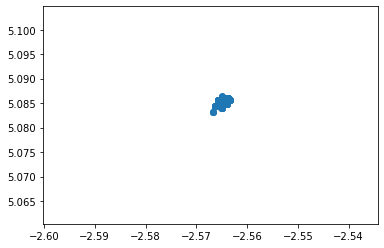

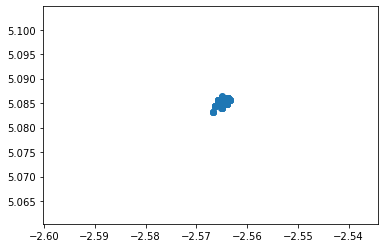

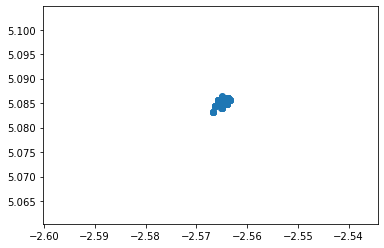

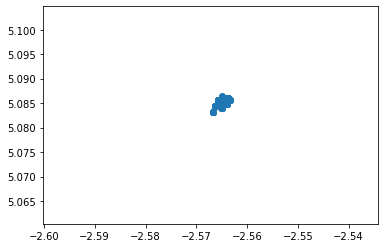

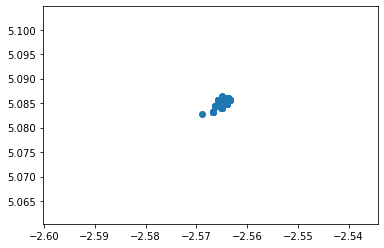

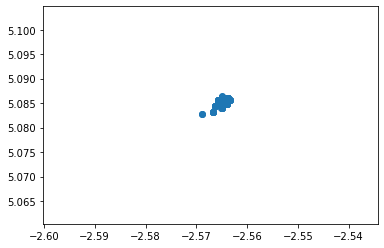

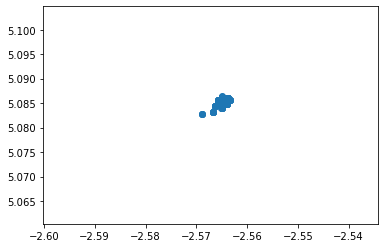

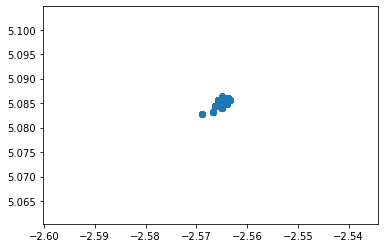

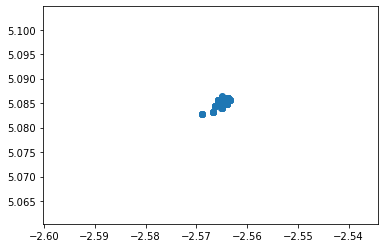

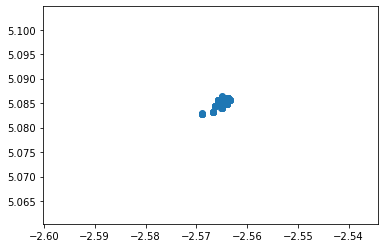

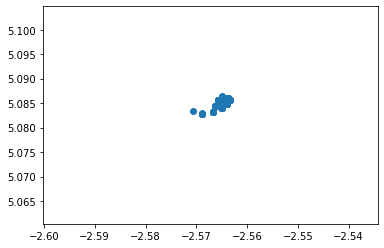

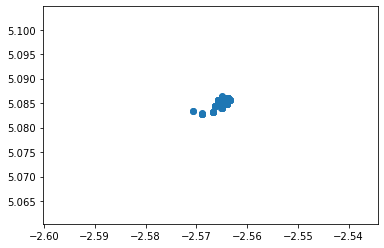

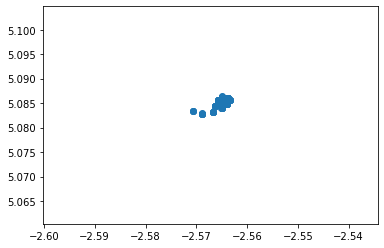

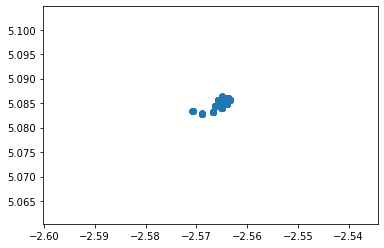

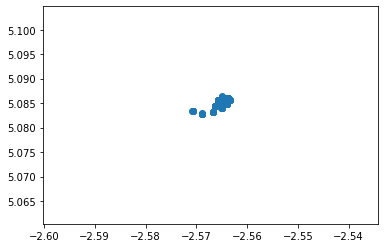

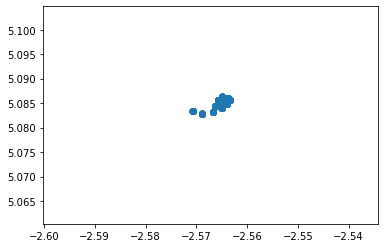

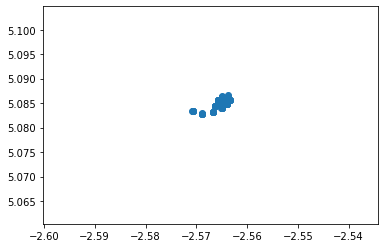

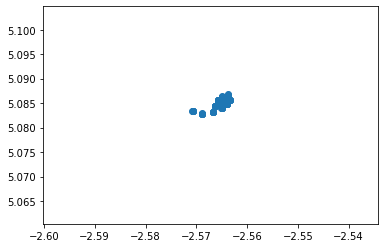

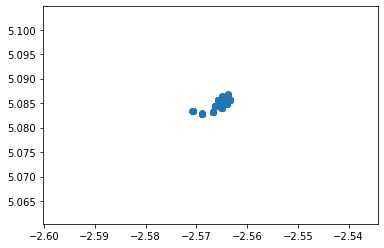

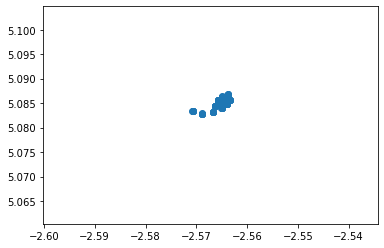

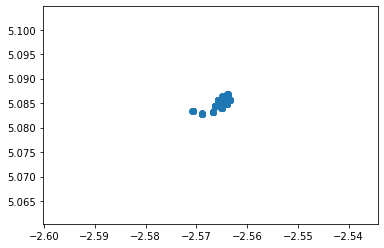

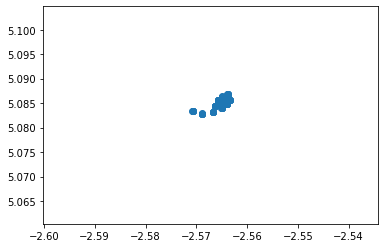

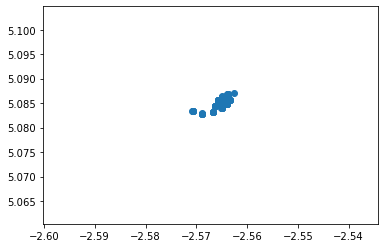

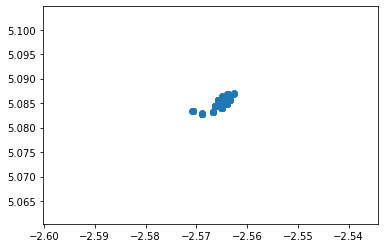

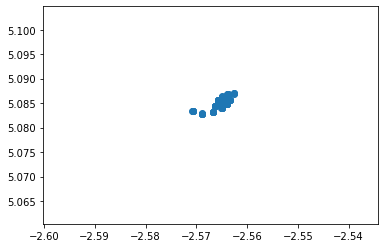

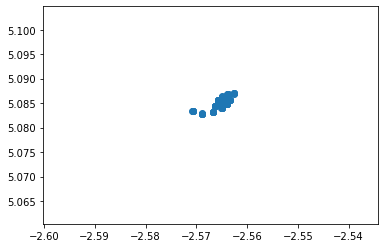

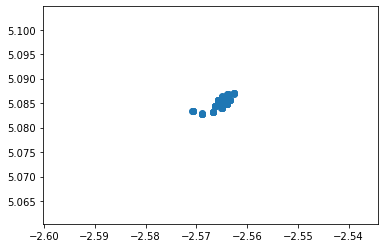

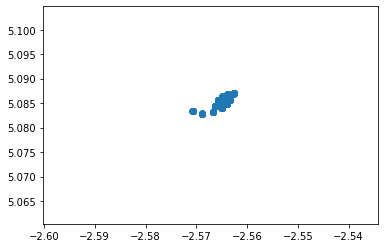

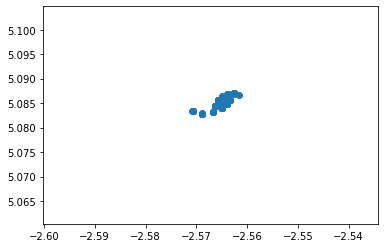

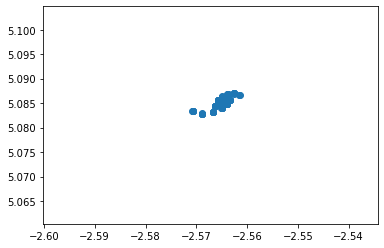

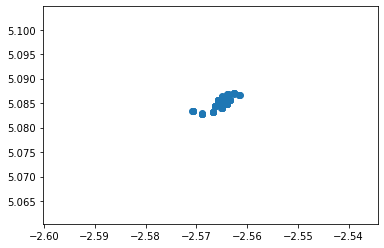

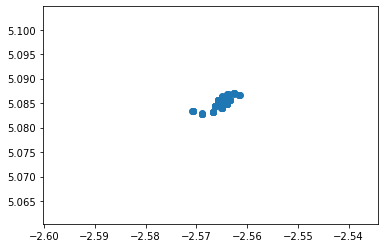

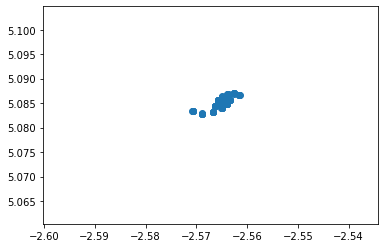

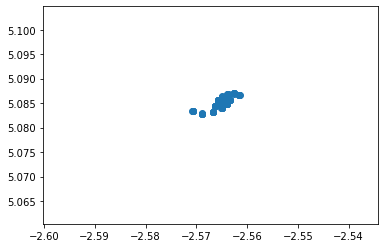

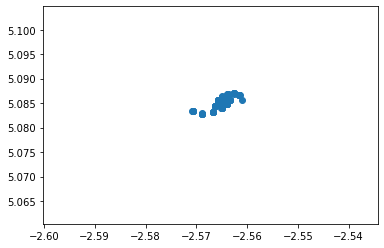

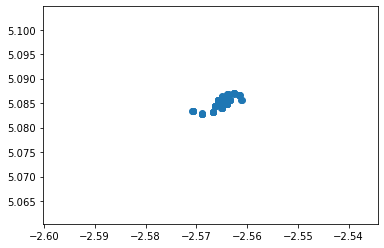

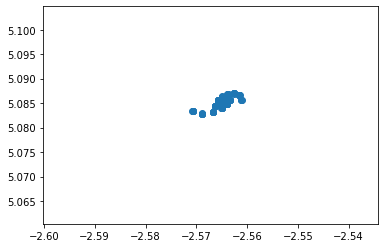

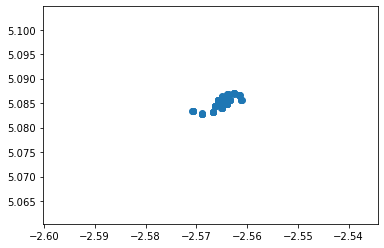

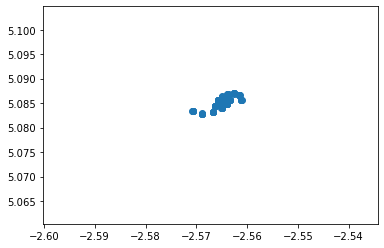

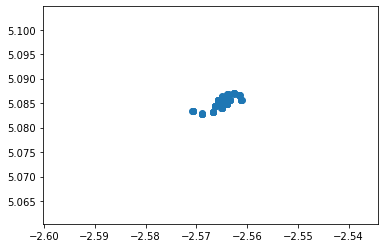

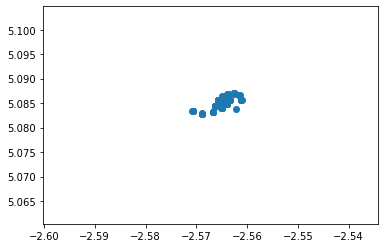

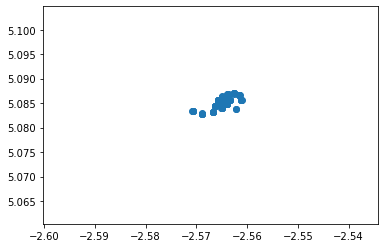

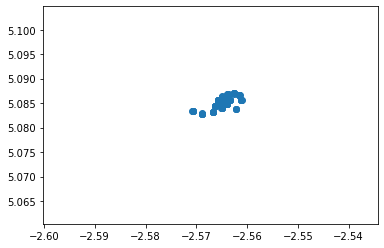

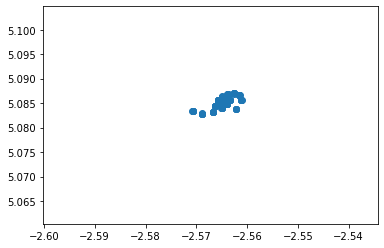

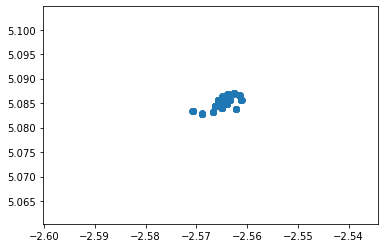

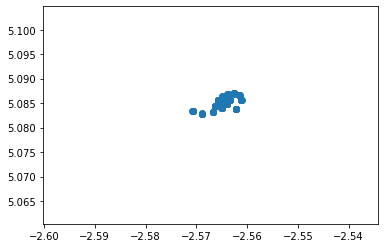

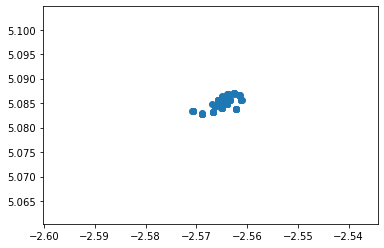

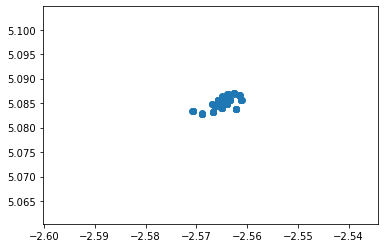

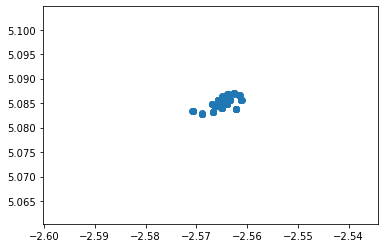

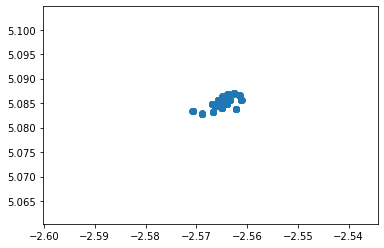

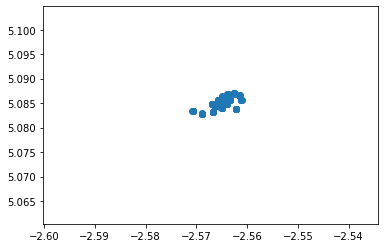

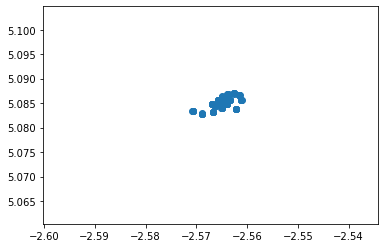

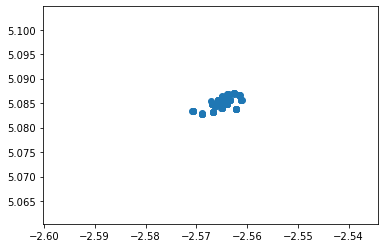

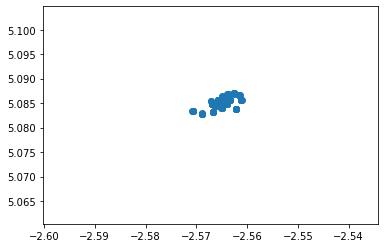

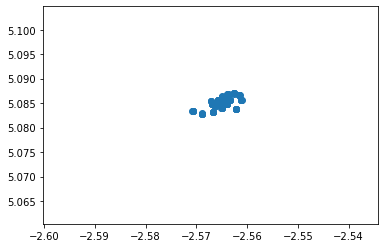

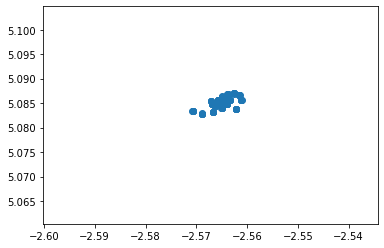

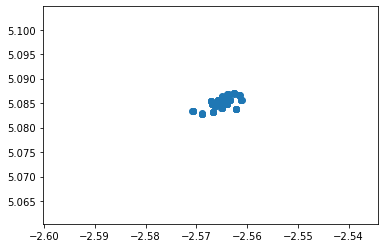

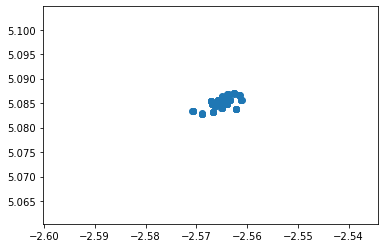

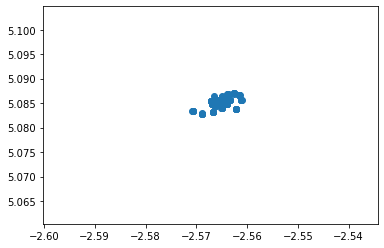

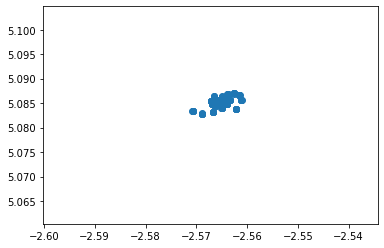

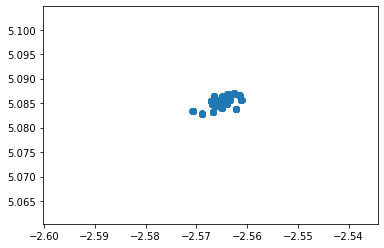

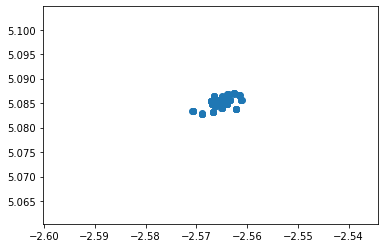

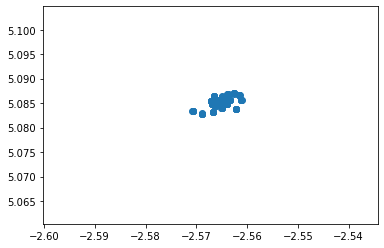

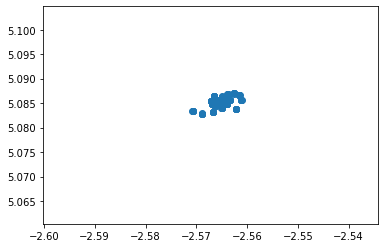

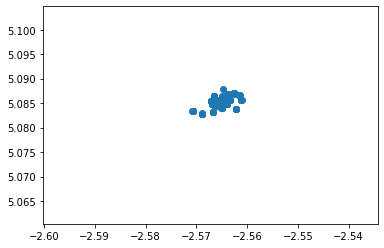

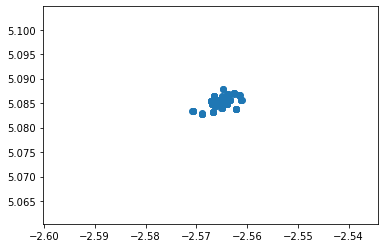

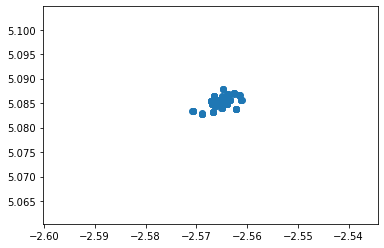

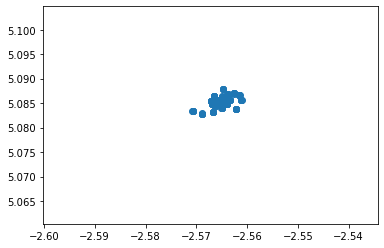

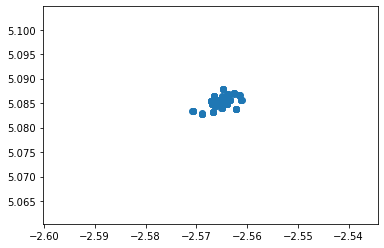

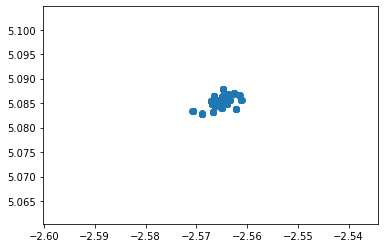

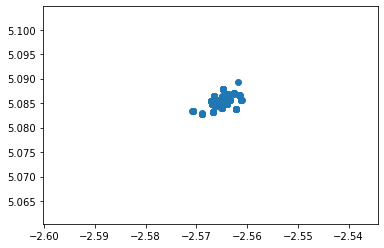

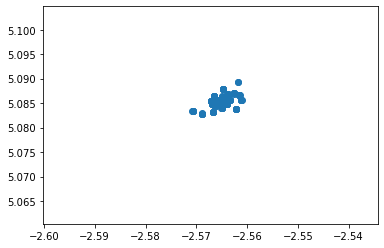

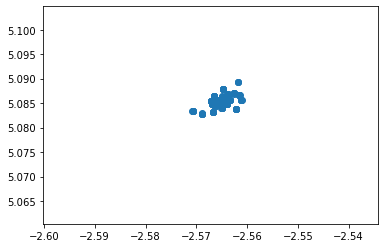

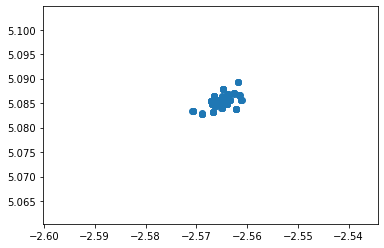

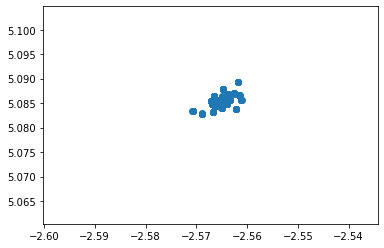

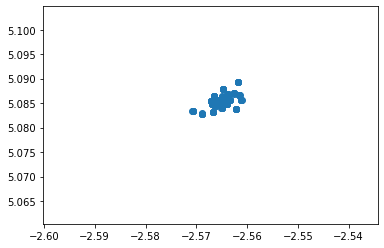

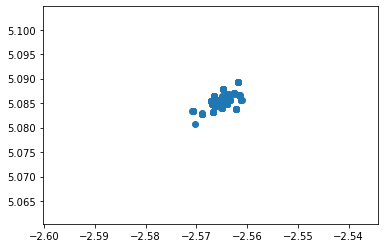

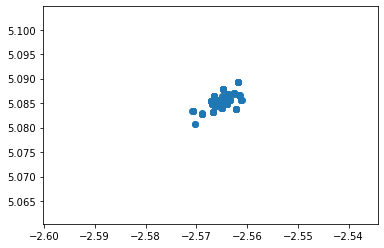

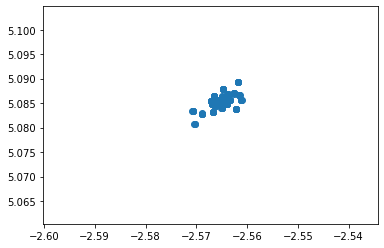

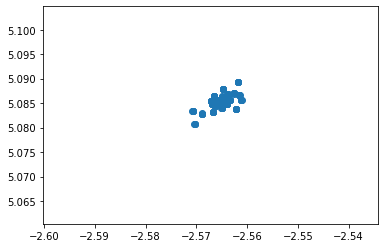

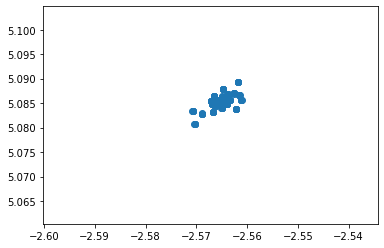

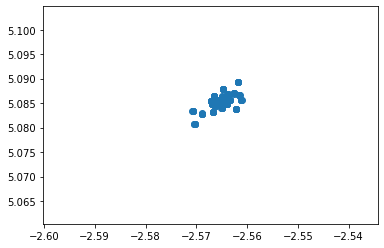

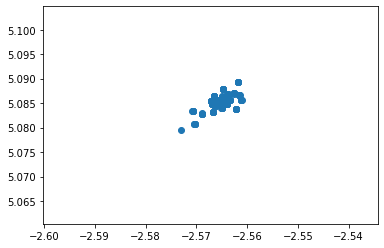

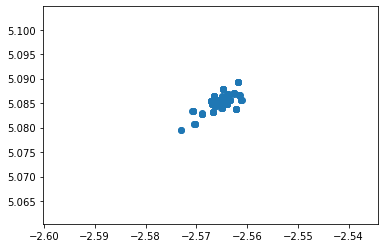

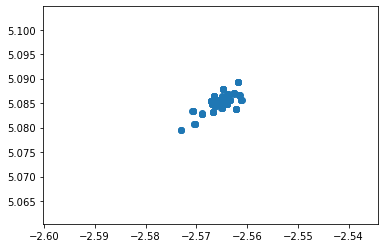

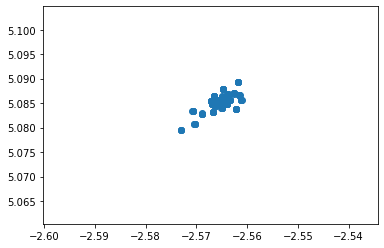

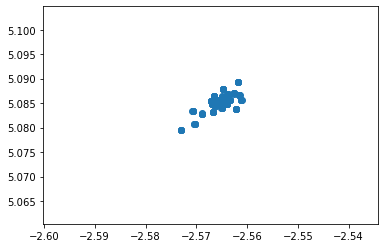

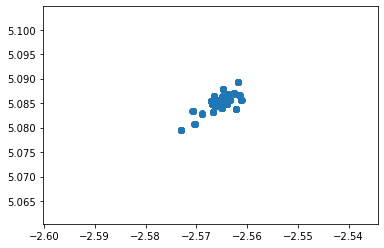

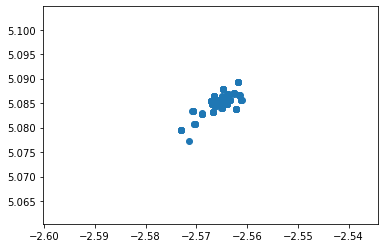

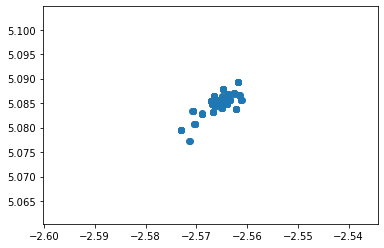

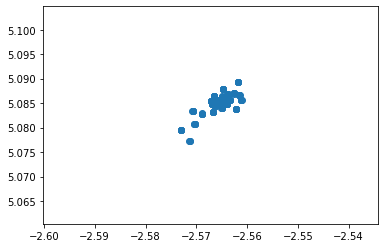

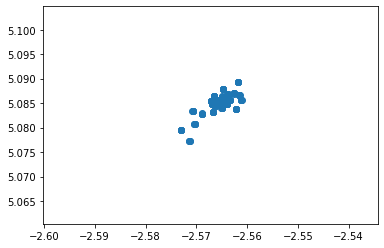

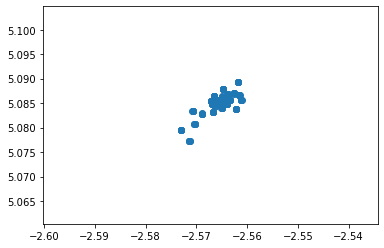

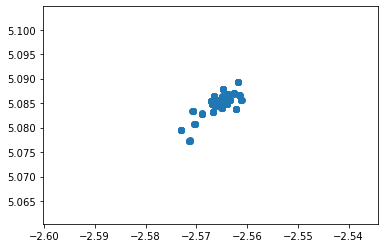

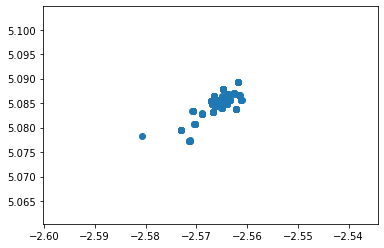

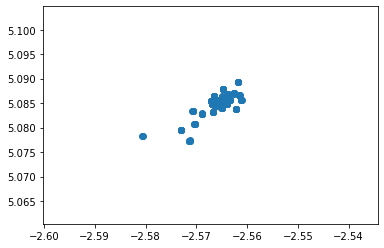

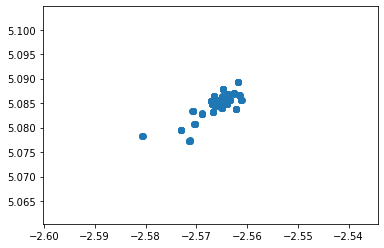

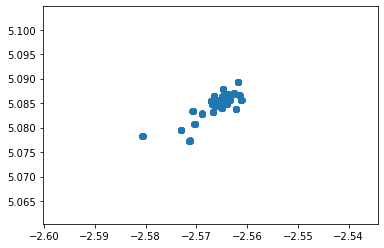

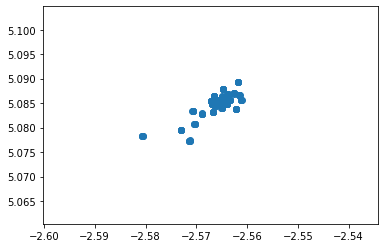

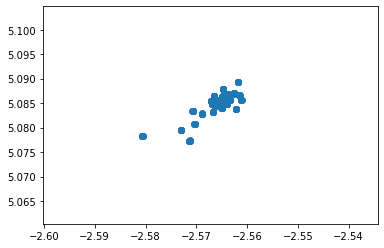

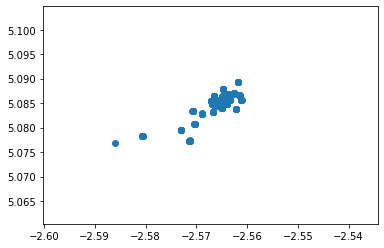

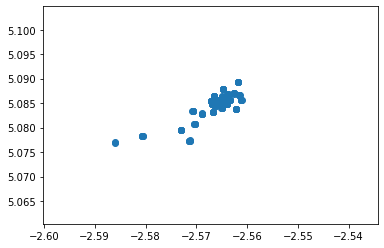

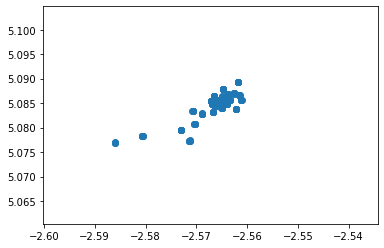

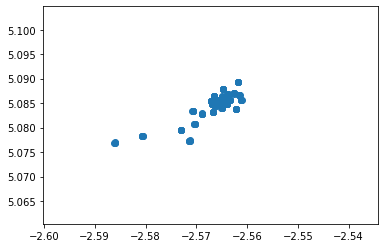

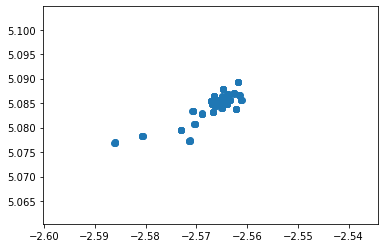

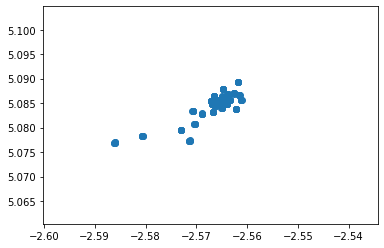

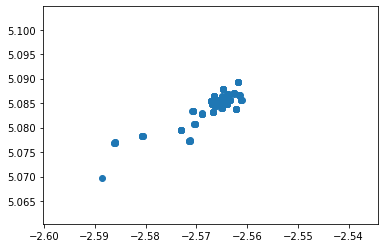

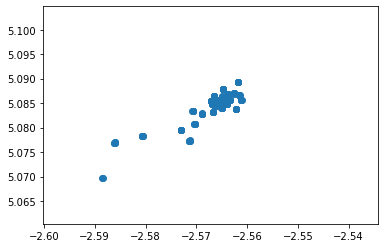

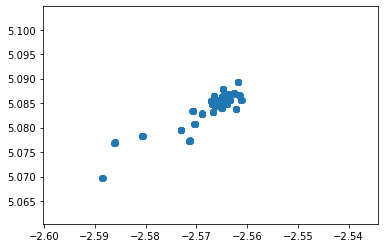

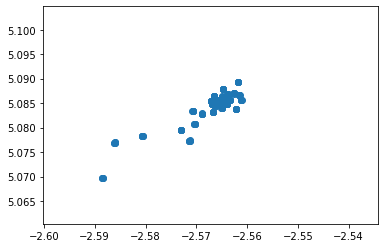

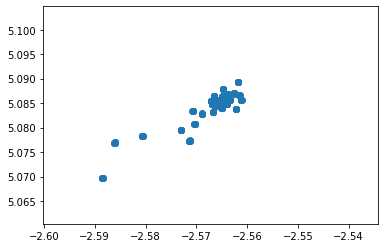

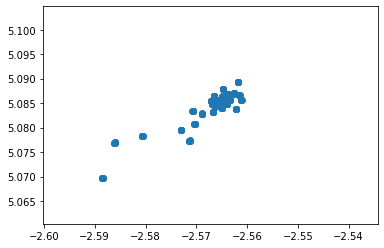

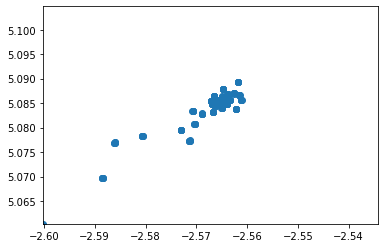

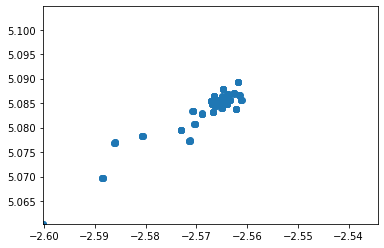

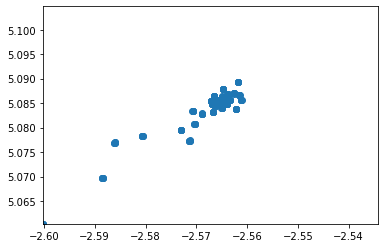

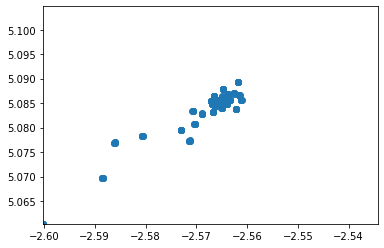

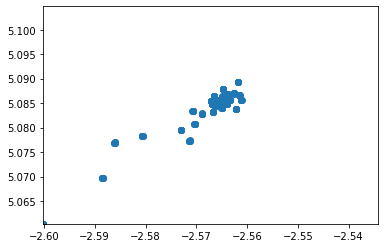

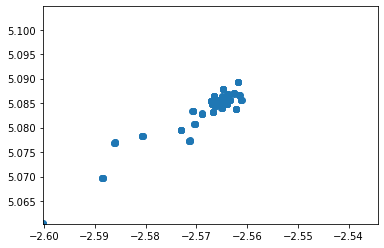

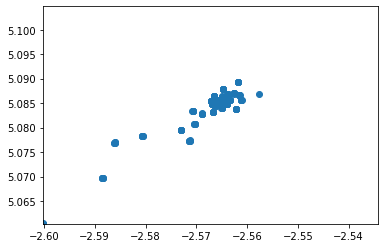

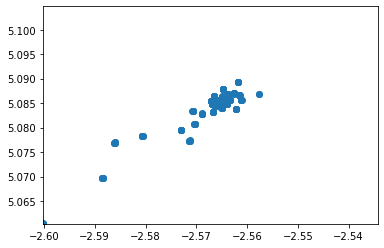

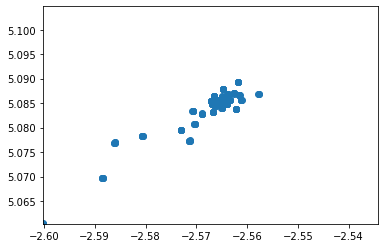

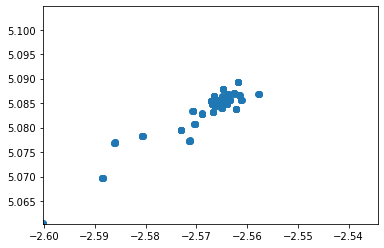

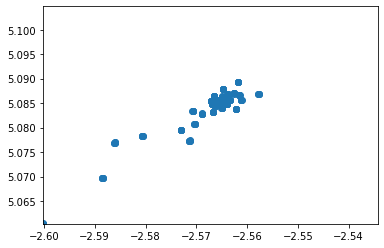

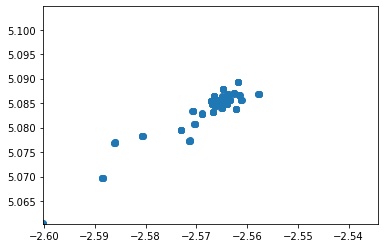

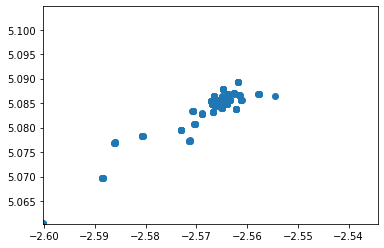

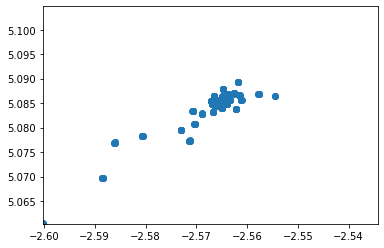

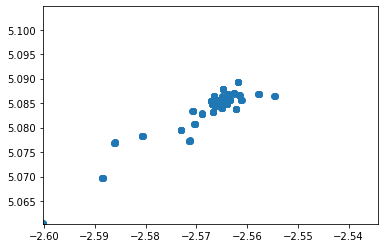

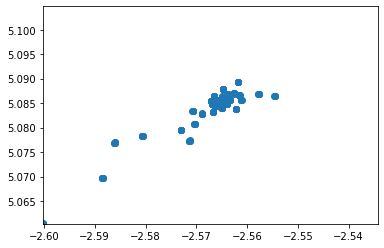

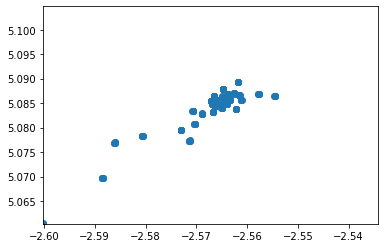

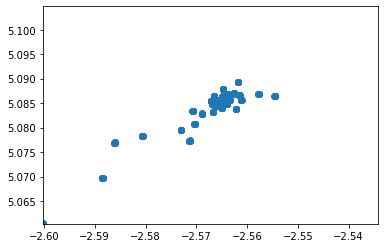

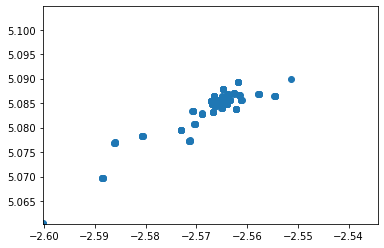

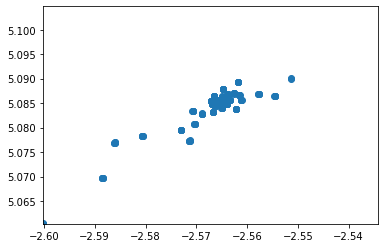

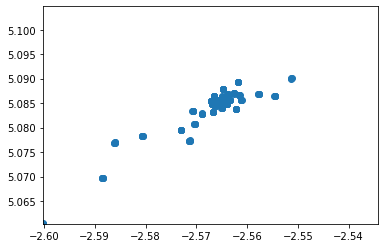

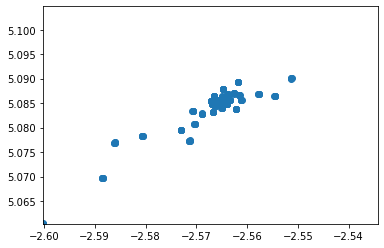

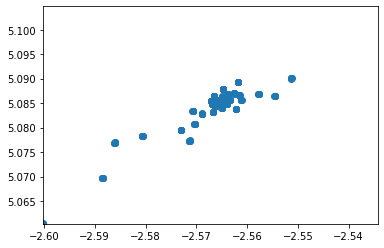

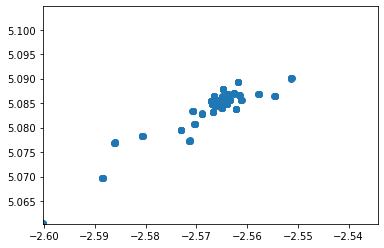

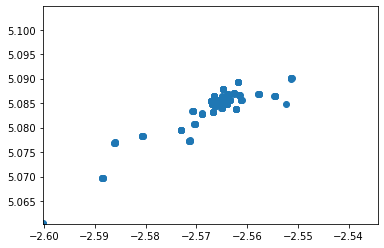

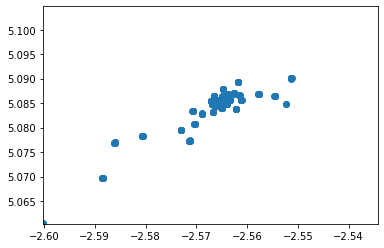

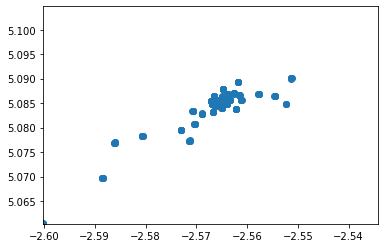

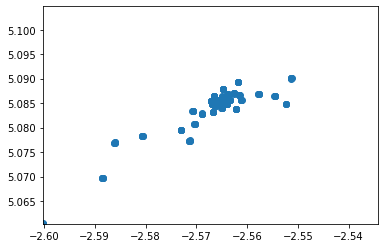

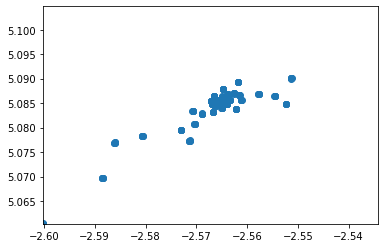

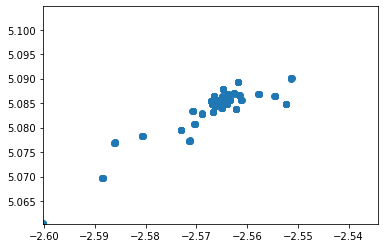

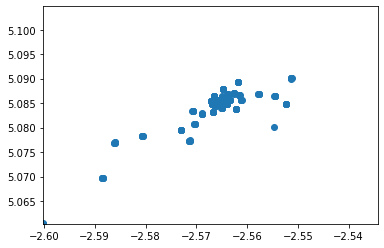

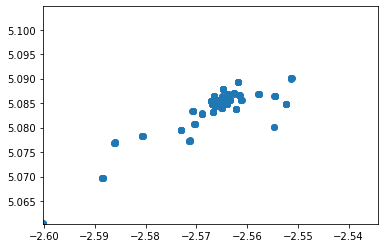

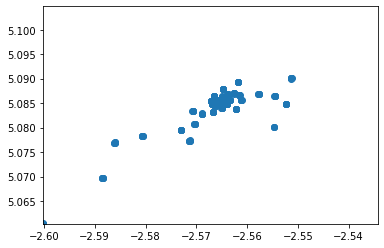

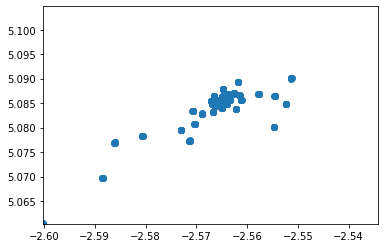

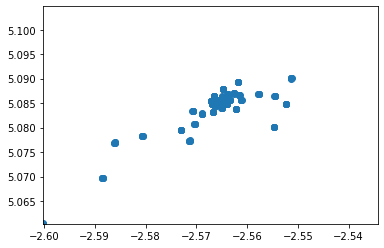

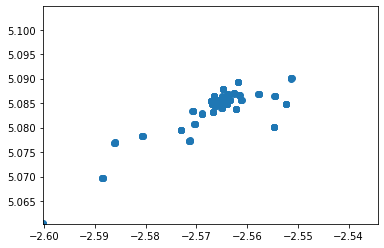

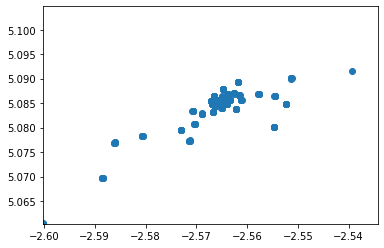

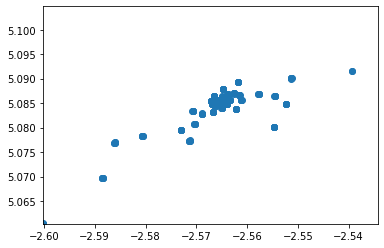

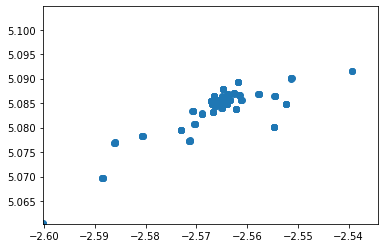

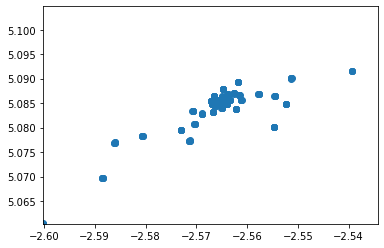

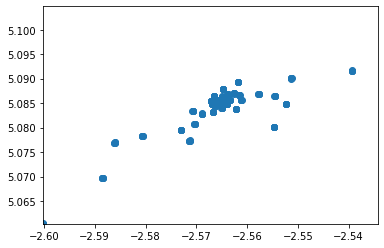

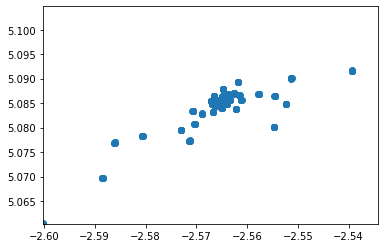

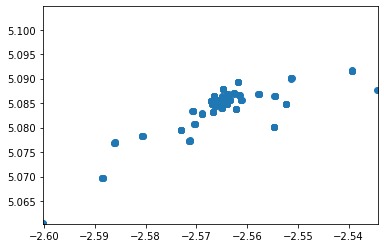

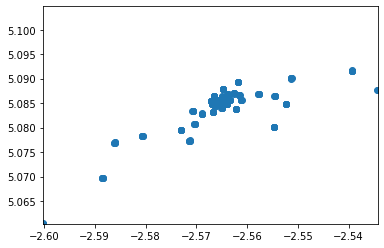

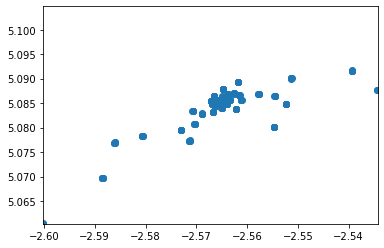

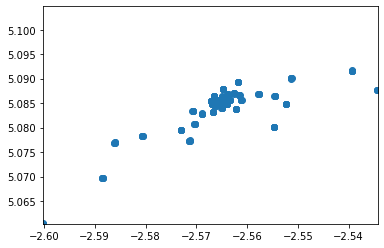

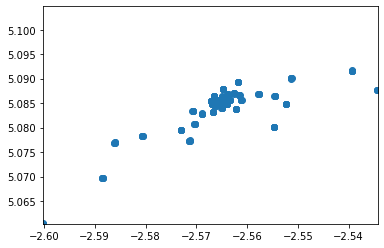

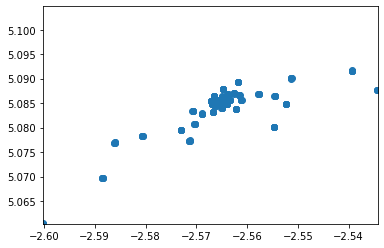

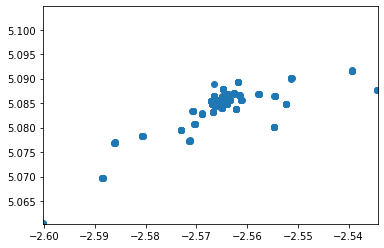

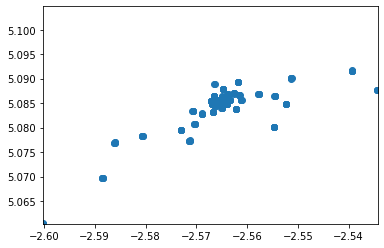

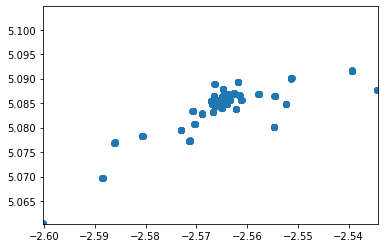

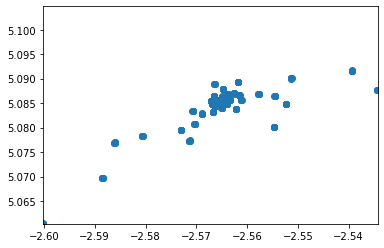

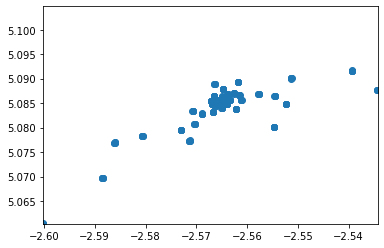

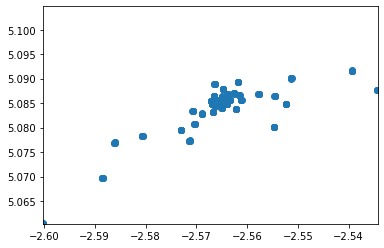

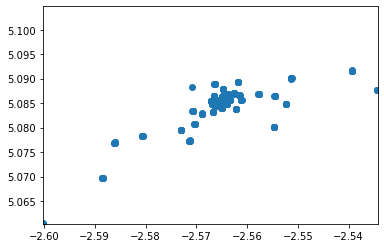

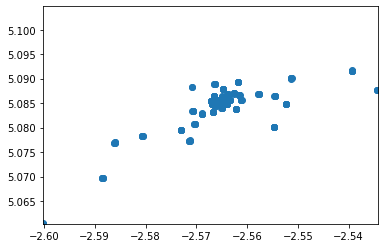

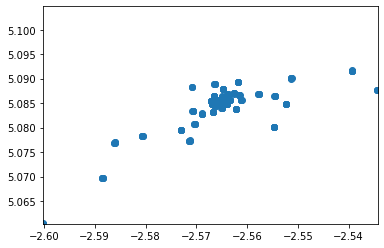

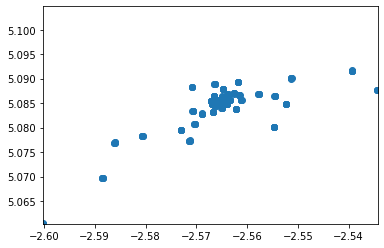

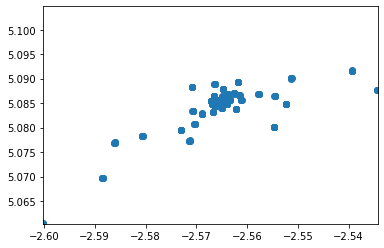

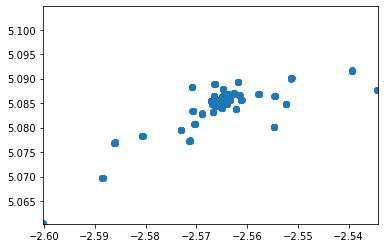

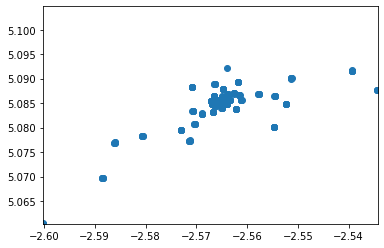

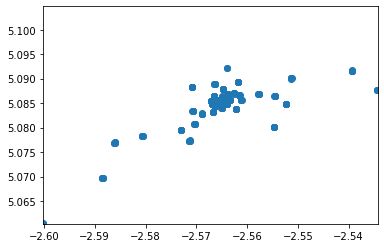

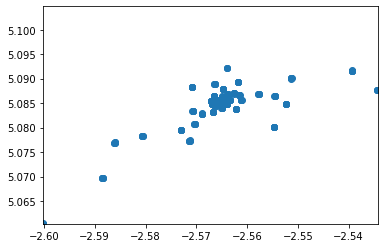

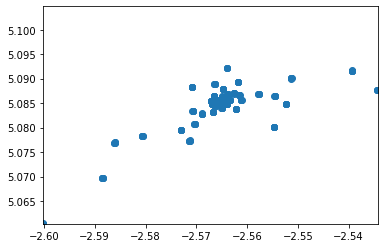

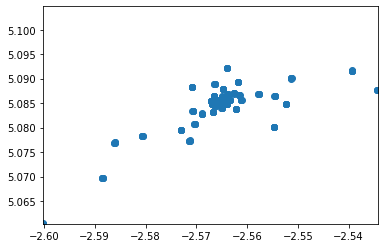

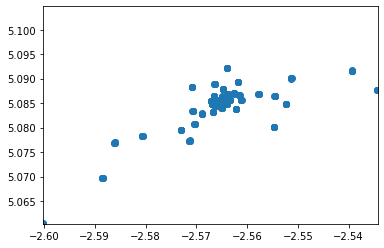

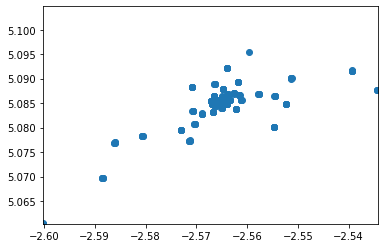

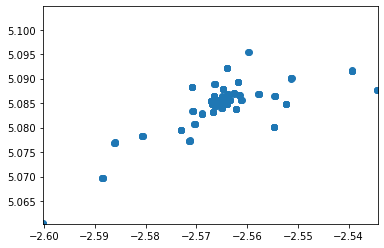

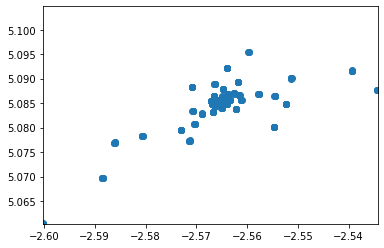

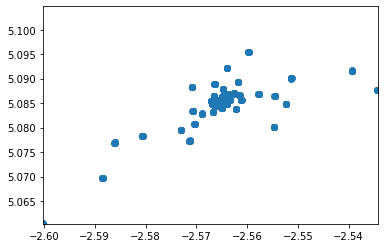

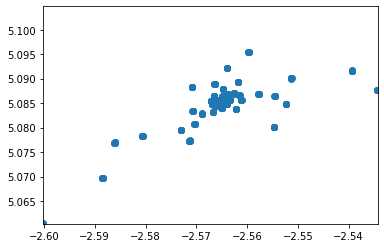

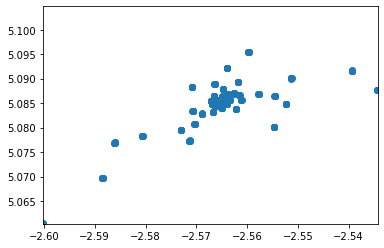

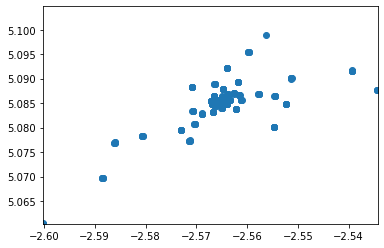

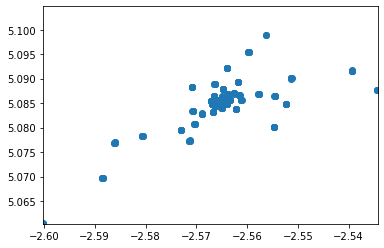

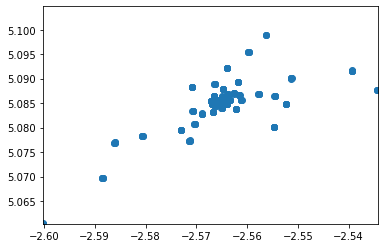

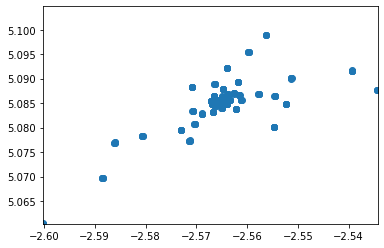

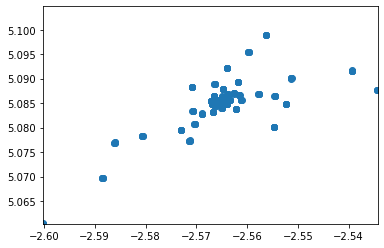

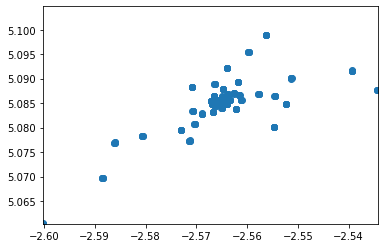

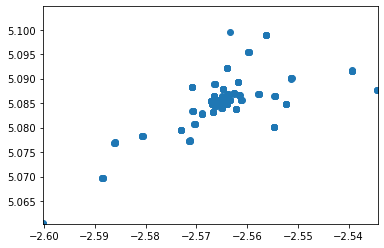

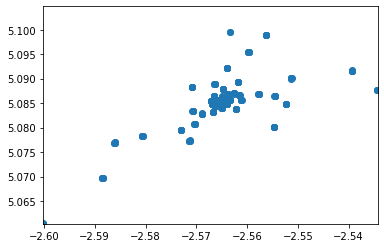

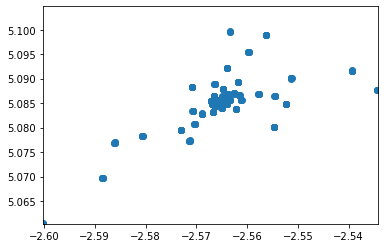

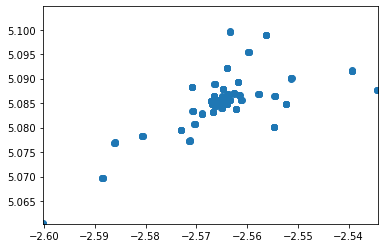

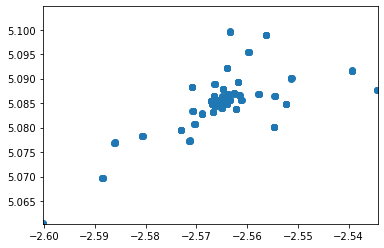

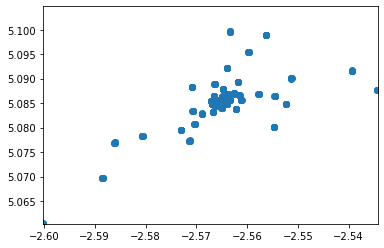

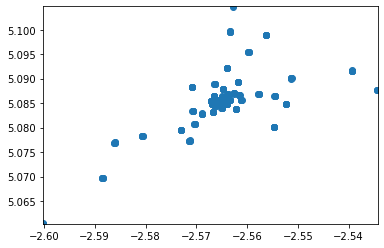

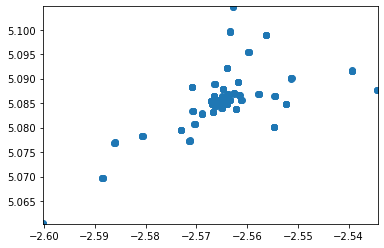

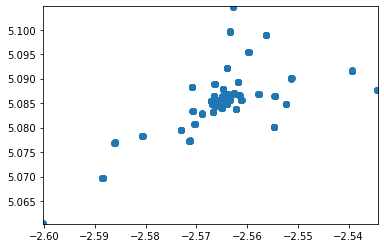

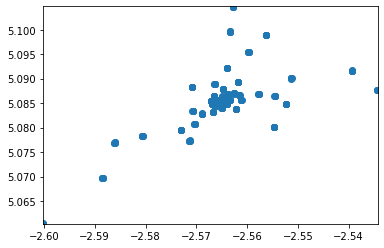

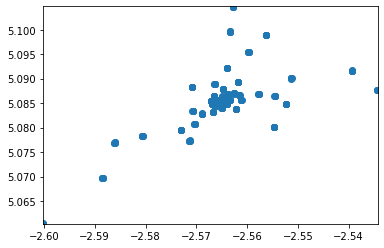

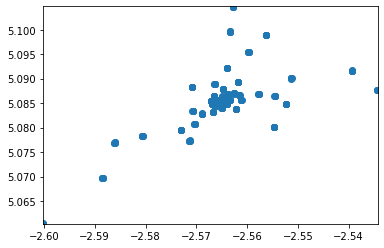

In [15]:
import matplotlib.pyplot as plt
#import random

x_val = []
y_val = []

for i in range(0,512):
    x_val.append(x_coordinates[i])
    y_val.append(y_coordinates[i])

    plt.xlim(min(x_coordinates),max(x_coordinates))
    plt.ylim(min(y_coordinates),max(y_coordinates))
    plt.scatter(x_val, y_val)
    plt.pause(.0001)
plt.show()

In [82]:
freq0 = hdulist[0].header['CRVAL4']
print(freq0)
RA= hdulist[0].header['CRVAL6']
print(RA)
DEC= hdulist[0].header['CRVAL7']
print(DEC)

166200000.0
0.0
0.0


In [8]:
#print(hdulist[1].header)

In [19]:
#print(hdulist[2].header)

In [83]:
#data[0:4]
#data1[0:]
len(data2)#Just to see the data how it's stored
print(data2.shape)
print(data.shape)

(512,)
(56007728,)


In [86]:
dataT = Table(data)
dataT1 = Table(data1)
# dataT2 = Table(data2)
# dataT3 = Table(data3)

In [12]:
#print(dataT['UU'])

In [87]:
print(dataT['DATA'].shape)
#print(dataT1['DATA1'].shape)

(56007728, 1, 1, 1, 5, 1, 3)


In [83]:
#print(dataT['VV'])


In [88]:
dataT

<Table length=56007728>
      UU             VV             WW       ...  INTTIM         DATA        
   float32        float32        float32     ... float32 float32[1,1,1,5,1,3]
-------------- -------------- -------------- ... ------- --------------------
-8.0535693e-07  7.3264675e-07 -3.9071608e-07 ...    10.0    0.08207358 .. 1.0
-2.3878752e-07   3.180973e-07 -1.1560849e-07 ...    10.0    0.07136673 .. 1.0
-8.2581886e-07  1.2429813e-07  -4.020749e-07 ...    10.0 -0.0066147344 .. 1.0
-4.4520917e-07   5.041766e-07 -2.1575676e-07 ...    10.0    0.09083323 .. 1.0
-7.1759735e-07   1.033037e-06  -3.472767e-07 ...    10.0     0.0329022 .. 1.0
 -4.819968e-07  8.6259195e-07 -2.3286742e-07 ...    10.0    0.10198992 .. 1.0
           ...            ...            ... ...     ...                  ...
-1.2413452e-07   2.714373e-07  6.3979066e-08 ...    10.0   0.034413554 .. 1.0
 1.6880372e-07  2.1520513e-08 -8.6426816e-08 ...    10.0    0.08079233 .. 1.0
 -9.646436e-08  1.2219893e-07  4.9585992e-08 ...    10.0   0.055051506 .. 1.0
 4.4130864e-08  1.4480602e-07 -2.2390411e-08 ...    10.0   0.034926567 .. 1.0
-2.6526808e-07 1.00678406e-07   1.360128e-07 ...    10.0   0.010868128 .. 1.0
-1.2467287e-07  1.2328552e-07    6.40364e-08 ...    10.0  -0.004982425 .. 1.0
 1.4059522e-07  2.2607107e-08   -7.19764e-08 ...    10.0   0.044152454 .. 1.0

In [89]:
u=dataT['UU']
v=dataT['VV']

In [90]:
freq0

166200000.0

In [91]:
UU = dataT['UU']*freq0 #for baseline unit   #*3.e8 (for meter unit)
VV = dataT['VV']*freq0   
WW = dataT['WW']*freq0

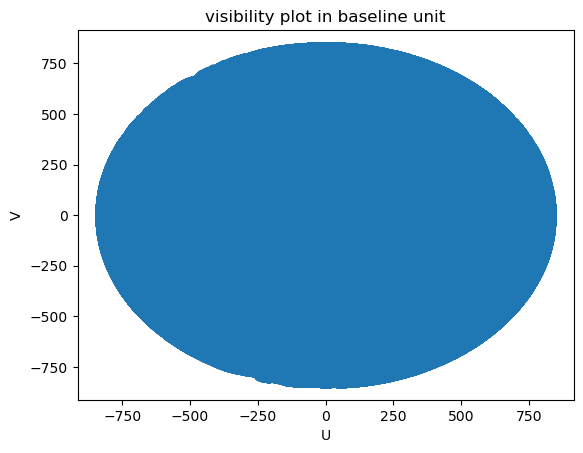

In [92]:

plt.scatter(UU,VV)

plt.xlabel("U")
plt.ylabel("V")
plt.title("visibility plot in baseline unit")
plt.show()

#plt.plot(UU,vis_re,'.',color='blue')
#plt.xlabel("UU", fontsize = 15)
#plt.ylabel("vis_re", fontsize = 15)


In [36]:
print(dataT['DATA'].shape)

(56007728, 1, 1, 1, 5, 1, 3)


[0.08207358, 0.07136673, -0.0066147344]


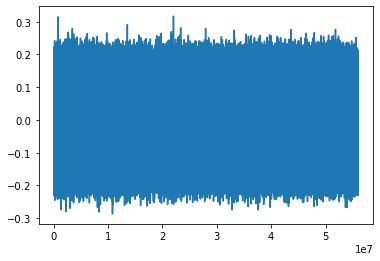

[-0.023621852, -0.07790805, 0.13463876]


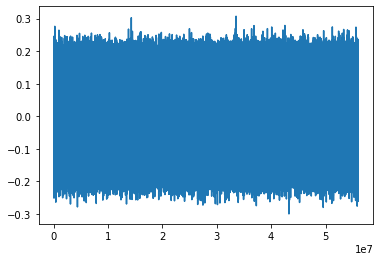

In [37]:
#bl = 100
#pol = 0
#vis_allfreq_XX_re = dataT['DATA'][bl,0,0,0,:,pol,0] #array with 768R & 7C
#vis_allfreq_XX_im = dataT['DATA'][bl,0,0,0,:,pol,1] #array with 768R & 7C
vis_re=[]
for i in range(0,56007727):
    vis_re.append(dataT['DATA'][i,0,0,0,0,0,0])
print(vis_re[0:3])

plt.plot(vis_re)  # Plot the array
plt.show() 

#print(vis_allfreq_XX_im)
vis_im=[]
for i in range(0,56007727):
    vis_im.append(dataT['DATA'][i,0,0,0,0,0,1])
print(vis_im[0:3]) 

plt.plot(vis_im)  # Plot the array
plt.show() 




In [38]:
import math
import numpy as np
baseline=[]
for i in range(0,56007727):
    baseline.append(abs(complex(UU[i],VV[i])))
print(baseline[:2])
len(baseline)


[180.94983386542168, 66.10611424781084]


56007727

In [39]:
len(vis_re)

56007727

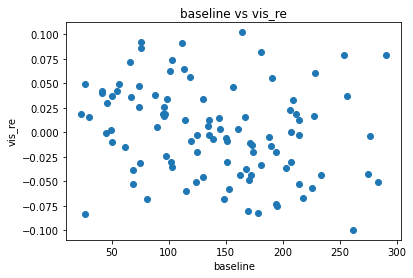

In [40]:
import matplotlib.pyplot as plt



plt.scatter(baseline[:100],vis_re[:100])
plt.xlabel('baseline')
plt.ylabel('vis_re')
plt.title('baseline vs vis_re')
plt.show()


In [ ]:
def calculate_variance(data):
    n = len(data)
    if n == 0:
        raise ValueError("The list is empty. Variance cannot be calculated.")
    
    mean = sum(data) / n
    variance = sum((x - mean) ** 2 for x in data) / n
    return variance


result1 = calculate_variance(vis_re)
print("Variance for real value of visibility:", result1)

result2 = calculate_variance(vis_im)
print("Variance for real value of visibility:", result2)


In [ ]:

err=[]
n=len(vis_re)
m=sum(vis_re)/n
for i in range(len(vis_re)):
    err.append((vis_re[i]-m)**2) 
    



print(err[:3])  

In [ ]:
err1=[]
n=len(vis_im)
m=sum(vis_im)/n
for i in range(len(vis_im)):
    err1.append((vis_im[i]-m)**2) 
    

In [ ]:
plt.hist(err)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()


In [ ]:
plt.hist(err1)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [ ]:
plt.plot(baseline[:100],err[:100])
plt.show()

In [ ]:
plt.scatter(baseline[:50],err[:50])
plt.show()

Text(0.5, 1.0, 'baseline vs vis_im')

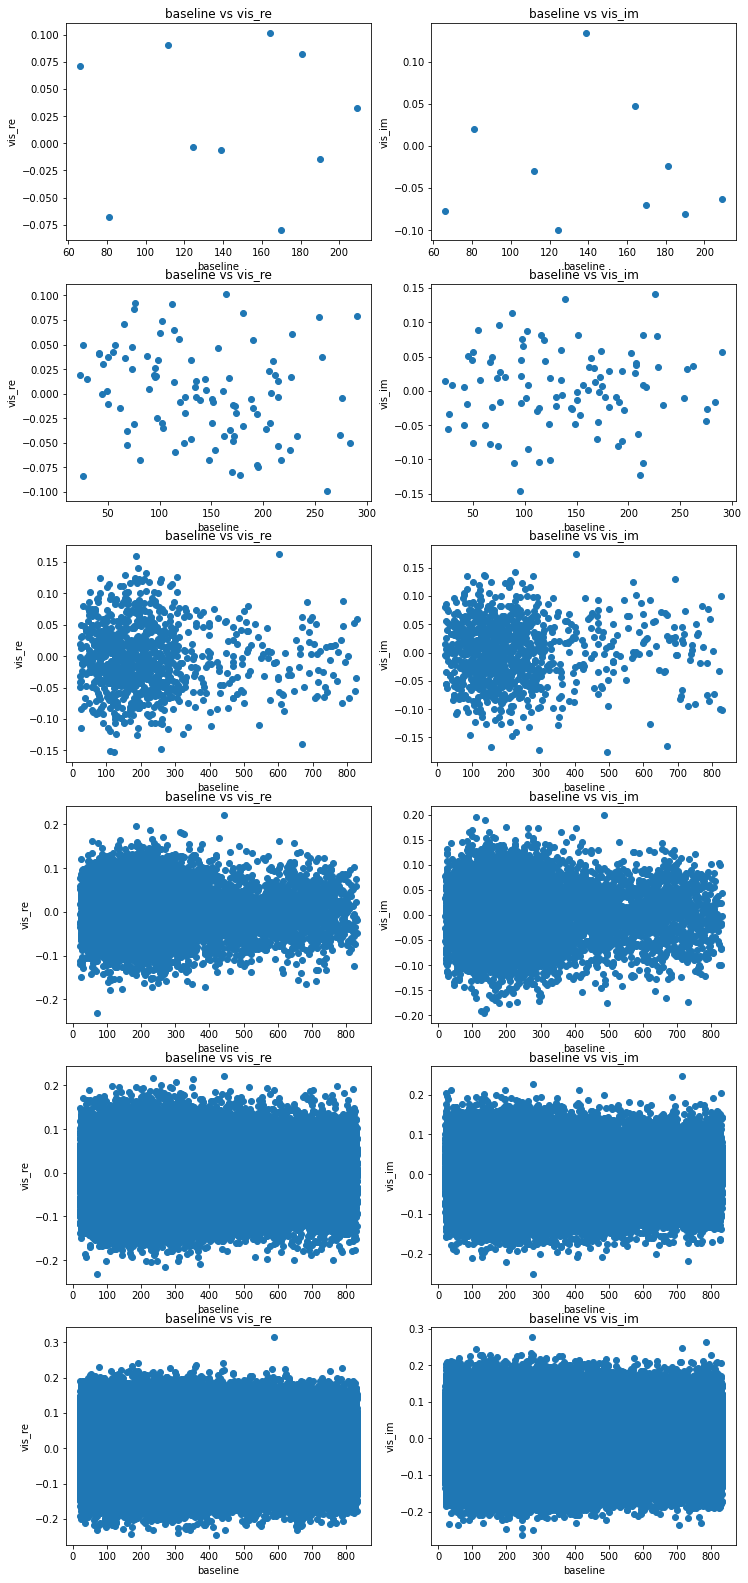

In [64]:
fig, axes = plt.subplots(6,2, figsize=(12,28))

# This is the plot of baseline vs visibility real and baseline vs visibility imaginary

axes[0,0].scatter(baseline[:10],vis_re[:10])
axes[0,0].set_xlabel('baseline')
axes[0,0].set_ylabel('vis_re')
axes[0,0].set_title('baseline vs vis_re')

axes[0,1].scatter(baseline[:10],vis_im[:10])
axes[0,1].set_xlabel('baseline')
axes[0,1].set_ylabel('vis_im')
axes[0,1].set_title('baseline vs vis_im')

axes[1,0].scatter(baseline[:100],vis_re[:100])
axes[1,0].set_xlabel('baseline')
axes[1,0].set_ylabel('vis_re')
axes[1,0].set_title('baseline vs vis_re')

axes[1,1].scatter(baseline[:100],vis_im[:100])
axes[1,1].set_xlabel('baseline')
axes[1,1].set_ylabel('vis_im')
axes[1,1].set_title('baseline vs vis_im')

axes[2,0].scatter(baseline[:1000],vis_re[:1000])
axes[2,0].set_xlabel('baseline')
axes[2,0].set_ylabel('vis_re')
axes[2,0].set_title('baseline vs vis_re')

axes[2,1].scatter(baseline[:1000],vis_im[:1000])
axes[2,1].set_xlabel('baseline')
axes[2,1].set_ylabel('vis_im')
axes[2,1].set_title('baseline vs vis_im')

axes[3,0].scatter(baseline[:10000],vis_re[:10000])
axes[3,0].set_xlabel('baseline')
axes[3,0].set_ylabel('vis_re')
axes[3,0].set_title('baseline vs vis_re')

axes[3,1].scatter(baseline[:10000],vis_im[:10000])
axes[3,1].set_xlabel('baseline')
axes[3,1].set_ylabel('vis_im')
axes[3,1].set_title('baseline vs vis_im')

axes[4,0].scatter(baseline[:100000],vis_re[:100000])
axes[4,0].set_xlabel('baseline')
axes[4,0].set_ylabel('vis_re')
axes[4,0].set_title('baseline vs vis_re')

axes[4,1].scatter(baseline[:100000],vis_im[:100000])
axes[4,1].set_xlabel('baseline')
axes[4,1].set_ylabel('vis_im')
axes[4,1].set_title('baseline vs vis_im')

axes[5,0].scatter(baseline[:1000000],vis_re[:1000000])
axes[5,0].set_xlabel('baseline')
axes[5,0].set_ylabel('vis_re')
axes[5,0].set_title('baseline vs vis_re')

axes[5,1].scatter(baseline[:1000000],vis_im[:1000000])
axes[5,1].set_xlabel('baseline')
axes[5,1].set_ylabel('vis_im')
axes[5,1].set_title('baseline vs vis_im')

In [ ]:

fig, axes = plt.subplots(3,2, figsize=(8,8))

axes[0,0].scatter(vis_re[0:10],vis_im[0:10])  
axes[0,0].set_title('vis_re vs vis_im')



axes[0,1].scatter(vis_re[0:100],vis_im[0:100])  
axes[0,1].set_title('vis_re vs vis_im')

axes[1,0].scatter(vis_re[0:1000],vis_im[0:1000])  
axes[1,0].set_title('vis_re vs vis_im')

axes[1,1].scatter(vis_re[0:10000],vis_im[0:10000])  
axes[1,1].set_title('vis_re vs vis_im')


axes[2,0].scatter(vis_re[0:100000],vis_im[0:100000])  
axes[2,0].set_title('vis_re vs vis_im')

axes[2,1].scatter(vis_re[0:1000000],vis_im[0:1000000])  
axes[2,1].set_title('vis_re vs vis_im')

plt.tight_layout()
plt.show()  # Display the plot



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data =np.array(absolval_vis)

# Create histogram
hist, bins = np.histogram(data, bins='auto', density=True)

# Fit a distribution to the histogram
params = norm.fit(data)
fitted_distribution = norm(*params)

# Generate points on the fitted distribution
x = np.linspace(data.min(), data.max(), 100)
y = fitted_distribution.pdf(x)

# Plot the histogram and the fitted distribution
plt.hist(data, bins='auto', density=True, label='Data')
plt.plot(x, y, label='Fitted Distribution')
plt.xlabel('Value')
plt.ylabel('frequency')
plt.legend()
plt.title('absolute val of visibility')
plt.show()

# Sample data
data =np.array(vis_re)

# Create histogram
hist, bins = np.histogram(data, bins='auto', density=True)

# Fit a distribution to the histogram
params = norm.fit(data)
fitted_distribution = norm(*params)

# Generate points on the fitted distribution
x = np.linspace(data.min(), data.max(), 100)
y = fitted_distribution.pdf(x)

# Plot the histogram and the fitted distribution
plt.hist(data, bins='auto', density=True, label='Data')
plt.plot(x, y, label='Fitted Distribution')
plt.xlabel('Value')
plt.ylabel('frequency')
plt.legend()
plt.title('real val of visibility')
plt.show()


data =np.array(vis_im)

# Create histogram
hist, bins = np.histogram(data, bins='auto', density=True)

# Fit a distribution to the histogram
params = norm.fit(data)
fitted_distribution = norm(*params)

# Generate points on the fitted distribution
x = np.linspace(data.min(), data.max(), 100)
y = fitted_distribution.pdf(x)

# Plot the histogram and the fitted distribution
plt.hist(data, bins='auto', density=True, label='Data')
plt.plot(x, y, label='Fitted Distribution')
plt.xlabel('Value')
plt.ylabel('frequency')
plt.title('imaginary val of visibility')
plt.legend()
plt.show()


In [ ]:
#idx = np.arange(nfreq)
#freqs = (idx - pix) * delta + mfreq
absolval_vis=[]
for p in range(0,56007727):
    z=abs(complex(vis_re[p],vis_im[p]))
    absolval_vis.append(z)
print(absolval_vis[:3])
plt.plot(absolval_vis)  # Plot the array
plt.show() 
    
    
'''import numpy as np
from scipy.stats import poisson
from scipy.optimize import curve_fit

# Generate some sample data
data = np.array(absolval_vis)

# Define the Poisson distribution function
def poisson_func(k, lamb):
    return poisson.pmf(k, lamb)

# Fit the data to the Poisson distribution
params, _ = curve_fit(poisson_func, np.arange(len(data)), data)

# Extract the lambda parameter from the fit
lambda_param = params[0]

print("Lambda parameter:", lambda_param)'''
    

In [ ]:
len(absolval_vis)

In [ ]:
len(baseline)

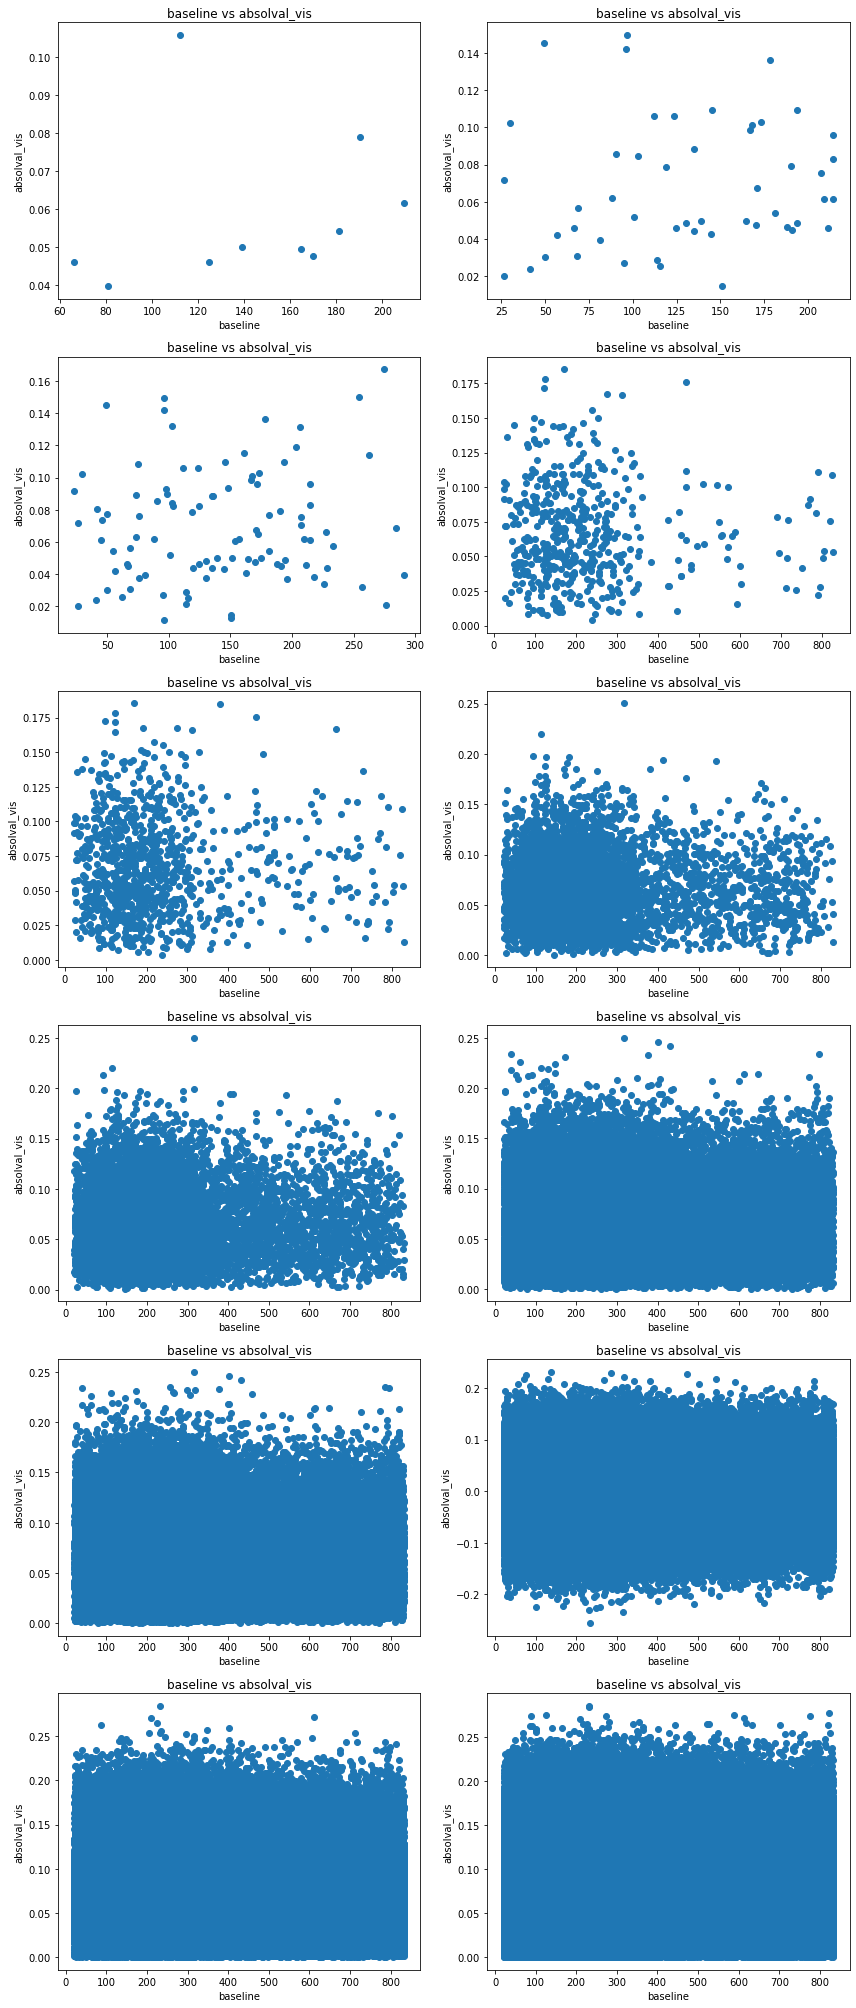

In [48]:
fig, axes = plt.subplots(6,2, figsize=(12,28))

# This is the plot of baseline vs visibility real and baseline vs visibility imaginary

axes[0,0].scatter(baseline[:10],absolval_vis[:10])
axes[0,0].set_xlabel('baseline')
axes[0,0].set_ylabel('absolval_vis')
axes[0,0].set_title('baseline vs absolval_vis')

axes[0,1].scatter(baseline[:50],absolval_vis[:50])
axes[0,1].set_xlabel('baseline')
axes[0,1].set_ylabel('absolval_vis')
axes[0,1].set_title('baseline vs absolval_vis')

axes[1,0].scatter(baseline[:100],absolval_vis[:100])
axes[1,0].set_xlabel('baseline')
axes[1,0].set_ylabel('absolval_vis')
axes[1,0].set_title('baseline vs absolval_vis')

axes[1,1].scatter(baseline[:500],absolval_vis[:500])
axes[1,1].set_xlabel('baseline')
axes[1,1].set_ylabel('absolval_vis')
axes[1,1].set_title('baseline vs absolval_vis')

axes[2,0].scatter(baseline[:1000],absolval_vis[:1000])
axes[2,0].set_xlabel('baseline')
axes[2,0].set_ylabel('absolval_vis')
axes[2,0].set_title('baseline vs absolval_vis')

axes[2,1].scatter(baseline[:5000],absolval_vis[:5000])
axes[2,1].set_xlabel('baseline')
axes[2,1].set_ylabel('absolval_vis')
axes[2,1].set_title('baseline vs absolval_vis')

axes[3,0].scatter(baseline[:10000],absolval_vis[:10000])
axes[3,0].set_xlabel('baseline')
axes[3,0].set_ylabel('absolval_vis')
axes[3,0].set_title('baseline vs absolval_vis')

axes[3,1].scatter(baseline[:50000],absolval_vis[:50000])
axes[3,1].set_xlabel('baseline')
axes[3,1].set_ylabel('absolval_vis')
axes[3,1].set_title('baseline vs absolval_vis')

axes[4,0].scatter(baseline[:100000],absolval_vis[:100000])
axes[4,0].set_xlabel('baseline')
axes[4,0].set_ylabel('absolval_vis')
axes[4,0].set_title('baseline vs absolval_vis')

axes[4,1].scatter(baseline[:500000],vis_im[:500000])
axes[4,1].set_xlabel('baseline')
axes[4,1].set_ylabel('absolval_vis')
axes[4,1].set_title('baseline vs absolval_vis')

axes[5,0].scatter(baseline[:1000000],absolval_vis[:1000000])
axes[5,0].set_xlabel('baseline')
axes[5,0].set_ylabel('absolval_vis')
axes[5,0].set_title('baseline vs absolval_vis')

axes[5,1].scatter(baseline[:5000000],absolval_vis[:5000000])
axes[5,1].set_xlabel('baseline')
axes[5,1].set_ylabel('absolval_vis')
axes[5,1].set_title('baseline vs absolval_vis')
plt.tight_layout()
plt.show()  # Display the plot



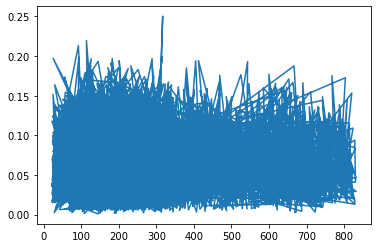

In [50]:
plt.plot(baseline[:10000],absolval_vis[:10000])
plt.show()

In [ ]:
from mpl_toolkits import mplot3d

# Sample data
x = UU[:100]
y = VV[:100]
z = WW[:100]

# Create 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot the points
ax.scatter3D(x, y, z, c=z, cmap='cool')

# Add labels and title
ax.set_xlabel('U-axis')
ax.set_ylabel('V-axis')
ax.set_zlabel('W-axis')
plt.title('3D Scatter Plot')

# Display the plot
plt.show()
#def f_N(N):
      
 #    Q = (((N - pix)*delta) + mfreq)
    
 #    return(Q)   
    
#print(f_N(767))
#Freq_N = np.zeros(768)   

#for i in range(len(Freq_N)):

#        Freq_N[i] = f_N(i)

/lfs/sware/anaconda3_2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


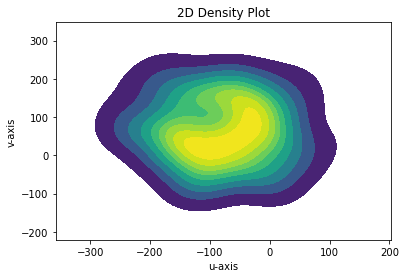

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

In [51]:
import seaborn as sns
sns.kdeplot(x, y, cmap='viridis', shade=True)

# Add labels and title
plt.xlabel('u-axis')
plt.ylabel('v-axis')
plt.title('2D Density Plot')


# Display the plot
plt.show()
plt.colorbar()


#plt.figure(figsize=(15,12))
#plt.plot(freqs,vis_allfreq_XX_re)
#plt.plot(freqs,vis_allfreq_XX_im)
#plt.legend(["Re", "Im"], loc ="lower right",prop = {'size' : 20})
#plt.xlabel('Freq (Hz)',fontsize = 20)
#plt.ylabel('Vis',fontsize = 20)'''

/lfs/sware/anaconda3_2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


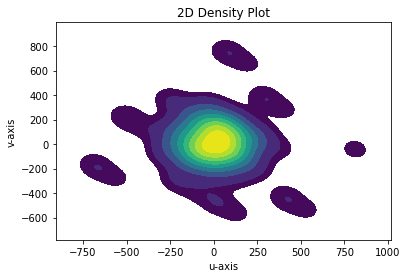

/lfs/sware/anaconda3_2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


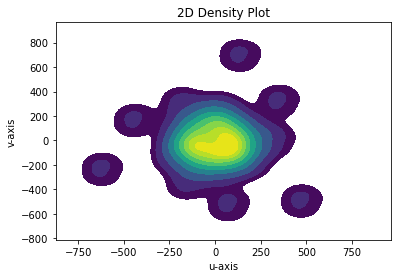

/lfs/sware/anaconda3_2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


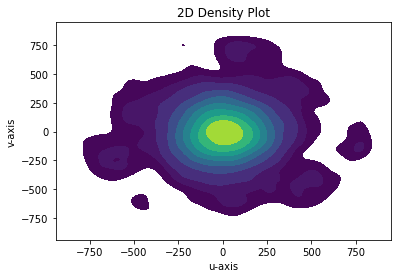

In [52]:
x1=UU[:1000]
y1=VV[:1000]


sns.kdeplot(x1, y1, cmap='viridis', shade=True)

# Add labels and title
plt.xlabel('u-axis')
plt.ylabel('v-axis')
plt.title('2D Density Plot')

# Display the plot
plt.show()

x2=UU[:10000]
y2=VV[:10000]


sns.kdeplot(x2, y2, cmap='viridis', shade=True)

# Add labels and title
plt.xlabel('u-axis')
plt.ylabel('v-axis')
plt.title('2D Density Plot')

# Display the plot
plt.show()

x3=UU[:100000]
y3=VV[:100000]


sns.kdeplot(x3, y3, cmap='viridis', shade=True)

# Add labels and title
plt.xlabel('u-axis')
plt.ylabel('v-axis')
plt.title('2D Density Plot')

# Display the plot
plt.show()

In [ ]:

x5 = UU[:100]
y5 = VV[:100]
z5 = absolval_vis[:100]

# Create 3D plot
fig = plt.figure()
ax1 = plt.axes(projection='3d')

# Plot the points
ax1.scatter3D(x5, y5, z5, c=z5, cmap='cool')

# Add labels and title
ax1.set_xlabel('UU-axis')
ax1.set_ylabel('VV-axis')
ax1.set_zlabel('WW-axis')
plt.title('3D Scatter Plot')




In [ ]:
import matplotlib.pyplot as plt
import numpy as np


U_coords = UU[:100]
V_coords = VV[:100]
weights = absolval_vis[:100]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#  pillars
for  i in  range(len(U_coords)):
    ax.bar3d(U_coords[i], V_coords[i], 0,20,20,weights[i])

# Set axis labels
ax.set_xlabel('U')
ax.set_ylabel('V')
ax.set_zlabel('absolute value of visibility')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


U_coords = UU
V_coords = VV
weights = absolval_vis


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#  pillars
for  i in  range(len(U_coords)):
    ax.bar3d(U_coords[i], V_coords[i], 0,10,10,weights[i])

# Set axis labels
ax.set_xlabel('U')
ax.set_ylabel('V')
ax.set_zlabel('absolute value of visibility')

plt.show()


In [ ]:
plt.hist(absolval_vis)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')


plt.show()

In [ ]:

plt.hist(vis_re)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()


In [ ]:
#time = hdulist[0].header['DATE-OBS']
plt.hist(vis_im)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')


plt.show()

In [ ]:
#check it 
#print(time)
import datashader as ds
from datashader.mpl_ext import dsshow
import pandas as pd


import seaborn as sns
sns.kdeplot(x, y, cmap='viridis', shade=True)

# Add labels and title
plt.xlabel('u-axis')
plt.ylabel('v-axis')
plt.title('2D Density Plot')


# Display the plot
plt.show()



def using_datashader(ax, x, y):

    df = pd.DataFrame(dict(x=x, y=y))
    dsartist = dsshow(
        df,
        ds.Point("x", "y"),
        ds.count(),
        vmin=0,
        vmax=35,
        norm="linear",
        aspect="auto",
        ax=ax,
    )

    plt.colorbar(dsartist)


fig, ax = plt.subplots()
using_datashader(ax, x, y)
plt.show()


TypeError: Input z must be 2D, not 1D

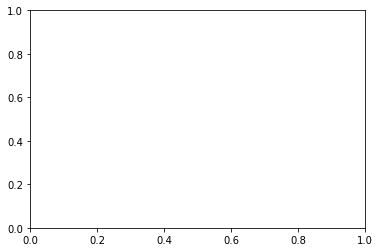

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
x = UU[:100]
y = VV[:100]
X, Y = np.meshgrid(x, y)
Z =absolval_vis[:100]

# Create a contour plot
plt.contourf(X, Y, Z, cmap='RdYlBu')

# Add a colorbar
plt.colorbar()

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a density plot
plt.hist2d(x1, y1, bins=50, cmap='viridis')

# Add a colorbar
plt.colorbar()

# Add labels and title
plt.xlabel('U')
plt.ylabel('V')
plt.title('Density Plot')

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
u=UU[:10000]
v=VV[:10000]
# Create a density plot
plt.hist2d(u,v, bins=50, cmap='viridis')

# Add a colorbar
plt.colorbar()

# Add labels and title
plt.xlabel('U')
plt.ylabel('V')
plt.title('Density Plot')

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
u=UU[:100000]
v=VV[:100000]
# Create a density plot
plt.hist2d(u,v, bins=50, cmap='viridis')

# Add a colorbar
plt.colorbar()

# Add labels and title
plt.xlabel('U')
plt.ylabel('V')
plt.title('Density Plot')

# Display the plot
plt.show()

In [ ]:
plt.scatter(UU[0:10000],vis_re[0:10000])  # Plot the two arrays
plt.xlabel('U')
plt.ylabel('vis_re')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Example x and y coordinates
x_coords = np.linspace(0, 2 * np.pi, 100)
y_coords = np.sin(x_coords)

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data(x_coords[:frame], y_coords[:frame])  # Update only up to the current frame
    return line,

animation = FuncAnimation(fig, update, frames=len(x_coords), init_func=init, blit=True)

plt.close()  # Close the initial figure to prevent it from being displayed
HTML(animation.to_html5_video())


In [ ]:
!conda install -c conda-forge ffmpeg

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::distributed==2021.4.1=py38h06a4308_0
  - defaults/linux-64::mkl_fft==1.3.0=py38h42c9631_2
  - conda-forge/noarch::tensorflow-estimator==2.5.0=pyh81a9013_1
  - defaults/linux-64::numba==0.53.1=py38ha9443f7_0
  - conda-forge/noarch::keras-preprocessing==1.1.2=pyhd8ed1ab_0
  - defaults/linux-64::patsy==0.5.1=py38_0
  - defaults/linux-64::bokeh==2.3.2=py38h06a4308_0
  - defaults/linux-64::numexpr==2.7.3=py38h22e1b3c_1
  - defaults/linux-64::scikit-learn==0.24.1=py38ha9443f7_0
  - defaults/linux-64::anaconda==2021.05=py38_0
  - defaults/noarch::imageio==2.9.0=pyhd3eb1b0_0
  - conda-forge/noarch::opt_einsum==3.3.0=pyhd8ed1ab_1
  - defaults/noarch::seaborn==0.11.1=pyhd3eb1b0_0
  - defaults/linux-64::pandas==1.2.4=py38h2531618_0
  - defaults/linux-64::tensorflow-gpu==2.4.1=h30adc30_0
  - defaults/linux-64::scikit-image==0